In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/ml100.vtree', '/root/PySDD/notebooks/ml100.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=100
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [46], 1: [59], 2: [53, 63, 86], 3: [17, 22, 23, 24, 26, 34, 51, 61, 66, 74, 81, 85, 87, 89, 90, 96], 4: [24, 26, 37, 71, 83, 87, 94, 99], 5: [96], 6: [38], 7: [85], 8: [19, 64], 9: [], 10: [], 11: [], 12: [17, 79, 81], 13: [17, 23, 24, 25, 26, 30, 36, 42, 54, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 14: [], 15: [], 16: [17, 24, 25, 27, 35, 39, 42, 46, 48, 56, 61, 66, 72, 76, 81, 84, 89], 17: [3, 12, 13, 16, 24, 25, 27, 29, 35, 39, 42, 46, 51, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 85, 89, 92, 96], 18: [], 19: [8, 37, 64, 70, 91], 20: [], 21: [], 22: [3, 30, 61, 66, 78, 81, 85, 90, 96], 23: [3, 13, 61, 66, 89], 24: [3, 4, 13, 16, 17, 25, 26, 27, 31, 34, 38, 42, 51, 54, 56, 61, 66, 68, 72, 74, 76, 77, 81, 84, 87, 89, 99], 25: [13, 16, 17, 24, 27, 35, 36, 39, 40, 42, 48, 51, 52, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 26: [3, 4, 13, 24, 34, 42, 54, 66, 74, 77, 81, 83, 92, 97], 27: [16, 17, 24, 25, 35, 39, 46, 51, 52, 61, 68, 76, 87, 99], 28: [], 29: [17, 35, 56, 66, 72, 79, 81, 89], 30: [13, 22, 54, 61, 66, 73, 75, 78, 81, 95], 31: [24, 46, 51, 52, 61, 76, 79], 32: [], 33: [], 34: [3, 24, 26, 54, 66, 71, 74, 77, 81, 84, 94], 35: [16, 17, 25, 27, 29, 36, 39, 40, 46, 48, 52, 56, 61, 66, 72, 76, 77, 81, 89], 36: [13, 25, 35, 42, 56, 57, 66, 77, 81, 84, 89, 92], 37: [4, 19, 51, 64, 87, 99], 38: [6, 24, 51, 63, 67, 99], 39: [16, 17, 25, 27, 35, 48, 56, 61, 76, 77, 81, 85, 89], 40: [25, 35], 41: [], 42: [13, 16, 17, 24, 25, 26, 36, 54, 56, 61, 66, 68, 72, 76, 77, 81, 84, 89, 92], 43: [], 44: [51, 74], 45: [], 46: [0, 16, 17, 27, 31, 35, 51, 52, 61, 76, 96], 47: [], 48: [16, 25, 35, 39, 56, 61, 66, 77, 89], 49: [], 50: [], 51: [3, 17, 24, 25, 27, 31, 37, 38, 44, 46, 61, 68, 76, 87, 94, 99], 52: [17, 25, 27, 31, 35, 46, 61, 72, 76, 79, 81, 89], 53: [2, 70, 86, 93], 54: [13, 17, 24, 25, 26, 30, 34, 42, 56, 61, 66, 68, 72, 77, 81, 84, 89, 92, 95], 55: [], 56: [13, 16, 17, 24, 25, 29, 35, 36, 39, 42, 48, 54, 61, 66, 77, 81, 84, 89, 92], 57: [36], 58: [], 59: [1], 60: [], 61: [3, 13, 16, 17, 22, 23, 24, 25, 27, 30, 31, 35, 39, 42, 46, 48, 51, 52, 54, 56, 66, 72, 76, 77, 79, 81, 84, 85, 87, 89, 90, 96], 62: [], 63: [2, 38], 64: [8, 19, 37, 74, 87, 91], 65: [], 66: [3, 13, 16, 17, 22, 23, 24, 25, 26, 29, 30, 34, 35, 36, 42, 48, 54, 56, 61, 72, 73, 74, 76, 77, 81, 84, 85, 89, 92], 67: [38], 68: [13, 24, 25, 27, 42, 51, 54, 87, 99], 69: [], 70: [19, 53], 71: [4, 34, 74], 72: [13, 16, 17, 24, 25, 29, 35, 42, 52, 54, 61, 66, 76, 79, 81, 89], 73: [30, 66, 78, 84], 74: [3, 24, 26, 34, 44, 64, 66, 71, 77, 83], 75: [30], 76: [16, 17, 24, 25, 27, 31, 35, 39, 42, 46, 51, 52, 61, 66, 72, 79, 81, 89, 96], 77: [13, 17, 24, 25, 26, 34, 35, 36, 39, 42, 48, 54, 56, 61, 66, 74, 81, 84, 89, 92], 78: [22, 30, 73, 85, 90], 79: [12, 17, 29, 31, 52, 61, 72, 76, 81, 89], 80: [], 81: [3, 12, 13, 16, 17, 22, 24, 25, 26, 29, 30, 34, 35, 36, 39, 42, 52, 54, 56, 61, 66, 72, 76, 77, 79, 84, 85, 89, 92, 95], 82: [], 83: [4, 26, 74], 84: [13, 16, 24, 25, 34, 36, 42, 54, 56, 61, 66, 73, 77, 81, 89], 85: [3, 7, 17, 22, 39, 61, 66, 78, 81, 89, 90], 86: [2, 53, 88, 91], 87: [3, 4, 24, 27, 37, 51, 61, 64, 68, 91, 94, 99], 88: [86], 89: [3, 13, 16, 17, 23, 24, 25, 29, 35, 36, 39, 42, 48, 52, 54, 56, 61, 66, 72, 76, 77, 79, 81, 84, 85, 92], 90: [3, 22, 61, 78, 85], 91: [19, 64, 86, 87, 94], 92: [13, 17, 25, 26, 36, 42, 54, 56, 66, 77, 81, 89, 95], 93: [53], 94: [4, 34, 51, 87, 91, 99], 95: [13, 30, 54, 81, 92], 96: [3, 5, 17, 22, 46, 61, 76], 97: [26], 98: [], 99: [4, 24, 27, 37, 38, 51, 68, 87, 94]}
def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [2]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=1,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [12]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,100):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,100):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                -50000000*checkFea(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,100):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,100):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [13]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [14]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,100):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
T = int(12e2)
n_arms =5
n_features = 100
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [17]:
### mean reward function

a = np.load('rateListml100.npy')
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([100,100]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*(x.dot(a))
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*(x.dot(a))  #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [18]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))

35.74394583452063

In [19]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


9.831712394952774

In [20]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

44-------------
55-------------
66-------------
---------------- tensor(32.2884) 32.28844967332585 tensor(0.0027, dtype=torch.float64) 32.90701008891977 tensor(0., dtype=torch.float64)
hhhhh 31.643444139458687 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  0%|          | 1/1200 [00:01<33:12,  1.66s/it, total regret=0.645, % optimal arm=100.00%]

---------------- tensor(32.2884) 31.922453307731175 tensor(0.0082, dtype=torch.float64) 30.52414005398999 tensor(0., dtype=torch.float64)
hhhhh 31.866114947434852 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  0%|          | 2/1200 [00:02<30:48,  1.54s/it, total regret=3.12e+3, % optimal arm=100.00%]

---------------- tensor(32.2884) 29.521501062112733 tensor(0., dtype=torch.float64) 29.114612092878232 tensor(0., dtype=torch.float64)
hhhhh 30.861151446578027 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 3/1200 [00:04<29:03,  1.46s/it, total regret=3.12e+3, % optimal arm=66.67%] 

---------------- tensor(32.2884) 29.488221896863898 tensor(0.0041, dtype=torch.float64) 29.465456269441436 tensor(0., dtype=torch.float64)
hhhhh 31.673222640363473 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  0%|          | 4/1200 [00:05<28:17,  1.42s/it, total regret=1.11e+4, % optimal arm=50.00%]

---------------- 32.39979553222656 32.33415433569246 tensor(0.0110, dtype=torch.float64) 31.675830350214053 tensor(0., dtype=torch.float64)
hhhhh 32.23829790909534 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 6/1200 [00:08<26:18,  1.32s/it, total regret=1.78e+4, % optimal arm=33.33%]

---------------- 32.39979553222656 31.4791968229839 tensor(0.0096, dtype=torch.float64) 31.870581133550452 tensor(0., dtype=torch.float64)
hhhhh 30.50024562842024 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  1%|          | 7/1200 [00:09<24:15,  1.22s/it, total regret=2.31e+4, % optimal arm=28.57%]

---------------- 32.39979553222656 31.378533049820888 tensor(0.0082, dtype=torch.float64) 31.573967332098075 tensor(0., dtype=torch.float64)
hhhhh 30.471483069408812 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 32.39979553222656 31.412356705263498 tensor(0.0041, dtype=torch.float64) 30.17887295547819 tensor(0., dtype=torch.float64)
hhhhh 31.350858528764824 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  1%|          | 8/1200 [00:10<24:28,  1.23s/it, total regret=3.03e+4, % optimal arm=25.00%]

---------------- 32.493388384169364 32.493388384169364 tensor(0.0164, dtype=torch.float64) 31.577406738350216 tensor(0., dtype=torch.float64)
hhhhh 31.193313789976084 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  1%|          | 9/1200 [00:11<24:34,  1.24s/it, total regret=4.47e+4, % optimal arm=33.33%]

---------------- 32.493388384169364 31.392967105528868 tensor(0.0096, dtype=torch.float64) 30.37451268797129 tensor(0., dtype=torch.float64)
hhhhh 30.915669263504697 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  1%|          | 10/1200 [00:12<24:37,  1.24s/it, total regret=5.15e+4, % optimal arm=30.00%]

---------------- 32.781703363425606 32.781703363425606 tensor(0.0082, dtype=torch.float64) 31.905938126154922 tensor(0., dtype=torch.float64)
hhhhh 31.433036730264813 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  1%|          | 11/1200 [00:14<26:33,  1.34s/it, total regret=6.77e+4, % optimal arm=27.27%]

---------------- 32.781703363425606 32.747252754973225 tensor(0.0123, dtype=torch.float64) 31.547930993784245 tensor(0., dtype=torch.float64)
hhhhh 31.821513873154615 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 12/1200 [00:15<24:56,  1.26s/it, total regret=7.61e+4, % optimal arm=25.00%]

---------------- 32.781703363425606 30.98960660238781 tensor(0.0014, dtype=torch.float64) 29.50079252853788 tensor(0., dtype=torch.float64)
hhhhh 31.96271613106465 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  1%|          | 13/1200 [00:16<24:59,  1.26s/it, total regret=8.54e+4, % optimal arm=23.08%]

---------------- 32.781703363425606 31.734010694212202 tensor(0.0041, dtype=torch.float64) 31.604117622499082 tensor(0., dtype=torch.float64)
hhhhh 32.244755925629875 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  1%|▏         | 15/1200 [00:18<22:48,  1.15s/it, total regret=1.06e+5, % optimal arm=20.00%]

---------------- 32.781703363425606 32.112165613008806 tensor(0.0068, dtype=torch.float64) 31.12772286611436 tensor(0., dtype=torch.float64)
hhhhh 32.17818063135292 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  1%|▏         | 16/1200 [00:19<21:02,  1.07s/it, total regret=1.12e+5, % optimal arm=25.00%]

---------------- 32.781703363425606 31.74607783149237 tensor(0.0041, dtype=torch.float64) 30.032197522664937 tensor(0., dtype=torch.float64)
hhhhh 31.68867051749239 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 32.781703363425606 32.66785402158917 tensor(0.0096, dtype=torch.float64) 30.330452098548054 tensor(0., dtype=torch.float64)
hhhhh 31.025825449223703 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 18/1200 [00:21<18:58,  1.04it/s, total regret=1.19e+5, % optimal arm=22.22%]

---------------- 32.781703363425606 30.549657347778997 tensor(0.0014, dtype=torch.float64) 30.667665407231315 tensor(0., dtype=torch.float64)
hhhhh 30.768526619936676 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 19/1200 [00:22<18:41,  1.05it/s, total regret=1.36e+5, % optimal arm=21.05%]

---------------- 33.094715013647445 33.094715013647445 tensor(0.0068, dtype=torch.float64) 31.545453103966885 tensor(0., dtype=torch.float64)
hhhhh 32.46073358024183 10.000000000000002 tensor(0.0137, dtype=torch.float64)


  2%|▏         | 20/1200 [00:23<18:02,  1.09it/s, total regret=1.47e+5, % optimal arm=20.00%]

---------------- 33.094715013647445 31.85212383485293 tensor(0.0055, dtype=torch.float64) 29.970866627878763 tensor(0., dtype=torch.float64)
hhhhh 31.529447071377543 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 33.094715013647445 31.0219687811225 tensor(0.0068, dtype=torch.float64) 30.857591880222547 tensor(0., dtype=torch.float64)


  2%|▏         | 21/1200 [00:24<18:44,  1.05it/s, total regret=1.52e+5, % optimal arm=19.05%]

hhhhh 32.4779850369611 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  2%|▏         | 22/1200 [00:25<18:40,  1.05it/s, total regret=1.6e+5, % optimal arm=18.18%] 

---------------- 33.094715013647445 32.617559714490966 tensor(0.0137, dtype=torch.float64) 33.15785372896881 tensor(0., dtype=torch.float64)
hhhhh 31.939095010828005 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  2%|▏         | 23/1200 [00:26<18:00,  1.09it/s, total regret=1.67e+5, % optimal arm=17.39%]

---------------- 33.094715013647445 31.160931584557506 tensor(0.0041, dtype=torch.float64) 31.288077466456937 tensor(0., dtype=torch.float64)
hhhhh 31.2476897708592 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 24/1200 [00:26<17:30,  1.12it/s, total regret=1.7e+5, % optimal arm=16.67%] 

---------------- 33.094715013647445 31.80037111395141 tensor(0.0164, dtype=torch.float64) 31.10860115272776 tensor(0., dtype=torch.float64)
hhhhh 31.316477895902022 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 33.094715013647445 32.97186002547756 tensor(0.0164, dtype=torch.float64) 30.9119737513068 tensor(0., dtype=torch.float64)
hhhhh 31.74015393839759 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  2%|▏         | 26/1200 [00:28<17:11,  1.14it/s, total regret=1.78e+5, % optimal arm=15.38%]

---------------- 33.094715013647445 30.863969554413472 tensor(0.0082, dtype=torch.float64) 30.203786621453936 tensor(0., dtype=torch.float64)
hhhhh 29.73979662867896 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 33.094715013647445 31.922308173174972 tensor(0.0068, dtype=torch.float64) 31.46706607153137 tensor(0., dtype=torch.float64)
hhhhh 32.56816637255979 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 28/1200 [00:30<17:03,  1.15it/s, total regret=1.85e+5, % optimal arm=17.86%]

---------------- 33.094715013647445 32.03932243789024 tensor(0.0082, dtype=torch.float64) 31.174635255323587 tensor(0., dtype=torch.float64)
hhhhh 31.298230288365232 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▏         | 29/1200 [00:31<16:56,  1.15it/s, total regret=1.92e+5, % optimal arm=17.24%]

---------------- 33.094715013647445 32.66541477149132 tensor(0.0110, dtype=torch.float64) 32.31767967870009 tensor(0., dtype=torch.float64)
hhhhh 30.69975805036165 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  2%|▎         | 30/1200 [00:32<16:42,  1.17it/s, total regret=1.95e+5, % optimal arm=16.67%]

---------------- 33.094715013647445 30.725550769956158 tensor(0.0082, dtype=torch.float64) 30.201165246336707 tensor(0., dtype=torch.float64)
hhhhh 30.01493734844797 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 33.094715013647445 30.61233050160192 tensor(0.0041, dtype=torch.float64) 29.630672170592376 tensor(0., dtype=torch.float64)
hhhhh 31.6359331905676 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  3%|▎         | 32/1200 [00:33<17:33,  1.11it/s, total regret=2.13e+5, % optimal arm=21.88%]

---------------- 33.094715013647445 32.18125932168698 tensor(0.0068, dtype=torch.float64) 31.694523963781474 tensor(0., dtype=torch.float64)
hhhhh 30.63616861684873 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  3%|▎         | 33/1200 [00:34<17:07,  1.14it/s, total regret=2.13e+5, % optimal arm=21.21%]

---------------- 33.094715013647445 32.34756608808984 tensor(0.0041, dtype=torch.float64) 30.228971472290368 tensor(0., dtype=torch.float64)
hhhhh 31.656685076022878 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 34/1200 [00:35<16:47,  1.16it/s, total regret=2.21e+5, % optimal arm=20.59%]

---------------- 33.094715013647445 32.12005471281334 tensor(0.0082, dtype=torch.float64) 29.99472170690486 tensor(0., dtype=torch.float64)
hhhhh 30.841655352006704 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 35/1200 [00:36<16:37,  1.17it/s, total regret=2.21e+5, % optimal arm=22.86%]

---------------- 33.094715013647445 32.418568928762895 tensor(0.0096, dtype=torch.float64) 30.88391943008095 tensor(0., dtype=torch.float64)
hhhhh 31.548027121866916 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 36/1200 [00:37<16:29,  1.18it/s, total regret=2.31e+5, % optimal arm=22.22%]

---------------- 33.094715013647445 31.81895752585802 tensor(0.0082, dtype=torch.float64) 32.73399202733318 tensor(0., dtype=torch.float64)
hhhhh 31.68866486289929 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 37/1200 [00:38<16:23,  1.18it/s, total regret=2.38e+5, % optimal arm=24.32%]

---------------- 33.094715013647445 32.875039961973236 tensor(0.0068, dtype=torch.float64) 31.38448450905703 tensor(0., dtype=torch.float64)
hhhhh 30.304689065567313 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  3%|▎         | 38/1200 [00:39<16:41,  1.16it/s, total regret=2.41e+5, % optimal arm=26.32%]

---------------- 33.094715013647445 30.778243566960295 tensor(0.0041, dtype=torch.float64) 30.365224076374876 tensor(0., dtype=torch.float64)
hhhhh 32.73210362884634 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  3%|▎         | 39/1200 [00:39<16:35,  1.17it/s, total regret=2.5e+5, % optimal arm=25.64%] 

---------------- 33.094715013647445 31.9762909242297 tensor(0.0055, dtype=torch.float64) 31.985801478605225 tensor(0., dtype=torch.float64)
hhhhh 32.37584918472813 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  3%|▎         | 40/1200 [00:40<16:45,  1.15it/s, total regret=2.63e+5, % optimal arm=25.00%]

---------------- 33.094715013647445 31.329331492838964 tensor(0.0068, dtype=torch.float64) 31.337254048986008 tensor(0., dtype=torch.float64)
hhhhh 32.77463512205253 10.000000000000002 tensor(0.0082, dtype=torch.float64)
---------------- 33.094715013647445 32.74049103966768 tensor(0.0068, dtype=torch.float64) 31.69829039400115 tensor(0., dtype=torch.float64)


  3%|▎         | 41/1200 [00:41<17:47,  1.09it/s, total regret=2.7e+5, % optimal arm=24.39%] 

hhhhh 30.27439411182619 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▎         | 42/1200 [00:42<17:20,  1.11it/s, total regret=2.77e+5, % optimal arm=23.81%]

---------------- 33.094715013647445 29.695383098403163 tensor(0.0014, dtype=torch.float64) 29.871808759155716 tensor(0., dtype=torch.float64)
hhhhh 32.06613510471488 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  4%|▎         | 43/1200 [00:43<17:01,  1.13it/s, total regret=2.77e+5, % optimal arm=23.26%]

---------------- 33.45951967374662 33.45951967374662 tensor(0.0137, dtype=torch.float64) 30.927134186619874 tensor(0., dtype=torch.float64)
hhhhh 30.933069860116944 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 44/1200 [00:44<16:46,  1.15it/s, total regret=2.93e+5, % optimal arm=22.73%]

---------------- 33.45951967374662 32.632174245962 tensor(0.0055, dtype=torch.float64) 32.6214314615071 tensor(0., dtype=torch.float64)
hhhhh 31.270940279639852 10.000000000000002 tensor(0.0110, dtype=torch.float64)


  4%|▍         | 45/1200 [00:45<16:33,  1.16it/s, total regret=2.96e+5, % optimal arm=24.44%]

---------------- 33.45951967374662 32.950511816058444 tensor(0.0082, dtype=torch.float64) 31.340708298545035 tensor(0., dtype=torch.float64)
hhhhh 30.77449009518314 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 46/1200 [00:46<16:46,  1.15it/s, total regret=2.98e+5, % optimal arm=23.91%]

---------------- 33.45951967374662 31.012326757457437 tensor(0.0027, dtype=torch.float64) 29.975586328251612 tensor(0., dtype=torch.float64)
hhhhh 31.38990325850168 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 47/1200 [00:46<16:34,  1.16it/s, total regret=3.01e+5, % optimal arm=25.53%]

---------------- 33.45951967374662 31.968310172895354 tensor(0.0041, dtype=torch.float64) 31.10743512850925 tensor(0., dtype=torch.float64)
hhhhh 29.440750645370105 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  4%|▍         | 48/1200 [00:47<16:27,  1.17it/s, total regret=3.05e+5, % optimal arm=25.00%]

---------------- 33.45951967374662 32.58588504003382 tensor(0.0068, dtype=torch.float64) 30.081105983237922 tensor(0., dtype=torch.float64)
hhhhh 30.151066729524544 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  4%|▍         | 49/1200 [00:48<16:20,  1.17it/s, total regret=3.15e+5, % optimal arm=24.49%]

---------------- 33.50477149744926 33.50477149744926 tensor(0.0055, dtype=torch.float64) 33.24600859976582 tensor(0., dtype=torch.float64)
hhhhh 31.184305787562188 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  4%|▍         | 50/1200 [00:49<16:16,  1.18it/s, total regret=3.19e+5, % optimal arm=24.00%]

---------------- 33.89872746983539 33.89872746983539 tensor(0.0055, dtype=torch.float64) 31.587849122546764 tensor(0., dtype=torch.float64)
hhhhh 31.184883734098463 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 33.89872746983539 33.159465288001876 tensor(0.0055, dtype=torch.float64) 31.606717557284153 tensor(0., dtype=torch.float64)


  4%|▍         | 51/1200 [00:50<17:26,  1.10it/s, total regret=3.19e+5, % optimal arm=23.53%]

hhhhh 30.184756088381054 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 52/1200 [00:51<17:04,  1.12it/s, total regret=3.22e+5, % optimal arm=23.08%]

---------------- 33.89872746983539 33.21625177480125 tensor(0.0027, dtype=torch.float64) 33.44225949952965 tensor(0., dtype=torch.float64)
hhhhh 31.526764202560365 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 33.89872746983539 33.83741872220553 tensor(0.0123, dtype=torch.float64) 32.302332170598675 tensor(0., dtype=torch.float64)
hhhhh 30.80491486895747 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  4%|▍         | 54/1200 [00:53<16:52,  1.13it/s, total regret=3.42e+5, % optimal arm=24.07%]

---------------- 33.89872746983539 32.83915120200946 tensor(0.0055, dtype=torch.float64) 32.25236158895536 tensor(0., dtype=torch.float64)
hhhhh 32.514401558947405 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▍         | 55/1200 [00:53<16:42,  1.14it/s, total regret=3.49e+5, % optimal arm=23.64%]

---------------- 33.89872746983539 33.28592578609616 tensor(0.0082, dtype=torch.float64) 33.33481846093008 tensor(0., dtype=torch.float64)
hhhhh 33.236182330608976 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▍         | 56/1200 [00:54<17:00,  1.12it/s, total regret=3.53e+5, % optimal arm=23.21%]

---------------- 34.719178063768624 34.719178063768624 tensor(0.0082, dtype=torch.float64) 32.698103031761356 tensor(0., dtype=torch.float64)
hhhhh 30.426942310788302 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▍         | 57/1200 [00:55<16:45,  1.14it/s, total regret=3.56e+5, % optimal arm=24.56%]

---------------- 34.719178063768624 33.17625118322271 tensor(0.0164, dtype=torch.float64) 30.80894942113323 tensor(0., dtype=torch.float64)
hhhhh 31.831050108807133 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  5%|▍         | 58/1200 [00:56<16:37,  1.14it/s, total regret=3.63e+5, % optimal arm=24.14%]

---------------- 34.719178063768624 34.602556322057616 tensor(0.0137, dtype=torch.float64) 33.73452374084908 tensor(0., dtype=torch.float64)
hhhhh 31.805190712135666 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▍         | 59/1200 [00:57<16:26,  1.16it/s, total regret=3.63e+5, % optimal arm=23.73%]

---------------- 34.719178063768624 30.45733739794887 tensor(0.0082, dtype=torch.float64) 31.390818360151446 tensor(0., dtype=torch.float64)
hhhhh 30.5624016225827 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 34.719178063768624 34.27199846945125 tensor(0.0068, dtype=torch.float64) 32.98448249092161 tensor(0., dtype=torch.float64)
hhhhh 31.23197282934202 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  5%|▌         | 60/1200 [00:58<16:39,  1.14it/s, total regret=3.71e+5, % optimal arm=23.33%]

---------------- 34.719178063768624 33.835960779618304 tensor(0.0055, dtype=torch.float64) 33.28036732108038 tensor(0., dtype=torch.float64)


  5%|▌         | 61/1200 [00:59<18:05,  1.05it/s, total regret=3.78e+5, % optimal arm=24.59%]

hhhhh 31.282285278259742 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 62/1200 [01:00<17:24,  1.09it/s, total regret=3.85e+5, % optimal arm=25.81%]

---------------- 34.719178063768624 34.03405813963681 tensor(0.0110, dtype=torch.float64) 33.96302042897298 tensor(0., dtype=torch.float64)
hhhhh 31.783947112688875 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 63/1200 [01:01<16:56,  1.12it/s, total regret=3.92e+5, % optimal arm=25.40%]

---------------- 34.719178063768624 33.52500127547511 tensor(0.0137, dtype=torch.float64) 30.957474377105775 tensor(0., dtype=torch.float64)
hhhhh 31.117616223383028 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  5%|▌         | 64/1200 [01:02<16:37,  1.14it/s, total regret=3.97e+5, % optimal arm=25.00%]

---------------- 34.719178063768624 32.78853576114488 tensor(0.0041, dtype=torch.float64) 32.796356063400054 tensor(0., dtype=torch.float64)
hhhhh 30.799791807610266 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  5%|▌         | 65/1200 [01:02<16:22,  1.15it/s, total regret=4e+5, % optimal arm=26.15%]   

---------------- 34.719178063768624 33.61383069210717 tensor(0.0096, dtype=torch.float64) 32.489003247221504 tensor(0., dtype=torch.float64)
hhhhh 28.854305491278915 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 66/1200 [01:03<16:12,  1.17it/s, total regret=4.02e+5, % optimal arm=25.76%]

---------------- 34.719178063768624 33.27527371073889 tensor(0.0110, dtype=torch.float64) 32.90300074680491 tensor(0., dtype=torch.float64)
hhhhh 32.256485672188504 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  6%|▌         | 67/1200 [01:04<16:28,  1.15it/s, total regret=4.14e+5, % optimal arm=25.37%]

---------------- 34.719178063768624 34.04547075776584 tensor(0.0205, dtype=torch.float64) 34.04097323578014 tensor(0., dtype=torch.float64)
hhhhh 31.0574829242935 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  6%|▌         | 68/1200 [01:05<16:16,  1.16it/s, total regret=4.25e+5, % optimal arm=25.00%]

---------------- 34.719178063768624 34.20786195405605 tensor(0.0082, dtype=torch.float64) 33.863445164981435 tensor(0., dtype=torch.float64)
hhhhh 31.711986525309765 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  6%|▌         | 69/1200 [01:06<16:07,  1.17it/s, total regret=4.33e+5, % optimal arm=24.64%]

---------------- 34.719178063768624 34.70025119823588 tensor(0.0137, dtype=torch.float64) 32.28741181988424 tensor(0., dtype=torch.float64)
hhhhh 31.553672997467686 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  6%|▌         | 70/1200 [01:07<15:59,  1.18it/s, total regret=4.41e+5, % optimal arm=25.71%]

---------------- 34.719178063768624 33.703715161568184 tensor(0.0082, dtype=torch.float64) 33.89479587837564 tensor(0., dtype=torch.float64)
hhhhh 31.39176055672647 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 34.719178063768624 34.4641627476612 tensor(0.0137, dtype=torch.float64) 32.78665042556263 tensor(0., dtype=torch.float64)


  6%|▌         | 71/1200 [01:08<17:05,  1.10it/s, total regret=4.44e+5, % optimal arm=25.35%]

hhhhh 31.54934770496345 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 34.719178063768624 33.37757166130735 tensor(0.0068, dtype=torch.float64) 32.484873273787215 tensor(0., dtype=torch.float64)
hhhhh 30.082139831342758 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 73/1200 [01:09<16:41,  1.12it/s, total regret=4.53e+5, % optimal arm=24.66%]

---------------- 34.719178063768624 34.013816581208665 tensor(0.0027, dtype=torch.float64) 33.446280857654834 tensor(0., dtype=torch.float64)
hhhhh 31.29607070501771 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▌         | 74/1200 [01:10<16:23,  1.15it/s, total regret=4.58e+5, % optimal arm=25.68%]

---------------- 34.719178063768624 33.365748378354546 tensor(0.0027, dtype=torch.float64) 33.51379128026545 tensor(0., dtype=torch.float64)
hhhhh 29.665413990589347 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▋         | 75/1200 [01:11<16:11,  1.16it/s, total regret=4.68e+5, % optimal arm=26.67%]

---------------- 34.719178063768624 32.84669089508213 tensor(0.0014, dtype=torch.float64) 33.09382276597812 tensor(0., dtype=torch.float64)
hhhhh 31.231612113423946 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  6%|▋         | 76/1200 [01:12<16:01,  1.17it/s, total regret=4.77e+5, % optimal arm=27.63%]

---------------- 34.719178063768624 34.208297357724625 tensor(0.0041, dtype=torch.float64) 33.245509817532934 tensor(0., dtype=torch.float64)
hhhhh 31.416289239155432 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  6%|▋         | 77/1200 [01:13<15:55,  1.18it/s, total regret=4.83e+5, % optimal arm=28.57%]

---------------- 34.719178063768624 34.02812081688342 tensor(0.0055, dtype=torch.float64) 32.602088276557474 tensor(0., dtype=torch.float64)
hhhhh 30.617632153847822 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  6%|▋         | 78/1200 [01:14<15:51,  1.18it/s, total regret=4.92e+5, % optimal arm=28.21%]

---------------- 34.719178063768624 32.92443542437683 tensor(0.0068, dtype=torch.float64) 32.94567195558225 tensor(0., dtype=torch.float64)
hhhhh 31.973861334061727 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 79/1200 [01:15<16:15,  1.15it/s, total regret=5.06e+5, % optimal arm=29.11%]

---------------- 34.719178063768624 33.08864834207693 tensor(0.0027, dtype=torch.float64) 33.83712915991727 tensor(0., dtype=torch.float64)
hhhhh 31.454852386046735 10.000000000000002 tensor(0.0123, dtype=torch.float64)


  7%|▋         | 80/1200 [01:15<16:04,  1.16it/s, total regret=5.13e+5, % optimal arm=30.00%]

---------------- 34.719178063768624 34.233587760965555 tensor(0.0082, dtype=torch.float64) 32.63215963826316 tensor(0., dtype=torch.float64)
hhhhh 30.708307795126533 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 34.719178063768624 34.64400095534867 tensor(0.0027, dtype=torch.float64) 34.088237859017795 tensor(0., dtype=torch.float64)


  7%|▋         | 81/1200 [01:16<17:12,  1.08it/s, total regret=5.27e+5, % optimal arm=29.63%]

hhhhh 31.571850393806834 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  7%|▋         | 82/1200 [01:17<16:47,  1.11it/s, total regret=5.33e+5, % optimal arm=29.27%]

---------------- 34.719178063768624 33.46831397966301 tensor(0.0068, dtype=torch.float64) 32.41305593609993 tensor(0., dtype=torch.float64)
hhhhh 30.74513474632855 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  7%|▋         | 83/1200 [01:18<16:28,  1.13it/s, total regret=5.38e+5, % optimal arm=30.12%]

---------------- 34.719178063768624 33.43394677645881 tensor(0.0137, dtype=torch.float64) 32.6611245845859 tensor(0., dtype=torch.float64)
hhhhh 31.71795329906888 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 84/1200 [01:19<16:15,  1.14it/s, total regret=5.47e+5, % optimal arm=30.95%]

---------------- 34.719178063768624 33.46748605299017 tensor(0.0068, dtype=torch.float64) 33.08831896202894 tensor(0., dtype=torch.float64)
hhhhh 31.17648737017138 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 85/1200 [01:20<16:11,  1.15it/s, total regret=5.51e+5, % optimal arm=30.59%]

---------------- 34.719178063768624 33.139688113031944 tensor(0.0096, dtype=torch.float64) 33.22795866737944 tensor(0., dtype=torch.float64)
hhhhh 32.1245871047898 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 86/1200 [01:21<16:01,  1.16it/s, total regret=5.57e+5, % optimal arm=30.23%]

---------------- 34.719178063768624 33.63504295568388 tensor(0.0096, dtype=torch.float64) 33.38466864686202 tensor(0., dtype=torch.float64)
hhhhh 30.774145871828274 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  7%|▋         | 87/1200 [01:22<16:16,  1.14it/s, total regret=5.57e+5, % optimal arm=29.89%]

---------------- 34.719178063768624 33.902540786056164 tensor(0.0055, dtype=torch.float64) 33.70150162397818 tensor(0., dtype=torch.float64)
hhhhh 30.00656266046109 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 88/1200 [01:22<16:11,  1.15it/s, total regret=5.66e+5, % optimal arm=30.68%]

---------------- 34.719178063768624 33.77119731121331 tensor(0.0082, dtype=torch.float64) 32.56811147588512 tensor(0., dtype=torch.float64)
hhhhh 30.386248089123015 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  7%|▋         | 89/1200 [01:23<16:03,  1.15it/s, total regret=5.74e+5, % optimal arm=30.34%]

---------------- 34.719178063768624 33.128697704520945 tensor(0.0068, dtype=torch.float64) 31.93302315588048 tensor(0., dtype=torch.float64)
hhhhh 32.74499233138211 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  8%|▊         | 90/1200 [01:24<15:55,  1.16it/s, total regret=5.83e+5, % optimal arm=30.00%]

---------------- 34.719178063768624 34.7015701320761 tensor(0.0110, dtype=torch.float64) 33.99762771677581 tensor(0., dtype=torch.float64)
hhhhh 32.58919627550907 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 34.719178063768624 34.37276143360152 tensor(0.0123, dtype=torch.float64) 33.11218558584928 tensor(0., dtype=torch.float64)


  8%|▊         | 91/1200 [01:25<16:57,  1.09it/s, total regret=5.88e+5, % optimal arm=29.67%]

hhhhh 31.95255741895522 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 92/1200 [01:26<16:34,  1.11it/s, total regret=5.88e+5, % optimal arm=29.35%]

---------------- 34.719178063768624 34.55687027272661 tensor(0.0068, dtype=torch.float64) 33.875311564206605 tensor(0., dtype=torch.float64)
hhhhh 30.618453954711466 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 93/1200 [01:27<16:16,  1.13it/s, total regret=6.01e+5, % optimal arm=29.03%]

---------------- 34.719178063768624 34.17272289889391 tensor(0.0151, dtype=torch.float64) 33.771819787670225 tensor(0., dtype=torch.float64)
hhhhh 30.920205189601845 10.000000000000002 tensor(0.0096, dtype=torch.float64)
---------------- 34.719178063768624 34.47962429005676 tensor(0.0068, dtype=torch.float64) 33.41758450450427 tensor(0., dtype=torch.float64)
hhhhh 32.79061618018902 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  8%|▊         | 95/1200 [01:29<16:11,  1.14it/s, total regret=6.17e+5, % optimal arm=28.42%]

---------------- 34.719178063768624 34.31214961457103 tensor(0.0041, dtype=torch.float64) 32.968212577321005 tensor(0., dtype=torch.float64)
hhhhh 32.289308229044636 10.000000000000002 tensor(0.0068, dtype=torch.float64)


  8%|▊         | 96/1200 [01:30<16:00,  1.15it/s, total regret=6.24e+5, % optimal arm=28.12%]

---------------- 34.719178063768624 34.06130997985877 tensor(0.0055, dtype=torch.float64) 34.044054517802714 tensor(0., dtype=torch.float64)
hhhhh 32.542597716216804 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  8%|▊         | 97/1200 [01:30<15:51,  1.16it/s, total regret=6.27e+5, % optimal arm=27.84%]

---------------- 34.719178063768624 33.66599030810373 tensor(0.0055, dtype=torch.float64) 33.63500949934137 tensor(0., dtype=torch.float64)
hhhhh 31.72751780768689 10.000000000000002 tensor(0.0014, dtype=torch.float64)


  8%|▊         | 98/1200 [01:31<15:46,  1.16it/s, total regret=6.4e+5, % optimal arm=28.57%] 

---------------- 34.754520448674256 34.754520448674256 tensor(0.0055, dtype=torch.float64) 34.2599937683032 tensor(0., dtype=torch.float64)
hhhhh 33.5755641757455 10.000000000000002 tensor(0.0096, dtype=torch.float64)


  8%|▊         | 99/1200 [01:32<15:37,  1.17it/s, total regret=6.45e+5, % optimal arm=28.28%]

---------------- 34.754520448674256 34.505912493371525 tensor(0.0178, dtype=torch.float64) 33.031998036728005 tensor(0., dtype=torch.float64)
hhhhh 30.40115618821907 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  8%|▊         | 100/1200 [01:33<15:27,  1.19it/s, total regret=6.5e+5, % optimal arm=28.00%]

---------------- 34.754520448674256 33.27143094351238 tensor(0.0082, dtype=torch.float64) 32.17126930493832 tensor(0., dtype=torch.float64)
hhhhh 30.723250999821406 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 34.754520448674256 33.21730753445434 tensor(0.0027, dtype=torch.float64) 32.37134129598843 tensor(0., dtype=torch.float64)
hhhhh 32.63910418541221 10.000000000000002 tensor(0.0082, dtype=torch.float64)


  8%|▊         | 102/1200 [01:35<16:22,  1.12it/s, total regret=6.61e+5, % optimal arm=27.45%]

---------------- 35.22194113020368 35.22194113020368 tensor(0.0055, dtype=torch.float64) 34.84943703477681 tensor(0., dtype=torch.float64)
hhhhh 31.339798615880316 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 103/1200 [01:36<15:59,  1.14it/s, total regret=6.67e+5, % optimal arm=27.18%]

---------------- 35.22194113020368 34.33296016642971 tensor(0.0068, dtype=torch.float64) 32.84867330117923 tensor(0., dtype=torch.float64)
hhhhh 31.958658960516505 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▊         | 104/1200 [01:36<15:42,  1.16it/s, total regret=6.71e+5, % optimal arm=26.92%]

---------------- 35.22194113020368 34.79435682144489 tensor(0.0137, dtype=torch.float64) 34.16469078500558 tensor(0., dtype=torch.float64)
hhhhh 32.96228114476876 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 105/1200 [01:37<15:45,  1.16it/s, total regret=6.89e+5, % optimal arm=27.62%]

---------------- 35.22194113020368 34.014937604290445 tensor(0.0068, dtype=torch.float64) 33.2504015117792 tensor(0., dtype=torch.float64)
hhhhh 32.47068377923076 10.000000000000002 tensor(0.0137, dtype=torch.float64)


  9%|▉         | 106/1200 [01:38<15:30,  1.18it/s, total regret=6.98e+5, % optimal arm=28.30%]

---------------- 35.22194113020368 34.81841263852599 tensor(0.0178, dtype=torch.float64) 33.47528844903387 tensor(0., dtype=torch.float64)
hhhhh 30.445200756295193 10.000000000000002 tensor(0.0055, dtype=torch.float64)


  9%|▉         | 107/1200 [01:39<15:23,  1.18it/s, total regret=7.05e+5, % optimal arm=28.04%]

---------------- 35.22194113020368 34.64899042693393 tensor(0.0041, dtype=torch.float64) 34.24834554212841 tensor(0., dtype=torch.float64)
hhhhh 32.320934839460435 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  9%|▉         | 108/1200 [01:40<15:38,  1.16it/s, total regret=7.1e+5, % optimal arm=27.78%] 

---------------- 35.64597435449664 35.64597435449664 tensor(0.0151, dtype=torch.float64) 34.5488763273417 tensor(0., dtype=torch.float64)
hhhhh 30.98692656086718 10.000000000000002 tensor(0.0027, dtype=torch.float64)


  9%|▉         | 109/1200 [01:41<15:28,  1.18it/s, total regret=7.17e+5, % optimal arm=28.44%]

---------------- 35.64597435449664 33.954223766976135 tensor(0.0055, dtype=torch.float64) 33.4387479972155 tensor(0., dtype=torch.float64)
hhhhh 30.77961315653035 10.000000000000002 tensor(0.0041, dtype=torch.float64)


  9%|▉         | 110/1200 [01:42<15:25,  1.18it/s, total regret=7.2e+5, % optimal arm=28.18%] 

---------------- 35.64597435449664 33.39272408594687 tensor(0.0123, dtype=torch.float64) 32.58161888514908 tensor(0., dtype=torch.float64)
hhhhh 32.01629599236111 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.64597435449664 34.837123451480764 tensor(0.0096, dtype=torch.float64) 34.10058136453565 tensor(0., dtype=torch.float64)


  9%|▉         | 111/1200 [01:43<16:24,  1.11it/s, total regret=7.2e+5, % optimal arm=27.93%]

hhhhh 30.023513245705924 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 112/1200 [01:43<16:01,  1.13it/s, total regret=7.24e+5, % optimal arm=27.68%]

---------------- 35.64597435449664 34.92680035025345 tensor(0.0123, dtype=torch.float64) 34.238845825723 tensor(0., dtype=torch.float64)
hhhhh 32.33862806126554 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.64597435449664 34.846623403494235 tensor(0.0233, dtype=torch.float64) 34.519229531334496 tensor(0., dtype=torch.float64)
hhhhh 30.79220405049627 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 114/1200 [01:45<15:45,  1.15it/s, total regret=7.27e+5, % optimal arm=27.19%]

---------------- 35.64597435449664 33.494645299250145 tensor(0.0110, dtype=torch.float64) 32.876627488985626 tensor(0., dtype=torch.float64)
hhhhh 31.80946794059857 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 10%|▉         | 115/1200 [01:46<15:29,  1.17it/s, total regret=7.34e+5, % optimal arm=26.96%]

---------------- 35.64597435449664 34.42081369453618 tensor(0.0123, dtype=torch.float64) 34.09085899852698 tensor(0., dtype=torch.float64)
hhhhh 30.349203671694745 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 10%|▉         | 116/1200 [01:47<15:18,  1.18it/s, total regret=7.51e+5, % optimal arm=26.72%]

---------------- 35.64597435449664 33.823673113207285 tensor(0.0110, dtype=torch.float64) 34.06887723907279 tensor(0., dtype=torch.float64)
hhhhh 31.90711970050446 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 10%|▉         | 117/1200 [01:48<15:08,  1.19it/s, total regret=7.54e+5, % optimal arm=27.35%]

---------------- 35.64597435449664 34.359518140956865 tensor(0.0096, dtype=torch.float64) 33.771018013490476 tensor(0., dtype=torch.float64)
hhhhh 31.881234622556008 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 10%|▉         | 118/1200 [01:48<15:15,  1.18it/s, total regret=7.67e+5, % optimal arm=27.12%]

---------------- 35.64597435449664 34.71810934567301 tensor(0.0082, dtype=torch.float64) 34.04112920830644 tensor(0., dtype=torch.float64)
hhhhh 32.50890058229478 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 10%|▉         | 119/1200 [01:49<15:11,  1.19it/s, total regret=7.7e+5, % optimal arm=26.89%] 

---------------- 35.64597435449664 34.40764179112939 tensor(0.0082, dtype=torch.float64) 33.237616005567475 tensor(0., dtype=torch.float64)
hhhhh 30.708739429066377 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 10%|█         | 120/1200 [01:50<15:27,  1.16it/s, total regret=7.75e+5, % optimal arm=27.50%]

---------------- 35.64597435449664 33.92859738666194 tensor(0.0068, dtype=torch.float64) 33.58605933614429 tensor(0., dtype=torch.float64)
hhhhh 30.78926059918047 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.64597435449664 33.418673013675715 tensor(0.0055, dtype=torch.float64) 32.36900241491807 tensor(0., dtype=torch.float64)


 10%|█         | 121/1200 [01:51<16:26,  1.09it/s, total regret=7.75e+5, % optimal arm=28.10%]

hhhhh 31.771835681096107 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 122/1200 [01:52<16:11,  1.11it/s, total regret=7.75e+5, % optimal arm=27.87%]

---------------- 35.64597435449664 35.28523251953871 tensor(0.0123, dtype=torch.float64) 34.25039203361396 tensor(0., dtype=torch.float64)
hhhhh 30.926300369745896 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 123/1200 [01:53<15:49,  1.13it/s, total regret=7.85e+5, % optimal arm=27.64%]

---------------- 35.64597435449664 35.0341059142267 tensor(0.0137, dtype=torch.float64) 34.43263132289588 tensor(0., dtype=torch.float64)
hhhhh 32.73054838013621 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 10%|█         | 124/1200 [01:54<15:31,  1.16it/s, total regret=7.88e+5, % optimal arm=27.42%]

---------------- 35.64597435449664 35.095434217324375 tensor(0.0068, dtype=torch.float64) 34.28679441911751 tensor(0., dtype=torch.float64)
hhhhh 30.55169370811858 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 10%|█         | 125/1200 [01:55<15:18,  1.17it/s, total regret=7.98e+5, % optimal arm=27.20%]

---------------- 35.64597435449664 34.20315426969353 tensor(0.0192, dtype=torch.float64) 33.05373052286977 tensor(0., dtype=torch.float64)
hhhhh 31.769260485155844 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 10%|█         | 126/1200 [01:55<15:07,  1.18it/s, total regret=8.05e+5, % optimal arm=26.98%]

---------------- 35.64597435449664 33.88060449895482 tensor(0.0082, dtype=torch.float64) 33.15453990180506 tensor(0., dtype=torch.float64)
hhhhh 31.392417667566125 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 11%|█         | 127/1200 [01:56<15:00,  1.19it/s, total regret=8.19e+5, % optimal arm=26.77%]

---------------- 35.64597435449664 34.51960391251922 tensor(0.0192, dtype=torch.float64) 33.57939586939384 tensor(0., dtype=torch.float64)
hhhhh 31.275460891214035 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 11%|█         | 128/1200 [01:57<15:19,  1.17it/s, total regret=8.23e+5, % optimal arm=26.56%]

---------------- 35.64597435449664 35.010001090672084 tensor(0.0205, dtype=torch.float64) 33.970484256254906 tensor(0., dtype=torch.float64)
hhhhh 30.199096136478758 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 11%|█         | 129/1200 [01:58<15:11,  1.18it/s, total regret=8.23e+5, % optimal arm=26.36%]

---------------- 35.64597435449664 33.502279235541124 tensor(0.0014, dtype=torch.float64) 33.96234164219312 tensor(0., dtype=torch.float64)
hhhhh 30.08460405589346 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 130/1200 [01:59<15:12,  1.17it/s, total regret=8.32e+5, % optimal arm=26.15%]

---------------- 35.64597435449664 34.027115241744085 tensor(0.0192, dtype=torch.float64) 31.652094488859106 tensor(0., dtype=torch.float64)
hhhhh 32.142519233153315 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 35.64597435449664 34.719874992368005 tensor(0.0137, dtype=torch.float64) 33.795444913243664 tensor(0., dtype=torch.float64)


 11%|█         | 131/1200 [02:00<16:22,  1.09it/s, total regret=8.45e+5, % optimal arm=25.95%]

hhhhh 33.31701096922279 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 11%|█         | 132/1200 [02:01<16:06,  1.11it/s, total regret=8.51e+5, % optimal arm=25.76%]

---------------- 35.64597435449664 34.36655740254032 tensor(0.0137, dtype=torch.float64) 34.09358356996826 tensor(0., dtype=torch.float64)
hhhhh 31.865263931173534 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 11%|█         | 133/1200 [02:02<15:44,  1.13it/s, total regret=8.6e+5, % optimal arm=25.56%] 

---------------- 35.64597435449664 33.77937055432104 tensor(0.0082, dtype=torch.float64) 34.75497752828305 tensor(0., dtype=torch.float64)
hhhhh 31.752604645576266 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 11%|█         | 134/1200 [02:02<15:27,  1.15it/s, total regret=8.62e+5, % optimal arm=25.37%]

---------------- 35.64597435449664 34.77435487639931 tensor(0.0247, dtype=torch.float64) 33.966332842488455 tensor(0., dtype=torch.float64)
hhhhh 30.945848769303385 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.64597435449664 34.892155600771346 tensor(0.0137, dtype=torch.float64) 34.87636562075998 tensor(0., dtype=torch.float64)
hhhhh 33.456002752447425 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 11%|█▏        | 136/1200 [02:04<15:23,  1.15it/s, total regret=8.83e+5, % optimal arm=25.00%]

---------------- 35.64597435449664 34.17202102252556 tensor(0.0096, dtype=torch.float64) 33.58052066220434 tensor(0., dtype=torch.float64)
hhhhh 32.59398500903933 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 11%|█▏        | 137/1200 [02:05<15:12,  1.17it/s, total regret=8.93e+5, % optimal arm=24.82%]

---------------- 35.64597435449664 34.534185694471894 tensor(0.0164, dtype=torch.float64) 33.6601196624273 tensor(0., dtype=torch.float64)
hhhhh 31.545637349458676 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 12%|█▏        | 138/1200 [02:06<15:00,  1.18it/s, total regret=9e+5, % optimal arm=24.64%]   

---------------- 35.64597435449664 34.74594549384848 tensor(0.0151, dtype=torch.float64) 34.65695068036829 tensor(0., dtype=torch.float64)
hhhhh 31.350326525797477 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 12%|█▏        | 139/1200 [02:07<14:53,  1.19it/s, total regret=9.2e+5, % optimal arm=24.46%]

---------------- 35.64597435449664 33.86475396767568 tensor(0.0123, dtype=torch.float64) 33.62333512067352 tensor(0., dtype=torch.float64)
hhhhh 31.89530112971257 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 12%|█▏        | 140/1200 [02:08<14:48,  1.19it/s, total regret=9.2e+5, % optimal arm=24.29%]

---------------- 35.64597435449664 34.51774449382201 tensor(0.0096, dtype=torch.float64) 34.61718899534817 tensor(0., dtype=torch.float64)
hhhhh 29.98991742324358 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 35.64597435449664 34.15571765258246 tensor(0.0151, dtype=torch.float64) 33.02405309781662 tensor(0., dtype=torch.float64)


 12%|█▏        | 141/1200 [02:09<16:08,  1.09it/s, total regret=9.27e+5, % optimal arm=24.11%]

hhhhh 31.599003278649572 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.64597435449664 34.7061896990295 tensor(0.0055, dtype=torch.float64) 34.27826823515721 tensor(0., dtype=torch.float64)
hhhhh 31.10825999227749 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 143/1200 [02:10<15:40,  1.12it/s, total regret=9.29e+5, % optimal arm=24.48%]

---------------- 35.64597435449664 34.42908966275188 tensor(0.0205, dtype=torch.float64) 32.992604842691456 tensor(0., dtype=torch.float64)
hhhhh 30.839243903658257 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 144/1200 [02:11<15:21,  1.15it/s, total regret=9.29e+5, % optimal arm=24.31%]

---------------- 35.64597435449664 34.75937303198492 tensor(0.0082, dtype=torch.float64) 33.896129891130784 tensor(0., dtype=torch.float64)
hhhhh 30.60503018630376 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 145/1200 [02:12<15:09,  1.16it/s, total regret=9.32e+5, % optimal arm=24.83%]

---------------- 35.64597435449664 34.440811398636946 tensor(0.0055, dtype=torch.float64) 34.658730699154084 tensor(0., dtype=torch.float64)
hhhhh 33.02662593767642 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 146/1200 [02:13<15:00,  1.17it/s, total regret=9.48e+5, % optimal arm=24.66%]

---------------- 35.64597435449664 34.773864340448014 tensor(0.0041, dtype=torch.float64) 34.6650923519979 tensor(0., dtype=torch.float64)
hhhhh 33.54180837542007 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 12%|█▏        | 147/1200 [02:14<14:53,  1.18it/s, total regret=9.51e+5, % optimal arm=24.49%]

---------------- 35.64597435449664 33.981845276221904 tensor(0.0123, dtype=torch.float64) 33.34661629821394 tensor(0., dtype=torch.float64)
hhhhh 32.20090549858347 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 12%|█▏        | 148/1200 [02:15<14:50,  1.18it/s, total regret=9.64e+5, % optimal arm=24.32%]

---------------- 35.64597435449664 34.6298314874761 tensor(0.0082, dtype=torch.float64) 33.964117891250176 tensor(0., dtype=torch.float64)
hhhhh 29.79461932241685 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 12%|█▏        | 149/1200 [02:15<15:03,  1.16it/s, total regret=9.73e+5, % optimal arm=24.83%]

---------------- 35.64597435449664 34.64297959447026 tensor(0.0082, dtype=torch.float64) 34.078870318726054 tensor(0., dtype=torch.float64)
hhhhh 32.62855153665025 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 12%|█▎        | 150/1200 [02:16<14:54,  1.17it/s, total regret=9.82e+5, % optimal arm=24.67%]

---------------- 35.64597435449664 35.27661138553596 tensor(0.0151, dtype=torch.float64) 34.01312035943342 tensor(0., dtype=torch.float64)
hhhhh 30.652929066400624 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 35.64597435449664 34.91631532100063 tensor(0.0041, dtype=torch.float64) 34.67386168346144 tensor(0., dtype=torch.float64)


 13%|█▎        | 151/1200 [02:17<15:54,  1.10it/s, total regret=9.92e+5, % optimal arm=24.50%]

hhhhh 31.97357884001485 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 13%|█▎        | 152/1200 [02:18<15:36,  1.12it/s, total regret=9.92e+5, % optimal arm=24.34%]

---------------- 35.64597435449664 34.40045503890929 tensor(0.0137, dtype=torch.float64) 34.381387986589324 tensor(0., dtype=torch.float64)
hhhhh 30.738619005822805 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 153/1200 [02:19<15:16,  1.14it/s, total regret=9.99e+5, % optimal arm=24.18%]

---------------- 35.64597435449664 34.95590383410712 tensor(0.0041, dtype=torch.float64) 34.75461351385234 tensor(0., dtype=torch.float64)
hhhhh 31.135770058917604 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.64597435449664 34.46979707846772 tensor(0.0137, dtype=torch.float64) 34.48093544883147 tensor(0., dtype=torch.float64)
hhhhh 30.671103635443224 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 13%|█▎        | 155/1200 [02:21<15:04,  1.16it/s, total regret=1.01e+6, % optimal arm=23.87%]

---------------- 35.64597435449664 34.33830281447556 tensor(0.0205, dtype=torch.float64) 34.503334234526676 tensor(0., dtype=torch.float64)
hhhhh 31.00035362778753 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 13%|█▎        | 156/1200 [02:22<14:54,  1.17it/s, total regret=1.03e+6, % optimal arm=23.72%]

---------------- 35.64597435449664 35.31178413264864 tensor(0.0151, dtype=torch.float64) 35.382594010332205 tensor(0., dtype=torch.float64)
hhhhh 32.49504753602768 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 13%|█▎        | 157/1200 [02:22<14:49,  1.17it/s, total regret=1.03e+6, % optimal arm=23.57%]

---------------- 35.64597435449664 35.15041853818166 tensor(0.0096, dtype=torch.float64) 34.312191788411226 tensor(0., dtype=torch.float64)
hhhhh 32.87403273757757 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 13%|█▎        | 158/1200 [02:23<14:41,  1.18it/s, total regret=1.04e+6, % optimal arm=23.42%]

---------------- 35.64597435449664 35.164109957329366 tensor(0.0110, dtype=torch.float64) 35.14159666612392 tensor(0., dtype=torch.float64)
hhhhh 31.437907219786965 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 13%|█▎        | 159/1200 [02:24<14:36,  1.19it/s, total regret=1.05e+6, % optimal arm=23.27%]

---------------- 35.64597435449664 35.346760853867245 tensor(0.0068, dtype=torch.float64) 33.922668545798196 tensor(0., dtype=torch.float64)
hhhhh 31.80135595558273 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 13%|█▎        | 160/1200 [02:25<14:33,  1.19it/s, total regret=1.06e+6, % optimal arm=23.12%]

---------------- 35.64597435449664 35.029726667479984 tensor(0.0068, dtype=torch.float64) 34.33140444650348 tensor(0., dtype=torch.float64)
hhhhh 30.215234816397874 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.64597435449664 34.836053084128835 tensor(0.0164, dtype=torch.float64) 34.203351238019785 tensor(0., dtype=torch.float64)


 13%|█▎        | 161/1200 [02:26<15:55,  1.09it/s, total regret=1.07e+6, % optimal arm=22.98%]

hhhhh 32.09046139983253 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 14%|█▎        | 162/1200 [02:27<15:29,  1.12it/s, total regret=1.07e+6, % optimal arm=22.84%]

---------------- 35.64597435449664 35.17207775022119 tensor(0.0096, dtype=torch.float64) 34.1986169299481 tensor(0., dtype=torch.float64)
hhhhh 29.63128027495851 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 163/1200 [02:28<15:09,  1.14it/s, total regret=1.07e+6, % optimal arm=22.70%]

---------------- 35.64597435449664 33.93335690479453 tensor(0.0110, dtype=torch.float64) 33.05109948782267 tensor(0., dtype=torch.float64)
hhhhh 31.022346460819872 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 14%|█▎        | 164/1200 [02:29<14:57,  1.15it/s, total regret=1.08e+6, % optimal arm=23.17%]

---------------- 35.64597435449664 34.69096847684061 tensor(0.0233, dtype=torch.float64) 32.56319292232164 tensor(0., dtype=torch.float64)
hhhhh 31.85591005614844 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 35.64597435449664 34.88269546651762 tensor(0.0096, dtype=torch.float64) 34.82549807928642 tensor(0., dtype=torch.float64)
hhhhh 32.737438266218646 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 166/1200 [02:30<14:59,  1.15it/s, total regret=1.1e+6, % optimal arm=23.49%] 

---------------- 35.64597435449664 34.97271658864517 tensor(0.0123, dtype=torch.float64) 34.383199812461285 tensor(0., dtype=torch.float64)
hhhhh 32.451447560333925 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 14%|█▍        | 167/1200 [02:31<14:48,  1.16it/s, total regret=1.11e+6, % optimal arm=23.35%]

---------------- 35.64597435449664 34.89396554177895 tensor(0.0041, dtype=torch.float64) 34.497344842395165 tensor(0., dtype=torch.float64)
hhhhh 29.498923685518836 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 14%|█▍        | 168/1200 [02:32<14:43,  1.17it/s, total regret=1.11e+6, % optimal arm=23.21%]

---------------- 35.64597435449664 34.54752652884749 tensor(0.0068, dtype=torch.float64) 34.92727439364155 tensor(0., dtype=torch.float64)
hhhhh 31.28048216988547 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 169/1200 [02:33<14:55,  1.15it/s, total regret=1.12e+6, % optimal arm=23.08%]

---------------- 35.64597435449664 35.004242358817386 tensor(0.0082, dtype=torch.float64) 34.622349989590745 tensor(0., dtype=torch.float64)
hhhhh 33.22110977709697 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 14%|█▍        | 170/1200 [02:34<14:44,  1.16it/s, total regret=1.12e+6, % optimal arm=22.94%]

---------------- 35.64597435449664 35.01716946546461 tensor(0.0055, dtype=torch.float64) 35.131598167485606 tensor(0., dtype=torch.float64)
hhhhh 31.250739952619732 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.64597435449664 35.07240235281019 tensor(0.0055, dtype=torch.float64) 34.61667301372793 tensor(0., dtype=torch.float64)


 14%|█▍        | 171/1200 [02:35<15:41,  1.09it/s, total regret=1.13e+6, % optimal arm=22.81%]

hhhhh 30.155511946524072 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 14%|█▍        | 172/1200 [02:36<15:18,  1.12it/s, total regret=1.13e+6, % optimal arm=22.67%]

---------------- 35.64597435449664 34.98505326152971 tensor(0.0068, dtype=torch.float64) 34.551941588017165 tensor(0., dtype=torch.float64)
hhhhh 30.930644510893796 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 14%|█▍        | 173/1200 [02:36<14:58,  1.14it/s, total regret=1.14e+6, % optimal arm=22.54%]

---------------- 35.64597435449664 35.38937928644232 tensor(0.0137, dtype=torch.float64) 34.15849240853749 tensor(0., dtype=torch.float64)
hhhhh 31.245883835188376 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 14%|█▍        | 174/1200 [02:37<14:45,  1.16it/s, total regret=1.14e+6, % optimal arm=22.99%]

---------------- 35.64597435449664 34.17013285964677 tensor(0.0123, dtype=torch.float64) 33.95001180194192 tensor(0., dtype=torch.float64)
hhhhh 31.81715064775502 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.64597435449664 34.3721528580193 tensor(0.0041, dtype=torch.float64) 34.4831949299904 tensor(0., dtype=torch.float64)
hhhhh 32.53921085055887 10.000000000000002 tensor(0.0178, dtype=torch.float64)


 15%|█▍        | 176/1200 [02:39<14:41,  1.16it/s, total regret=1.17e+6, % optimal arm=22.73%]

---------------- 35.64597435449664 35.43712831982207 tensor(0.0055, dtype=torch.float64) 35.33658612041069 tensor(0., dtype=torch.float64)
hhhhh 30.299028817875744 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 15%|█▍        | 177/1200 [02:40<14:31,  1.17it/s, total regret=1.18e+6, % optimal arm=22.60%]

---------------- 35.64597435449664 35.44483246731069 tensor(0.0233, dtype=torch.float64) 34.95982882854159 tensor(0., dtype=torch.float64)
hhhhh 30.686140376532272 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 15%|█▍        | 178/1200 [02:41<14:26,  1.18it/s, total regret=1.19e+6, % optimal arm=22.47%]

---------------- 35.71320416792474 35.71320416792474 tensor(0.0110, dtype=torch.float64) 34.74913751165256 tensor(0., dtype=torch.float64)
hhhhh 30.989142690145687 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 15%|█▍        | 179/1200 [02:42<14:22,  1.18it/s, total regret=1.2e+6, % optimal arm=22.35%] 

---------------- 35.71320416792474 35.53221148081299 tensor(0.0082, dtype=torch.float64) 35.31394277356398 tensor(0., dtype=torch.float64)
hhhhh 31.00760658586849 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 15%|█▌        | 180/1200 [02:42<14:20,  1.19it/s, total regret=1.22e+6, % optimal arm=22.22%]

---------------- 35.71320416792474 34.682357473983835 tensor(0.0068, dtype=torch.float64) 34.620909953215 tensor(0., dtype=torch.float64)
hhhhh 31.021033888396886 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 35.71320416792474 34.16535637773489 tensor(0.0110, dtype=torch.float64) 33.614231697001074 tensor(0., dtype=torch.float64)


 15%|█▌        | 181/1200 [02:43<15:24,  1.10it/s, total regret=1.22e+6, % optimal arm=22.10%]

hhhhh 31.383011016338784 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 182/1200 [02:44<15:28,  1.10it/s, total regret=1.22e+6, % optimal arm=21.98%]

---------------- 35.71320416792474 35.193587115543615 tensor(0.0027, dtype=torch.float64) 34.53379906166879 tensor(0., dtype=torch.float64)
hhhhh 31.103720532059647 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 15%|█▌        | 183/1200 [02:45<15:08,  1.12it/s, total regret=1.23e+6, % optimal arm=22.40%]

---------------- 35.71320416792474 34.87697066222151 tensor(0.0082, dtype=torch.float64) 34.921150940531994 tensor(0., dtype=torch.float64)
hhhhh 31.19154672963281 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 15%|█▌        | 184/1200 [02:46<14:53,  1.14it/s, total regret=1.23e+6, % optimal arm=22.28%]

---------------- 35.71320416792474 35.46342288455408 tensor(0.0096, dtype=torch.float64) 34.876569892935656 tensor(0., dtype=torch.float64)
hhhhh 30.612175942723894 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 185/1200 [02:47<14:42,  1.15it/s, total regret=1.23e+6, % optimal arm=22.16%]

---------------- 35.71320416792474 34.84129135781043 tensor(0.0123, dtype=torch.float64) 33.664534014772826 tensor(0., dtype=torch.float64)
hhhhh 31.858246109922238 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 186/1200 [02:48<14:33,  1.16it/s, total regret=1.24e+6, % optimal arm=22.04%]

---------------- 35.71320416792474 34.69907645651967 tensor(0.0205, dtype=torch.float64) 34.06250097853013 tensor(0., dtype=torch.float64)
hhhhh 32.20526683911871 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▌        | 187/1200 [02:49<14:46,  1.14it/s, total regret=1.25e+6, % optimal arm=21.93%]

---------------- 35.71320416792474 35.365477085807065 tensor(0.0096, dtype=torch.float64) 34.8760296436867 tensor(0., dtype=torch.float64)
hhhhh 33.23198874300232 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 16%|█▌        | 188/1200 [02:49<14:33,  1.16it/s, total regret=1.25e+6, % optimal arm=21.81%]

---------------- 35.71320416792474 35.36801387763586 tensor(0.0137, dtype=torch.float64) 34.35791647746173 tensor(0., dtype=torch.float64)
hhhhh 30.790752940542372 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▌        | 189/1200 [02:50<14:28,  1.16it/s, total regret=1.26e+6, % optimal arm=21.69%]

---------------- 35.71320416792474 35.20307010377778 tensor(0.0068, dtype=torch.float64) 35.12176742177588 tensor(0., dtype=torch.float64)
hhhhh 29.785750799966042 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 16%|█▌        | 190/1200 [02:51<14:24,  1.17it/s, total regret=1.26e+6, % optimal arm=21.58%]

---------------- 35.71320416792474 35.17593818805113 tensor(0.0041, dtype=torch.float64) 34.52073553796306 tensor(0., dtype=torch.float64)
hhhhh 31.38833363770076 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.71320416792474 35.22110118752052 tensor(0.0178, dtype=torch.float64) 34.36579238321571 tensor(0., dtype=torch.float64)


 16%|█▌        | 191/1200 [02:52<15:35,  1.08it/s, total regret=1.27e+6, % optimal arm=21.47%]

hhhhh 31.466108089217272 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▌        | 192/1200 [02:53<15:29,  1.08it/s, total regret=1.28e+6, % optimal arm=21.35%]

---------------- 35.71320416792474 35.303232503019395 tensor(0.0123, dtype=torch.float64) 34.596146840780506 tensor(0., dtype=torch.float64)
hhhhh 33.9391340140768 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 16%|█▌        | 193/1200 [02:54<15:09,  1.11it/s, total regret=1.29e+6, % optimal arm=21.24%]

---------------- 35.71320416792474 34.65231862618847 tensor(0.0110, dtype=torch.float64) 34.67092341552265 tensor(0., dtype=torch.float64)
hhhhh 31.16714739602099 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 16%|█▌        | 194/1200 [02:55<15:13,  1.10it/s, total regret=1.3e+6, % optimal arm=21.65%] 

---------------- 35.71320416792474 33.95805239771989 tensor(0.0110, dtype=torch.float64) 33.05279398088784 tensor(0., dtype=torch.float64)
hhhhh 31.404150948245444 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 195/1200 [02:56<14:55,  1.12it/s, total regret=1.3e+6, % optimal arm=21.54%]

---------------- 35.71320416792474 35.32929570065045 tensor(0.0137, dtype=torch.float64) 34.27053204497438 tensor(0., dtype=torch.float64)
hhhhh 30.37760103823523 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 16%|█▋        | 196/1200 [02:57<14:42,  1.14it/s, total regret=1.31e+6, % optimal arm=21.43%]

---------------- 35.71320416792474 35.06223350955479 tensor(0.0151, dtype=torch.float64) 34.583858938761445 tensor(0., dtype=torch.float64)
hhhhh 30.97734862259056 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 16%|█▋        | 197/1200 [02:58<14:33,  1.15it/s, total regret=1.31e+6, % optimal arm=21.32%]

---------------- 35.87936391490703 35.87936391490703 tensor(0.0192, dtype=torch.float64) 35.024644130716645 tensor(0., dtype=torch.float64)
hhhhh 30.800363392729302 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 16%|█▋        | 198/1200 [02:58<14:27,  1.15it/s, total regret=1.32e+6, % optimal arm=21.21%]

---------------- 35.87936391490703 34.90181553064788 tensor(0.0164, dtype=torch.float64) 34.87433679987785 tensor(0., dtype=torch.float64)
hhhhh 32.46566862636851 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 17%|█▋        | 199/1200 [02:59<14:24,  1.16it/s, total regret=1.33e+6, % optimal arm=21.61%]

---------------- 35.87936391490703 35.70059466092321 tensor(0.0233, dtype=torch.float64) 34.894948969761984 tensor(0., dtype=torch.float64)
hhhhh 32.729916714965505 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 17%|█▋        | 200/1200 [03:00<14:22,  1.16it/s, total regret=1.34e+6, % optimal arm=21.50%]

---------------- 35.87936391490703 35.11025985360441 tensor(0.0192, dtype=torch.float64) 34.44518169227793 tensor(0., dtype=torch.float64)
hhhhh 32.2847965705762 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 35.87936391490703 33.98375841355355 tensor(0.0137, dtype=torch.float64) 33.912252549702785 tensor(0., dtype=torch.float64)


 17%|█▋        | 201/1200 [03:01<15:29,  1.07it/s, total regret=1.34e+6, % optimal arm=21.39%]

hhhhh 29.43048072626307 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 202/1200 [03:02<15:49,  1.05it/s, total regret=1.35e+6, % optimal arm=21.78%]

---------------- 35.87936391490703 35.850152758176456 tensor(0.0164, dtype=torch.float64) 34.90292430211128 tensor(0., dtype=torch.float64)
hhhhh 30.2468491751953 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 17%|█▋        | 203/1200 [03:03<15:14,  1.09it/s, total regret=1.35e+6, % optimal arm=21.67%]

---------------- 35.87936391490703 35.4449771306508 tensor(0.0055, dtype=torch.float64) 34.68660642948124 tensor(0., dtype=torch.float64)
hhhhh 29.85800519057823 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 204/1200 [03:04<14:54,  1.11it/s, total regret=1.35e+6, % optimal arm=21.57%]

---------------- 35.87936391490703 35.131891263894545 tensor(0.0027, dtype=torch.float64) 34.470277954489134 tensor(0., dtype=torch.float64)
hhhhh 32.073707311697866 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 17%|█▋        | 205/1200 [03:05<14:53,  1.11it/s, total regret=1.36e+6, % optimal arm=21.46%]

---------------- 35.87936391490703 34.610533303663225 tensor(0.0123, dtype=torch.float64) 33.74816450426694 tensor(0., dtype=torch.float64)
hhhhh 31.741341874164352 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 17%|█▋        | 206/1200 [03:06<14:33,  1.14it/s, total regret=1.37e+6, % optimal arm=21.36%]

---------------- 35.87936391490703 34.55530041631765 tensor(0.0068, dtype=torch.float64) 34.374307493597854 tensor(0., dtype=torch.float64)
hhhhh 30.615832579594237 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 207/1200 [03:06<14:19,  1.15it/s, total regret=1.37e+6, % optimal arm=21.26%]

---------------- 35.87936391490703 34.31478418373882 tensor(0.0027, dtype=torch.float64) 34.34907222263964 tensor(0., dtype=torch.float64)
hhhhh 31.259478890645358 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 17%|█▋        | 208/1200 [03:07<14:10,  1.17it/s, total regret=1.39e+6, % optimal arm=21.15%]

---------------- 35.87936391490703 35.14018372467344 tensor(0.0041, dtype=torch.float64) 35.054230139848045 tensor(0., dtype=torch.float64)
hhhhh 32.159466519885505 10.000000000000002 tensor(0.0137, dtype=torch.float64)
---------------- 35.87936391490703 34.66787394058626 tensor(0.0055, dtype=torch.float64) 34.78702352102032 tensor(0., dtype=torch.float64)
hhhhh 32.21225520936427 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 18%|█▊        | 210/1200 [03:09<14:20,  1.15it/s, total regret=1.41e+6, % optimal arm=21.43%]

---------------- 35.87936391490703 35.21941446952085 tensor(0.0041, dtype=torch.float64) 35.223399072790905 tensor(0., dtype=torch.float64)
hhhhh 31.33864555010432 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.87936391490703 34.91348543276288 tensor(0.0205, dtype=torch.float64) 33.980692446053965 tensor(0., dtype=torch.float64)


 18%|█▊        | 211/1200 [03:10<15:20,  1.07it/s, total regret=1.42e+6, % optimal arm=21.80%]

hhhhh 31.941366036781172 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 18%|█▊        | 212/1200 [03:11<14:57,  1.10it/s, total regret=1.42e+6, % optimal arm=21.70%]

---------------- 35.87936391490703 35.57055669026196 tensor(0.0178, dtype=torch.float64) 35.20179617107431 tensor(0., dtype=torch.float64)
hhhhh 32.874401935385286 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 213/1200 [03:12<14:37,  1.13it/s, total regret=1.42e+6, % optimal arm=21.60%]

---------------- 35.87936391490703 34.93295207632849 tensor(0.0068, dtype=torch.float64) 34.485903008868476 tensor(0., dtype=torch.float64)
hhhhh 31.820419002565924 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 214/1200 [03:13<14:22,  1.14it/s, total regret=1.42e+6, % optimal arm=21.50%]

---------------- 35.891652994966314 35.891652994966314 tensor(0.0096, dtype=torch.float64) 35.59350020175897 tensor(0., dtype=torch.float64)
hhhhh 31.84929159053474 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 18%|█▊        | 215/1200 [03:13<14:11,  1.16it/s, total regret=1.43e+6, % optimal arm=21.40%]

---------------- 35.891652994966314 34.91173180207823 tensor(0.0123, dtype=torch.float64) 34.36252732691744 tensor(0., dtype=torch.float64)
hhhhh 32.149978112666275 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 18%|█▊        | 216/1200 [03:14<14:25,  1.14it/s, total regret=1.44e+6, % optimal arm=21.30%]

---------------- 35.891652994966314 35.099731472471156 tensor(0.0082, dtype=torch.float64) 34.78367011170489 tensor(0., dtype=torch.float64)
hhhhh 33.49733994846961 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 18%|█▊        | 217/1200 [03:15<14:15,  1.15it/s, total regret=1.44e+6, % optimal arm=21.20%]

---------------- 35.891652994966314 34.74398405686745 tensor(0.0137, dtype=torch.float64) 34.15904231771631 tensor(0., dtype=torch.float64)
hhhhh 31.7996755990003 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 218/1200 [03:16<14:05,  1.16it/s, total regret=1.44e+6, % optimal arm=21.56%]

---------------- 35.891652994966314 35.57373127307065 tensor(0.0096, dtype=torch.float64) 35.008507571269945 tensor(0., dtype=torch.float64)
hhhhh 30.253425938184904 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 219/1200 [03:17<13:58,  1.17it/s, total regret=1.44e+6, % optimal arm=21.46%]

---------------- 35.891652994966314 35.58243463428137 tensor(0.0082, dtype=torch.float64) 34.81881270098771 tensor(0., dtype=torch.float64)
hhhhh 31.347588289089543 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 220/1200 [03:18<13:53,  1.18it/s, total regret=1.44e+6, % optimal arm=21.36%]

---------------- 35.891652994966314 35.23663741766659 tensor(0.0123, dtype=torch.float64) 34.19419810104969 tensor(0., dtype=torch.float64)
hhhhh 32.036509513431795 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.891652994966314 35.19094382887813 tensor(0.0192, dtype=torch.float64) 34.24087111248443 tensor(0., dtype=torch.float64)


 18%|█▊        | 221/1200 [03:19<14:53,  1.10it/s, total regret=1.44e+6, % optimal arm=21.27%]

hhhhh 32.18845573383697 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 222/1200 [03:20<14:57,  1.09it/s, total regret=1.45e+6, % optimal arm=21.62%]

---------------- 35.891652994966314 35.19017127009605 tensor(0.0055, dtype=torch.float64) 34.83212125706104 tensor(0., dtype=torch.float64)
hhhhh 31.014358405636106 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▊        | 223/1200 [03:21<14:35,  1.12it/s, total regret=1.46e+6, % optimal arm=21.52%]

---------------- 35.891652994966314 35.003446474838775 tensor(0.0123, dtype=torch.float64) 34.32599912671744 tensor(0., dtype=torch.float64)
hhhhh 31.19497459109072 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 19%|█▊        | 224/1200 [03:21<14:16,  1.14it/s, total regret=1.46e+6, % optimal arm=21.43%]

---------------- 35.891652994966314 34.50424179671898 tensor(0.0055, dtype=torch.float64) 34.18367796619805 tensor(0., dtype=torch.float64)
hhhhh 31.323815437271417 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 225/1200 [03:22<14:03,  1.16it/s, total regret=1.47e+6, % optimal arm=21.33%]

---------------- 35.891652994966314 35.66404572721519 tensor(0.0027, dtype=torch.float64) 35.17697910439733 tensor(0., dtype=torch.float64)
hhhhh 31.606541086857874 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 226/1200 [03:23<13:53,  1.17it/s, total regret=1.47e+6, % optimal arm=21.24%]

---------------- 35.891652994966314 35.282899528669496 tensor(0.0055, dtype=torch.float64) 33.691308984310155 tensor(0., dtype=torch.float64)
hhhhh 30.859132756841877 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 227/1200 [03:24<13:50,  1.17it/s, total regret=1.49e+6, % optimal arm=21.59%]

---------------- 35.891652994966314 34.95507001723313 tensor(0.0041, dtype=torch.float64) 34.419244780559396 tensor(0., dtype=torch.float64)
hhhhh 32.41464676162497 10.000000000000002 tensor(0.0137, dtype=torch.float64)


 19%|█▉        | 228/1200 [03:25<14:02,  1.15it/s, total regret=1.51e+6, % optimal arm=21.49%]

---------------- 35.891652994966314 34.756659534121795 tensor(0.0110, dtype=torch.float64) 34.33694335605148 tensor(0., dtype=torch.float64)
hhhhh 32.60057048952663 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 19%|█▉        | 229/1200 [03:26<13:52,  1.17it/s, total regret=1.51e+6, % optimal arm=21.40%]

---------------- 35.891652994966314 35.403872479769774 tensor(0.0192, dtype=torch.float64) 33.83468543326655 tensor(0., dtype=torch.float64)
hhhhh 32.381673651227594 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 19%|█▉        | 230/1200 [03:27<13:44,  1.18it/s, total regret=1.51e+6, % optimal arm=21.30%]

---------------- 35.891652994966314 35.30566656974023 tensor(0.0151, dtype=torch.float64) 34.310520620542576 tensor(0., dtype=torch.float64)
hhhhh 31.9468917522786 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.891652994966314 35.36552891957714 tensor(0.0123, dtype=torch.float64) 34.36833695011002 tensor(0., dtype=torch.float64)


 19%|█▉        | 231/1200 [03:28<14:41,  1.10it/s, total regret=1.53e+6, % optimal arm=21.21%]

hhhhh 31.12070598729525 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 19%|█▉        | 232/1200 [03:28<14:20,  1.12it/s, total regret=1.54e+6, % optimal arm=21.55%]

---------------- 35.891652994966314 34.79367709223285 tensor(0.0219, dtype=torch.float64) 33.998647899614 tensor(0., dtype=torch.float64)
hhhhh 32.74754585138216 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 19%|█▉        | 233/1200 [03:29<14:06,  1.14it/s, total regret=1.55e+6, % optimal arm=21.46%]

---------------- 35.891652994966314 35.49881050620449 tensor(0.0123, dtype=torch.float64) 34.795636879957556 tensor(0., dtype=torch.float64)
hhhhh 33.414970904452545 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 20%|█▉        | 234/1200 [03:30<13:53,  1.16it/s, total regret=1.56e+6, % optimal arm=21.37%]

---------------- 35.891652994966314 35.53900735928516 tensor(0.0082, dtype=torch.float64) 34.866202903313756 tensor(0., dtype=torch.float64)
hhhhh 32.01671561029063 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 235/1200 [03:31<14:03,  1.14it/s, total regret=1.57e+6, % optimal arm=21.28%]

---------------- 35.891652994966314 35.14322778062478 tensor(0.0123, dtype=torch.float64) 33.928366019561 tensor(0., dtype=torch.float64)
hhhhh 31.89116055391622 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 20%|█▉        | 236/1200 [03:32<13:50,  1.16it/s, total regret=1.57e+6, % optimal arm=21.19%]

---------------- 35.891652994966314 35.13630726549639 tensor(0.0164, dtype=torch.float64) 34.55543117878305 tensor(0., dtype=torch.float64)
hhhhh 31.850049070401877 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 237/1200 [03:33<13:39,  1.18it/s, total regret=1.58e+6, % optimal arm=21.52%]

---------------- 35.891652994966314 35.162749085257 tensor(0.0014, dtype=torch.float64) 35.42553334106563 tensor(0., dtype=torch.float64)
hhhhh 31.304910718894973 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 238/1200 [03:33<13:31,  1.19it/s, total regret=1.58e+6, % optimal arm=21.85%]

---------------- 35.891652994966314 35.796444726103104 tensor(0.0096, dtype=torch.float64) 35.20163407273883 tensor(0., dtype=torch.float64)
hhhhh 31.661942905172264 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|█▉        | 239/1200 [03:34<13:29,  1.19it/s, total regret=1.59e+6, % optimal arm=21.76%]

---------------- 35.891652994966314 35.07317703206468 tensor(0.0123, dtype=torch.float64) 34.41714786895205 tensor(0., dtype=torch.float64)
hhhhh 31.74387795916902 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 20%|██        | 240/1200 [03:35<13:26,  1.19it/s, total regret=1.59e+6, % optimal arm=21.67%]

---------------- 35.891652994966314 34.67987675686993 tensor(0.0123, dtype=torch.float64) 34.543315506245456 tensor(0., dtype=torch.float64)
hhhhh 31.234978009965808 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.891652994966314 35.46819889524986 tensor(0.0219, dtype=torch.float64) 35.104767594449484 tensor(0., dtype=torch.float64)


 20%|██        | 241/1200 [03:36<14:22,  1.11it/s, total regret=1.6e+6, % optimal arm=21.58%] 

hhhhh 30.84078996365459 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 20%|██        | 242/1200 [03:37<14:06,  1.13it/s, total regret=1.61e+6, % optimal arm=21.49%]

---------------- 35.891652994966314 34.94078722189056 tensor(0.0151, dtype=torch.float64) 33.8386118413493 tensor(0., dtype=torch.float64)
hhhhh 32.52885234282662 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 20%|██        | 243/1200 [03:38<14:10,  1.13it/s, total regret=1.62e+6, % optimal arm=21.40%]

---------------- 35.891652994966314 35.646934221675096 tensor(0.0068, dtype=torch.float64) 35.611410182966175 tensor(0., dtype=torch.float64)
hhhhh 31.370476432695817 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 20%|██        | 244/1200 [03:39<13:52,  1.15it/s, total regret=1.62e+6, % optimal arm=21.31%]

---------------- 35.891652994966314 34.82925508518425 tensor(0.0192, dtype=torch.float64) 33.38313931503693 tensor(0., dtype=torch.float64)
hhhhh 29.756919207797207 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 20%|██        | 245/1200 [03:40<13:45,  1.16it/s, total regret=1.63e+6, % optimal arm=21.22%]

---------------- 35.891652994966314 35.31463263392199 tensor(0.0178, dtype=torch.float64) 34.12350696982119 tensor(0., dtype=torch.float64)
hhhhh 30.62348324405646 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 20%|██        | 246/1200 [03:40<13:41,  1.16it/s, total regret=1.64e+6, % optimal arm=21.14%]

---------------- 35.891652994966314 34.78597082427183 tensor(0.0233, dtype=torch.float64) 33.946918503909004 tensor(0., dtype=torch.float64)
hhhhh 32.705197190019476 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 21%|██        | 247/1200 [03:41<13:38,  1.16it/s, total regret=1.64e+6, % optimal arm=21.05%]

---------------- 35.891652994966314 34.70062699306888 tensor(0.0055, dtype=torch.float64) 34.587636678167314 tensor(0., dtype=torch.float64)
hhhhh 33.0514677431982 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 248/1200 [03:42<13:31,  1.17it/s, total regret=1.64e+6, % optimal arm=20.97%]

---------------- 35.891652994966314 35.43704821308651 tensor(0.0178, dtype=torch.float64) 34.13177657661966 tensor(0., dtype=torch.float64)
hhhhh 30.957060178161317 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 249/1200 [03:43<13:26,  1.18it/s, total regret=1.65e+6, % optimal arm=21.29%]

---------------- 35.891652994966314 35.48555166342882 tensor(0.0096, dtype=torch.float64) 34.962388003134734 tensor(0., dtype=torch.float64)
hhhhh 30.095467236059747 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 21%|██        | 250/1200 [03:44<13:48,  1.15it/s, total regret=1.67e+6, % optimal arm=21.20%]

---------------- 35.891652994966314 35.08025658262395 tensor(0.0110, dtype=torch.float64) 34.81722517397532 tensor(0., dtype=torch.float64)
hhhhh 32.9949246395101 10.000000000000002 tensor(0.0178, dtype=torch.float64)
---------------- 35.891652994966314 35.49566278271301 tensor(0.0123, dtype=torch.float64) 35.25707618002904 tensor(0., dtype=torch.float64)


 21%|██        | 251/1200 [03:45<14:38,  1.08it/s, total regret=1.68e+6, % optimal arm=21.51%]

hhhhh 31.68186097375356 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 21%|██        | 252/1200 [03:46<14:18,  1.10it/s, total regret=1.69e+6, % optimal arm=21.43%]

---------------- 35.891652994966314 35.30998620765137 tensor(0.0068, dtype=torch.float64) 34.75246971624388 tensor(0., dtype=torch.float64)
hhhhh 30.845036327463493 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 21%|██        | 253/1200 [03:47<14:01,  1.13it/s, total regret=1.7e+6, % optimal arm=21.34%] 

---------------- 35.891652994966314 35.321812789116805 tensor(0.0068, dtype=torch.float64) 35.40451710338301 tensor(0., dtype=torch.float64)
hhhhh 29.92060177178628 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██        | 254/1200 [03:48<13:51,  1.14it/s, total regret=1.7e+6, % optimal arm=21.26%]

---------------- 35.891652994966314 35.12762039684888 tensor(0.0082, dtype=torch.float64) 34.663310212739695 tensor(0., dtype=torch.float64)
hhhhh 33.19456688148473 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██▏       | 255/1200 [03:48<13:42,  1.15it/s, total regret=1.71e+6, % optimal arm=21.18%]

---------------- 35.891652994966314 35.51189923997112 tensor(0.0110, dtype=torch.float64) 34.825619888646074 tensor(0., dtype=torch.float64)
hhhhh 31.348777167288493 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██▏       | 256/1200 [03:49<13:39,  1.15it/s, total regret=1.72e+6, % optimal arm=21.09%]

---------------- 35.891652994966314 35.15742646389503 tensor(0.0178, dtype=torch.float64) 34.933654659520975 tensor(0., dtype=torch.float64)
hhhhh 31.64883909249071 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 21%|██▏       | 257/1200 [03:50<13:53,  1.13it/s, total regret=1.72e+6, % optimal arm=21.01%]

---------------- 35.891652994966314 34.76000304789931 tensor(0.0055, dtype=torch.float64) 34.372743527390035 tensor(0., dtype=torch.float64)
hhhhh 30.993991032511524 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 258/1200 [03:51<13:41,  1.15it/s, total regret=1.72e+6, % optimal arm=20.93%]

---------------- 35.891652994966314 35.19399424624671 tensor(0.0096, dtype=torch.float64) 34.810313376344624 tensor(0., dtype=torch.float64)
hhhhh 31.943629052060786 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 22%|██▏       | 259/1200 [03:52<13:42,  1.14it/s, total regret=1.73e+6, % optimal arm=20.85%]

---------------- 35.891652994966314 34.994459205932905 tensor(0.0137, dtype=torch.float64) 34.59519145015491 tensor(0., dtype=torch.float64)
hhhhh 31.329494297998593 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 22%|██▏       | 260/1200 [03:53<13:43,  1.14it/s, total regret=1.73e+6, % optimal arm=20.77%]

---------------- 35.891652994966314 34.765834582640146 tensor(0.0096, dtype=torch.float64) 34.63448427516395 tensor(0., dtype=torch.float64)
hhhhh 31.952211781952073 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.891652994966314 35.47899869685184 tensor(0.0123, dtype=torch.float64) 34.8106540655788 tensor(0., dtype=torch.float64)


 22%|██▏       | 261/1200 [03:54<14:34,  1.07it/s, total regret=1.74e+6, % optimal arm=20.69%]

hhhhh 29.713597013989407 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 262/1200 [03:55<14:14,  1.10it/s, total regret=1.74e+6, % optimal arm=20.61%]

---------------- 35.891652994966314 34.58498820812482 tensor(0.0260, dtype=torch.float64) 34.289120106137304 tensor(0., dtype=torch.float64)
hhhhh 32.96321273898173 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 263/1200 [03:56<14:15,  1.10it/s, total regret=1.75e+6, % optimal arm=20.53%]

---------------- 35.891652994966314 34.78409067206659 tensor(0.0233, dtype=torch.float64) 34.65212448515875 tensor(0., dtype=torch.float64)
hhhhh 31.889093093314596 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 22%|██▏       | 264/1200 [03:56<13:54,  1.12it/s, total regret=1.75e+6, % optimal arm=20.45%]

---------------- 35.891652994966314 35.61750583432632 tensor(0.0137, dtype=torch.float64) 34.73231297671222 tensor(0., dtype=torch.float64)
hhhhh 31.903345730827322 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 265/1200 [03:57<13:43,  1.14it/s, total regret=1.76e+6, % optimal arm=20.38%]

---------------- 35.891652994966314 34.95145178447425 tensor(0.0151, dtype=torch.float64) 33.96817741787878 tensor(0., dtype=torch.float64)
hhhhh 30.865222282392835 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 22%|██▏       | 266/1200 [03:58<13:33,  1.15it/s, total regret=1.77e+6, % optimal arm=20.30%]

---------------- 35.891652994966314 35.43431845826823 tensor(0.0192, dtype=torch.float64) 34.44359911303449 tensor(0., dtype=torch.float64)
hhhhh 32.25877295509683 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 22%|██▏       | 267/1200 [03:59<13:26,  1.16it/s, total regret=1.77e+6, % optimal arm=20.22%]

---------------- 35.891652994966314 35.18214999417783 tensor(0.0192, dtype=torch.float64) 34.3665614078771 tensor(0., dtype=torch.float64)
hhhhh 31.833092123739814 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.891652994966314 34.97213204508362 tensor(0.0247, dtype=torch.float64) 34.55803559012099 tensor(0., dtype=torch.float64)
hhhhh 31.104759092325395 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 22%|██▏       | 269/1200 [04:01<13:32,  1.15it/s, total regret=1.78e+6, % optimal arm=20.07%]

---------------- 35.891652994966314 35.610970538352774 tensor(0.0123, dtype=torch.float64) 34.32549893083628 tensor(0., dtype=torch.float64)
hhhhh 31.17465433957529 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▎       | 270/1200 [04:02<13:25,  1.15it/s, total regret=1.79e+6, % optimal arm=20.00%]

---------------- 35.891652994966314 34.44190933213023 tensor(0.0192, dtype=torch.float64) 32.9583248144642 tensor(0., dtype=torch.float64)
hhhhh 31.725227461873963 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.891652994966314 34.24686215387225 tensor(0.0205, dtype=torch.float64) 33.81176595379019 tensor(0., dtype=torch.float64)


 23%|██▎       | 271/1200 [04:03<14:23,  1.08it/s, total regret=1.79e+6, % optimal arm=19.93%]

hhhhh 30.925808891362422 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 23%|██▎       | 272/1200 [04:04<13:58,  1.11it/s, total regret=1.79e+6, % optimal arm=20.22%]

---------------- 35.891652994966314 35.192822803043136 tensor(0.0315, dtype=torch.float64) 33.84089158480016 tensor(0., dtype=torch.float64)
hhhhh 31.005415431042838 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 23%|██▎       | 273/1200 [04:04<13:39,  1.13it/s, total regret=1.81e+6, % optimal arm=20.15%]

---------------- 35.891652994966314 34.668916977404876 tensor(0.0082, dtype=torch.float64) 34.50858829394733 tensor(0., dtype=torch.float64)
hhhhh 29.774003382803983 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 274/1200 [04:05<13:25,  1.15it/s, total regret=1.82e+6, % optimal arm=20.07%]

---------------- 35.891652994966314 35.16628084986308 tensor(0.0178, dtype=torch.float64) 34.443885376810094 tensor(0., dtype=torch.float64)
hhhhh 30.225245802262613 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 275/1200 [04:06<13:33,  1.14it/s, total regret=1.82e+6, % optimal arm=20.00%]

---------------- 35.891652994966314 35.08389908301155 tensor(0.0137, dtype=torch.float64) 34.80408649130299 tensor(0., dtype=torch.float64)
hhhhh 30.454901210755615 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 276/1200 [04:07<13:20,  1.15it/s, total regret=1.82e+6, % optimal arm=19.93%]

---------------- 35.891652994966314 35.31196837814043 tensor(0.0123, dtype=torch.float64) 35.41924142820336 tensor(0., dtype=torch.float64)
hhhhh 30.60533906845176 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 23%|██▎       | 277/1200 [04:08<13:16,  1.16it/s, total regret=1.83e+6, % optimal arm=19.86%]

---------------- 35.891652994966314 34.33985500028109 tensor(0.0027, dtype=torch.float64) 34.109773612441344 tensor(0., dtype=torch.float64)
hhhhh 31.007780700214315 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 23%|██▎       | 278/1200 [04:09<13:11,  1.16it/s, total regret=1.83e+6, % optimal arm=19.78%]

---------------- 35.891652994966314 35.0756372512786 tensor(0.0055, dtype=torch.float64) 34.30833559152612 tensor(0., dtype=torch.float64)
hhhhh 31.909865005453764 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 279/1200 [04:10<13:08,  1.17it/s, total regret=1.83e+6, % optimal arm=20.07%]

---------------- 35.891652994966314 34.84200642822933 tensor(0.0164, dtype=torch.float64) 34.246227661404994 tensor(0., dtype=torch.float64)
hhhhh 30.836062252608187 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 280/1200 [04:10<13:08,  1.17it/s, total regret=1.83e+6, % optimal arm=20.36%]

---------------- 35.891652994966314 35.1983157690222 tensor(0.0151, dtype=torch.float64) 34.63948788323196 tensor(0., dtype=torch.float64)
hhhhh 31.131548905169602 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 35.891652994966314 34.824177967405966 tensor(0.0205, dtype=torch.float64) 34.15247474344049 tensor(0., dtype=torch.float64)


 23%|██▎       | 281/1200 [04:11<14:03,  1.09it/s, total regret=1.84e+6, % optimal arm=20.64%]

hhhhh 31.081704138222726 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▎       | 282/1200 [04:12<13:45,  1.11it/s, total regret=1.84e+6, % optimal arm=20.57%]

---------------- 35.891652994966314 35.46565197227509 tensor(0.0205, dtype=torch.float64) 34.915215267034924 tensor(0., dtype=torch.float64)
hhhhh 31.91261219526743 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 24%|██▎       | 283/1200 [04:13<13:52,  1.10it/s, total regret=1.85e+6, % optimal arm=20.85%]

---------------- 35.891652994966314 34.86344840965067 tensor(0.0014, dtype=torch.float64) 34.95495645415508 tensor(0., dtype=torch.float64)
hhhhh 31.974987540520505 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 24%|██▎       | 284/1200 [04:14<13:37,  1.12it/s, total regret=1.85e+6, % optimal arm=20.77%]

---------------- 35.891652994966314 35.293112430629456 tensor(0.0164, dtype=torch.float64) 34.75844214459608 tensor(0., dtype=torch.float64)
hhhhh 29.76986327822373 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 24%|██▍       | 285/1200 [04:15<13:28,  1.13it/s, total regret=1.86e+6, % optimal arm=21.05%]

---------------- 35.891652994966314 35.15212811016176 tensor(0.0178, dtype=torch.float64) 34.51693258849629 tensor(0., dtype=torch.float64)
hhhhh 32.44688995829655 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 286/1200 [04:16<13:15,  1.15it/s, total regret=1.87e+6, % optimal arm=20.98%]

---------------- 35.891652994966314 35.15390435921882 tensor(0.0151, dtype=torch.float64) 34.93768944730478 tensor(0., dtype=torch.float64)
hhhhh 31.51735637329279 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 24%|██▍       | 287/1200 [04:17<13:06,  1.16it/s, total regret=1.87e+6, % optimal arm=20.91%]

---------------- 35.891652994966314 34.961484446279215 tensor(0.0041, dtype=torch.float64) 34.62460970635772 tensor(0., dtype=torch.float64)
hhhhh 30.839495297443094 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 24%|██▍       | 288/1200 [04:17<12:59,  1.17it/s, total regret=1.87e+6, % optimal arm=20.83%]

---------------- 35.891652994966314 34.91253027774534 tensor(0.0082, dtype=torch.float64) 34.225738714528795 tensor(0., dtype=torch.float64)
hhhhh 30.754631164221337 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 289/1200 [04:18<12:55,  1.18it/s, total regret=1.88e+6, % optimal arm=20.76%]

---------------- 35.891652994966314 34.68855231633125 tensor(0.0205, dtype=torch.float64) 34.36064246255128 tensor(0., dtype=torch.float64)
hhhhh 32.05417304862313 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.891652994966314 34.87716126913054 tensor(0.0247, dtype=torch.float64) 33.78082189988299 tensor(0., dtype=torch.float64)
hhhhh 31.955056277888648 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 290/1200 [04:19<13:10,  1.15it/s, total regret=1.89e+6, % optimal arm=21.03%]

---------------- 35.891652994966314 35.31111806870325 tensor(0.0164, dtype=torch.float64) 34.21102263599004 tensor(0., dtype=torch.float64)


 24%|██▍       | 291/1200 [04:20<14:00,  1.08it/s, total regret=1.89e+6, % optimal arm=20.96%]

hhhhh 31.809216075597647 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 24%|██▍       | 292/1200 [04:21<13:45,  1.10it/s, total regret=1.89e+6, % optimal arm=20.89%]

---------------- 35.891652994966314 35.03632039424889 tensor(0.0233, dtype=torch.float64) 33.72134406237678 tensor(0., dtype=torch.float64)
hhhhh 31.528846742076922 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 293/1200 [04:22<13:27,  1.12it/s, total regret=1.9e+6, % optimal arm=20.82%] 

---------------- 35.891652994966314 34.93012666464362 tensor(0.0178, dtype=torch.float64) 34.49006408256481 tensor(0., dtype=torch.float64)
hhhhh 29.648819644709718 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.891652994966314 35.29820651218704 tensor(0.0178, dtype=torch.float64) 34.79519582169588 tensor(0., dtype=torch.float64)
hhhhh 32.095454405538476 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 25%|██▍       | 295/1200 [04:24<13:11,  1.14it/s, total regret=1.91e+6, % optimal arm=21.02%]

---------------- 35.891652994966314 34.603730121341634 tensor(0.0096, dtype=torch.float64) 34.08803782778694 tensor(0., dtype=torch.float64)
hhhhh 31.182898971920903 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▍       | 296/1200 [04:25<13:01,  1.16it/s, total regret=1.92e+6, % optimal arm=20.95%]

---------------- 35.891652994966314 34.70243410677993 tensor(0.0192, dtype=torch.float64) 34.45562902424343 tensor(0., dtype=torch.float64)
hhhhh 31.69672407171288 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.891652994966314 34.94689865898977 tensor(0.0068, dtype=torch.float64) 35.29877550561758 tensor(0., dtype=torch.float64)
hhhhh 30.316382999702974 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 25%|██▍       | 298/1200 [04:26<13:04,  1.15it/s, total regret=1.93e+6, % optimal arm=20.81%]

---------------- 35.891652994966314 34.840505840585834 tensor(0.0164, dtype=torch.float64) 34.24565348459745 tensor(0., dtype=torch.float64)
hhhhh 32.99590288411614 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 25%|██▍       | 299/1200 [04:27<12:56,  1.16it/s, total regret=1.93e+6, % optimal arm=20.74%]

---------------- 35.891652994966314 35.584317378175115 tensor(0.0110, dtype=torch.float64) 34.95938918392818 tensor(0., dtype=torch.float64)
hhhhh 31.78228207062942 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 25%|██▌       | 300/1200 [04:28<12:55,  1.16it/s, total regret=1.93e+6, % optimal arm=20.67%]

---------------- 35.891652994966314 35.28697389860499 tensor(0.0219, dtype=torch.float64) 34.82474790326869 tensor(0., dtype=torch.float64)
hhhhh 31.543754841172976 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.891652994966314 34.80469365323693 tensor(0.0233, dtype=torch.float64) 33.75240851199538 tensor(0., dtype=torch.float64)


 25%|██▌       | 301/1200 [04:29<13:47,  1.09it/s, total regret=1.94e+6, % optimal arm=20.93%]

hhhhh 32.57597701488508 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 25%|██▌       | 302/1200 [04:30<13:28,  1.11it/s, total regret=1.95e+6, % optimal arm=20.86%]

---------------- 35.891652994966314 35.573388463364054 tensor(0.0192, dtype=torch.float64) 35.426970314536774 tensor(0., dtype=torch.float64)
hhhhh 32.794478974099405 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 25%|██▌       | 303/1200 [04:31<13:13,  1.13it/s, total regret=1.97e+6, % optimal arm=20.79%]

---------------- 35.891652994966314 34.90608757573378 tensor(0.0260, dtype=torch.float64) 33.9710808158268 tensor(0., dtype=torch.float64)
hhhhh 33.5455354590961 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 25%|██▌       | 304/1200 [04:32<13:24,  1.11it/s, total regret=2e+6, % optimal arm=20.72%]   

---------------- 35.891652994966314 35.76805560584421 tensor(0.0123, dtype=torch.float64) 34.49117073355579 tensor(0., dtype=torch.float64)
hhhhh 33.44451144123111 10.000000000000002 tensor(0.0178, dtype=torch.float64)


 25%|██▌       | 305/1200 [04:33<13:10,  1.13it/s, total regret=2.01e+6, % optimal arm=20.66%]

---------------- 35.891652994966314 35.434956720464214 tensor(0.0178, dtype=torch.float64) 34.713641274693046 tensor(0., dtype=torch.float64)
hhhhh 30.480868515912036 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 26%|██▌       | 306/1200 [04:33<13:09,  1.13it/s, total regret=2.01e+6, % optimal arm=20.59%]

---------------- 35.891652994966314 35.2890809413583 tensor(0.0082, dtype=torch.float64) 35.22590735604616 tensor(0., dtype=torch.float64)
hhhhh 31.050153393597657 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 307/1200 [04:34<12:57,  1.15it/s, total regret=2.01e+6, % optimal arm=20.52%]

---------------- 35.891652994966314 34.986610159496145 tensor(0.0110, dtype=torch.float64) 34.451394912052905 tensor(0., dtype=torch.float64)
hhhhh 30.134802470517037 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 26%|██▌       | 308/1200 [04:35<12:48,  1.16it/s, total regret=2.01e+6, % optimal arm=20.78%]

---------------- 35.891652994966314 34.9565534054893 tensor(0.0110, dtype=torch.float64) 34.70851515044123 tensor(0., dtype=torch.float64)
hhhhh 31.297124579806436 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.891652994966314 34.948556161591746 tensor(0.0123, dtype=torch.float64) 35.01864366500699 tensor(0., dtype=torch.float64)
hhhhh 31.022298867994625 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 310/1200 [04:37<12:47,  1.16it/s, total regret=2.02e+6, % optimal arm=20.65%]

---------------- 35.891652994966314 35.416344862888664 tensor(0.0137, dtype=torch.float64) 35.17872872974521 tensor(0., dtype=torch.float64)
hhhhh 31.885121448487062 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.891652994966314 34.91626301601447 tensor(0.0055, dtype=torch.float64) 35.024507713658146 tensor(0., dtype=torch.float64)


 26%|██▌       | 311/1200 [04:38<13:35,  1.09it/s, total regret=2.02e+6, % optimal arm=20.58%]

hhhhh 31.428093202248476 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▌       | 312/1200 [04:39<13:16,  1.11it/s, total regret=2.04e+6, % optimal arm=20.51%]

---------------- 35.891652994966314 35.56990452719126 tensor(0.0178, dtype=torch.float64) 34.7858666855156 tensor(0., dtype=torch.float64)
hhhhh 32.56028693268512 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 26%|██▌       | 313/1200 [04:40<13:01,  1.14it/s, total regret=2.05e+6, % optimal arm=20.45%]

---------------- 35.891652994966314 34.973608836314504 tensor(0.0151, dtype=torch.float64) 34.54686988922393 tensor(0., dtype=torch.float64)
hhhhh 30.85638438898798 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 26%|██▌       | 314/1200 [04:40<12:51,  1.15it/s, total regret=2.05e+6, % optimal arm=20.38%]

---------------- 35.891652994966314 35.31490900215968 tensor(0.0137, dtype=torch.float64) 34.94284784985885 tensor(0., dtype=torch.float64)
hhhhh 30.359602232794774 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▋       | 315/1200 [04:41<12:46,  1.16it/s, total regret=2.05e+6, % optimal arm=20.32%]

---------------- 35.891652994966314 34.73042716991388 tensor(0.0110, dtype=torch.float64) 34.26991993527147 tensor(0., dtype=torch.float64)
hhhhh 31.245779696432148 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 26%|██▋       | 316/1200 [04:42<12:55,  1.14it/s, total regret=2.05e+6, % optimal arm=20.25%]

---------------- 35.891652994966314 34.888684387433024 tensor(0.0068, dtype=torch.float64) 34.31699300916791 tensor(0., dtype=torch.float64)
hhhhh 30.78120327523125 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 317/1200 [04:43<12:45,  1.15it/s, total regret=2.06e+6, % optimal arm=20.50%]

---------------- 35.891652994966314 35.49461526934152 tensor(0.0068, dtype=torch.float64) 35.4494737102043 tensor(0., dtype=torch.float64)
hhhhh 31.40890622543321 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 26%|██▋       | 318/1200 [04:44<12:37,  1.16it/s, total regret=2.07e+6, % optimal arm=20.44%]

---------------- 35.891652994966314 35.49025133711778 tensor(0.0096, dtype=torch.float64) 35.2757987733861 tensor(0., dtype=torch.float64)
hhhhh 32.1362466401508 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 27%|██▋       | 319/1200 [04:45<12:42,  1.16it/s, total regret=2.07e+6, % optimal arm=20.69%]

---------------- 35.891652994966314 35.501311956826434 tensor(0.0096, dtype=torch.float64) 35.10275196761793 tensor(0., dtype=torch.float64)
hhhhh 31.16313334174521 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 320/1200 [04:46<12:35,  1.17it/s, total regret=2.08e+6, % optimal arm=20.62%]

---------------- 35.891652994966314 35.084985942926686 tensor(0.0164, dtype=torch.float64) 34.46662485173948 tensor(0., dtype=torch.float64)
hhhhh 32.83663396564847 10.000000000000002 tensor(0.0027, dtype=torch.float64)
---------------- 35.891652994966314 35.08562561877094 tensor(0.0110, dtype=torch.float64) 34.54499845451638 tensor(0., dtype=torch.float64)


 27%|██▋       | 321/1200 [04:47<13:26,  1.09it/s, total regret=2.08e+6, % optimal arm=20.56%]

hhhhh 31.355568569207804 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 27%|██▋       | 322/1200 [04:48<13:08,  1.11it/s, total regret=2.09e+6, % optimal arm=20.81%]

---------------- 35.891652994966314 35.70007373153401 tensor(0.0068, dtype=torch.float64) 35.1106339991811 tensor(0., dtype=torch.float64)
hhhhh 32.95889215863842 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 27%|██▋       | 323/1200 [04:48<12:53,  1.13it/s, total regret=2.1e+6, % optimal arm=20.74%] 

---------------- 35.891652994966314 35.731828983942805 tensor(0.0192, dtype=torch.float64) 35.48622550243973 tensor(0., dtype=torch.float64)
hhhhh 30.52149747414864 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 324/1200 [04:49<13:01,  1.12it/s, total regret=2.1e+6, % optimal arm=20.68%]

---------------- 35.891652994966314 35.38465958606947 tensor(0.0178, dtype=torch.float64) 34.34994161632853 tensor(0., dtype=torch.float64)
hhhhh 31.290904998614216 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 325/1200 [04:50<12:50,  1.14it/s, total regret=2.11e+6, % optimal arm=20.62%]

---------------- 35.891652994966314 35.17026945846992 tensor(0.0219, dtype=torch.float64) 34.813559112783146 tensor(0., dtype=torch.float64)
hhhhh 30.661802772228437 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 27%|██▋       | 326/1200 [04:51<12:43,  1.15it/s, total regret=2.12e+6, % optimal arm=20.55%]

---------------- 35.891652994966314 35.64406098155694 tensor(0.0219, dtype=torch.float64) 35.1800356475751 tensor(0., dtype=torch.float64)
hhhhh 31.92080169533033 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 27%|██▋       | 327/1200 [04:52<12:35,  1.16it/s, total regret=2.13e+6, % optimal arm=20.80%]

---------------- 35.891652994966314 35.26392742639196 tensor(0.0123, dtype=torch.float64) 35.2892451601662 tensor(0., dtype=torch.float64)
hhhhh 30.331749356448057 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 27%|██▋       | 328/1200 [04:53<12:30,  1.16it/s, total regret=2.14e+6, % optimal arm=20.73%]

---------------- 35.891652994966314 35.682844893187124 tensor(0.0137, dtype=torch.float64) 34.913149691297676 tensor(0., dtype=torch.float64)
hhhhh 31.598239201757146 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 27%|██▋       | 329/1200 [04:54<12:27,  1.16it/s, total regret=2.15e+6, % optimal arm=20.67%]

---------------- 35.891652994966314 35.609237876784185 tensor(0.0096, dtype=torch.float64) 35.10257149185486 tensor(0., dtype=torch.float64)
hhhhh 31.250415520340706 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 330/1200 [04:54<12:23,  1.17it/s, total regret=2.16e+6, % optimal arm=20.61%]

---------------- 35.891652994966314 34.97149755261636 tensor(0.0096, dtype=torch.float64) 34.62518199830089 tensor(0., dtype=torch.float64)
hhhhh 32.23513463547284 10.000000000000002 tensor(0.0055, dtype=torch.float64)
---------------- 35.891652994966314 35.252470749558384 tensor(0.0164, dtype=torch.float64) 35.10812571592582 tensor(0., dtype=torch.float64)
hhhhh 33.16724294520076 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 28%|██▊       | 332/1200 [04:56<13:14,  1.09it/s, total regret=2.18e+6, % optimal arm=20.48%]

---------------- 35.891652994966314 35.762205222459706 tensor(0.0082, dtype=torch.float64) 35.147378487567096 tensor(0., dtype=torch.float64)
hhhhh 31.173975317187384 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 28%|██▊       | 333/1200 [04:57<12:54,  1.12it/s, total regret=2.18e+6, % optimal arm=20.42%]

---------------- 35.891652994966314 34.68023982886845 tensor(0.0110, dtype=torch.float64) 34.3128361764164 tensor(0., dtype=torch.float64)
hhhhh 31.402328520011412 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 334/1200 [04:58<12:38,  1.14it/s, total regret=2.18e+6, % optimal arm=20.36%]

---------------- 35.94586711312198 35.94586711312198 tensor(0.0110, dtype=torch.float64) 35.07253429331582 tensor(0., dtype=torch.float64)
hhhhh 30.855823170622955 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 335/1200 [04:59<12:30,  1.15it/s, total regret=2.19e+6, % optimal arm=20.30%]

---------------- 35.94586711312198 35.10842540936005 tensor(0.0164, dtype=torch.float64) 34.87275374941833 tensor(0., dtype=torch.float64)
hhhhh 30.916783453953133 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.94586711312198 35.58609409844826 tensor(0.0123, dtype=torch.float64) 34.77535361890533 tensor(0., dtype=torch.float64)
hhhhh 30.720402969764148 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 28%|██▊       | 336/1200 [05:00<14:14,  1.01it/s, total regret=2.19e+6, % optimal arm=20.24%]

---------------- 35.94586711312198 35.18746248439385 tensor(0.0151, dtype=torch.float64) 34.52708234749999 tensor(0., dtype=torch.float64)
hhhhh 32.41241319735108 10.000000000000002 tensor(0.0151, dtype=torch.float64)


 28%|██▊       | 337/1200 [05:01<15:25,  1.07s/it, total regret=2.21e+6, % optimal arm=20.18%]

---------------- 35.94586711312198 35.81994380137205 tensor(0.0192, dtype=torch.float64) 34.699460262026236 tensor(0., dtype=torch.float64)
hhhhh 31.840479142798817 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 28%|██▊       | 338/1200 [05:03<16:35,  1.16s/it, total regret=2.22e+6, % optimal arm=20.12%]

---------------- 35.94586711312198 35.275060613378706 tensor(0.0096, dtype=torch.float64) 34.56603683935532 tensor(0., dtype=torch.float64)
hhhhh 32.72774181709501 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 339/1200 [05:04<17:02,  1.19s/it, total regret=2.22e+6, % optimal arm=20.35%]

---------------- 35.94586711312198 35.26516696032076 tensor(0.0274, dtype=torch.float64) 34.7110538271344 tensor(0., dtype=torch.float64)
hhhhh 31.886951887394645 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 340/1200 [05:05<17:22,  1.21s/it, total regret=2.22e+6, % optimal arm=20.59%]

---------------- 35.94586711312198 34.50323433671526 tensor(0.0247, dtype=torch.float64) 34.375971122009034 tensor(0., dtype=torch.float64)
hhhhh 31.051830922883543 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 28%|██▊       | 341/1200 [05:07<18:40,  1.30s/it, total regret=2.22e+6, % optimal arm=20.53%]

---------------- 35.94586711312198 35.37849443033582 tensor(0.0137, dtype=torch.float64) 34.96302320242613 tensor(0., dtype=torch.float64)
hhhhh 31.93791296526237 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 28%|██▊       | 342/1200 [05:08<18:34,  1.30s/it, total regret=2.23e+6, % optimal arm=20.47%]

---------------- 35.94586711312198 34.534614265507145 tensor(0.0151, dtype=torch.float64) 34.13609480088251 tensor(0., dtype=torch.float64)
hhhhh 32.639253089697135 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 29%|██▊       | 343/1200 [05:09<18:27,  1.29s/it, total regret=2.24e+6, % optimal arm=20.41%]

---------------- 35.94586711312198 35.57311327316659 tensor(0.0288, dtype=torch.float64) 34.87993861677406 tensor(0., dtype=torch.float64)
hhhhh 30.739483451742732 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 29%|██▊       | 344/1200 [05:11<18:17,  1.28s/it, total regret=2.25e+6, % optimal arm=20.35%]

---------------- 35.94586711312198 34.365289360037984 tensor(0.0356, dtype=torch.float64) 33.871570108439784 tensor(0., dtype=torch.float64)
hhhhh 32.14556894369775 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 345/1200 [05:12<18:25,  1.29s/it, total regret=2.25e+6, % optimal arm=20.29%]

---------------- 35.94586711312198 35.58680799082694 tensor(0.0041, dtype=torch.float64) 35.156239234952395 tensor(0., dtype=torch.float64)
hhhhh 30.63629937931413 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 346/1200 [05:13<18:14,  1.28s/it, total regret=2.26e+6, % optimal arm=20.52%]

---------------- 35.94586711312198 35.31844948426345 tensor(0.0247, dtype=torch.float64) 34.553283847053905 tensor(0., dtype=torch.float64)
hhhhh 31.506758016569957 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 29%|██▉       | 347/1200 [05:15<18:08,  1.28s/it, total regret=2.26e+6, % optimal arm=20.75%]

---------------- 35.94586711312198 34.28151302916355 tensor(0.0219, dtype=torch.float64) 34.348999655361546 tensor(0., dtype=torch.float64)
hhhhh 31.419050329843806 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 348/1200 [05:16<18:00,  1.27s/it, total regret=2.26e+6, % optimal arm=20.98%]

---------------- 35.94586711312198 34.996855810974466 tensor(0.0110, dtype=torch.float64) 34.466924545173704 tensor(0., dtype=torch.float64)
hhhhh 31.70334913435186 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 349/1200 [05:17<17:55,  1.26s/it, total regret=2.27e+6, % optimal arm=20.92%]

---------------- 35.94586711312198 35.42848362501475 tensor(0.0123, dtype=torch.float64) 35.204641373835024 tensor(0., dtype=torch.float64)
hhhhh 32.96053034138065 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 350/1200 [05:18<18:07,  1.28s/it, total regret=2.27e+6, % optimal arm=20.86%]

---------------- 35.94586711312198 35.80338220501078 tensor(0.0068, dtype=torch.float64) 35.08809879642739 tensor(0., dtype=torch.float64)
hhhhh 31.891309222593105 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 29%|██▉       | 351/1200 [05:20<19:07,  1.35s/it, total regret=2.28e+6, % optimal arm=21.08%]

---------------- 35.94586711312198 34.91594470954463 tensor(0.0247, dtype=torch.float64) 34.376060417458376 tensor(0., dtype=torch.float64)
hhhhh 31.302796372292242 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 29%|██▉       | 352/1200 [05:21<18:49,  1.33s/it, total regret=2.28e+6, % optimal arm=21.02%]

---------------- 35.94586711312198 35.54381871118782 tensor(0.0123, dtype=torch.float64) 35.02461444410287 tensor(0., dtype=torch.float64)
hhhhh 32.07836928809951 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 353/1200 [05:22<18:34,  1.32s/it, total regret=2.28e+6, % optimal arm=21.25%]

---------------- 35.94586711312198 34.859980494824995 tensor(0.0151, dtype=torch.float64) 34.00939869474245 tensor(0., dtype=torch.float64)
hhhhh 31.490470667973963 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 30%|██▉       | 354/1200 [05:24<18:20,  1.30s/it, total regret=2.29e+6, % optimal arm=21.19%]

---------------- 35.94586711312198 35.580944413391876 tensor(0.0096, dtype=torch.float64) 35.360720866187116 tensor(0., dtype=torch.float64)
hhhhh 32.17167926293796 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 355/1200 [05:25<18:10,  1.29s/it, total regret=2.29e+6, % optimal arm=21.13%]

---------------- 35.94586711312198 35.30360641298803 tensor(0.0096, dtype=torch.float64) 35.006066907523824 tensor(0., dtype=torch.float64)
hhhhh 29.859697563170982 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 356/1200 [05:26<18:04,  1.28s/it, total regret=2.3e+6, % optimal arm=21.35%] 

---------------- 35.94586711312198 34.73244727329831 tensor(0.0123, dtype=torch.float64) 34.63123877433348 tensor(0., dtype=torch.float64)
hhhhh 32.0906856986921 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 357/1200 [05:28<18:18,  1.30s/it, total regret=2.3e+6, % optimal arm=21.29%]

---------------- 35.94586711312198 35.54486198361448 tensor(0.0164, dtype=torch.float64) 35.446649947775754 tensor(0., dtype=torch.float64)
hhhhh 29.60161086057891 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 358/1200 [05:29<18:11,  1.30s/it, total regret=2.3e+6, % optimal arm=21.23%]

---------------- 35.94586711312198 35.19755169212978 tensor(0.0151, dtype=torch.float64) 34.49917033353378 tensor(0., dtype=torch.float64)
hhhhh 30.189510658744677 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|██▉       | 359/1200 [05:30<18:04,  1.29s/it, total regret=2.3e+6, % optimal arm=21.17%]

---------------- 35.94586711312198 35.4597120578332 tensor(0.0123, dtype=torch.float64) 34.243403192152314 tensor(0., dtype=torch.float64)
hhhhh 31.95503695802889 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|███       | 360/1200 [05:31<17:59,  1.29s/it, total regret=2.3e+6, % optimal arm=21.11%]

---------------- 35.97117400892611 35.97117400892611 tensor(0.0178, dtype=torch.float64) 35.095445526510574 tensor(0., dtype=torch.float64)


 30%|███       | 361/1200 [05:33<18:23,  1.32s/it, total regret=2.31e+6, % optimal arm=21.05%]

hhhhh 32.142138726159395 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|███       | 362/1200 [05:34<16:27,  1.18s/it, total regret=2.33e+6, % optimal arm=20.99%]

---------------- 35.97117400892611 34.49835607212761 tensor(0.0082, dtype=torch.float64) 33.32750424475722 tensor(0., dtype=torch.float64)
hhhhh 32.305210358485795 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 30%|███       | 363/1200 [05:34<15:02,  1.08s/it, total regret=2.33e+6, % optimal arm=20.94%]

---------------- 35.97117400892611 35.347372256746006 tensor(0.0219, dtype=torch.float64) 34.169140478557985 tensor(0., dtype=torch.float64)
hhhhh 31.403430458841473 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 30%|███       | 364/1200 [05:35<14:02,  1.01s/it, total regret=2.33e+6, % optimal arm=20.88%]

---------------- 35.97117400892611 35.2204391289119 tensor(0.0192, dtype=torch.float64) 34.385505944013275 tensor(0., dtype=torch.float64)
hhhhh 31.747889421756287 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 30%|███       | 365/1200 [05:36<13:35,  1.02it/s, total regret=2.34e+6, % optimal arm=20.82%]

---------------- 35.97117400892611 35.031448491078464 tensor(0.0288, dtype=torch.float64) 34.484375561907754 tensor(0., dtype=torch.float64)
hhhhh 30.67695967342082 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 30%|███       | 366/1200 [05:37<12:59,  1.07it/s, total regret=2.34e+6, % optimal arm=20.77%]

---------------- 35.97117400892611 35.36709924720219 tensor(0.0137, dtype=torch.float64) 34.7155287307477 tensor(0., dtype=torch.float64)
hhhhh 32.22854750572922 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 31%|███       | 367/1200 [05:38<12:35,  1.10it/s, total regret=2.36e+6, % optimal arm=20.71%]

---------------- 35.97117400892611 34.419468608202884 tensor(0.0260, dtype=torch.float64) 34.38265296618705 tensor(0., dtype=torch.float64)
hhhhh 32.38305784849649 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 31%|███       | 368/1200 [05:39<12:17,  1.13it/s, total regret=2.37e+6, % optimal arm=20.65%]

---------------- 35.97117400892611 34.47866654335071 tensor(0.0151, dtype=torch.float64) 34.586671863219884 tensor(0., dtype=torch.float64)
hhhhh 33.57355231864267 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 31%|███       | 369/1200 [05:40<12:06,  1.14it/s, total regret=2.38e+6, % optimal arm=20.60%]

---------------- 35.97117400892611 34.762346876738626 tensor(0.0178, dtype=torch.float64) 34.00661875541042 tensor(0., dtype=torch.float64)
hhhhh 29.23236805172158 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███       | 370/1200 [05:40<11:56,  1.16it/s, total regret=2.38e+6, % optimal arm=20.54%]

---------------- 35.97117400892611 34.499727782170076 tensor(0.0164, dtype=torch.float64) 33.82850025084901 tensor(0., dtype=torch.float64)
hhhhh 31.28740480548627 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.97117400892611 35.020953801895764 tensor(0.0164, dtype=torch.float64) 34.111491901919145 tensor(0., dtype=torch.float64)


 31%|███       | 371/1200 [05:41<12:40,  1.09it/s, total regret=2.39e+6, % optimal arm=20.75%]

hhhhh 30.816745926975784 10.000000000000002 tensor(0.0068, dtype=torch.float64)
---------------- 35.97117400892611 35.21794262605893 tensor(0.0205, dtype=torch.float64) 34.96972507328804 tensor(0., dtype=torch.float64)
hhhhh 31.20942136963315 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███       | 373/1200 [05:43<12:19,  1.12it/s, total regret=2.41e+6, % optimal arm=20.91%]

---------------- 35.97117400892611 35.53867703680499 tensor(0.0151, dtype=torch.float64) 35.25393953011571 tensor(0., dtype=torch.float64)
hhhhh 30.49361538240425 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 31%|███       | 374/1200 [05:44<12:04,  1.14it/s, total regret=2.42e+6, % optimal arm=20.86%]

---------------- 35.97117400892611 35.04681437660746 tensor(0.0219, dtype=torch.float64) 34.44767843073894 tensor(0., dtype=torch.float64)
hhhhh 30.76228418476401 10.000000000000002 tensor(0.0123, dtype=torch.float64)


 31%|███▏      | 375/1200 [05:45<11:55,  1.15it/s, total regret=2.43e+6, % optimal arm=20.80%]

---------------- 35.97117400892611 35.00317623241028 tensor(0.0233, dtype=torch.float64) 33.912187757490194 tensor(0., dtype=torch.float64)
hhhhh 30.479392195897237 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 31%|███▏      | 376/1200 [05:46<11:48,  1.16it/s, total regret=2.44e+6, % optimal arm=20.74%]

---------------- 35.97117400892611 35.454038616091076 tensor(0.0151, dtype=torch.float64) 35.06360333473288 tensor(0., dtype=torch.float64)
hhhhh 31.463899499396238 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 31%|███▏      | 377/1200 [05:47<11:41,  1.17it/s, total regret=2.44e+6, % optimal arm=20.95%]

---------------- 35.97117400892611 35.203077407627205 tensor(0.0288, dtype=torch.float64) 33.893797135869626 tensor(0., dtype=torch.float64)
hhhhh 30.174542479596955 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 378/1200 [05:47<11:37,  1.18it/s, total regret=2.44e+6, % optimal arm=20.90%]

---------------- 35.97117400892611 34.555262247814234 tensor(0.0205, dtype=torch.float64) 33.522354219080896 tensor(0., dtype=torch.float64)
hhhhh 30.91412956492559 10.000000000000002 tensor(0., dtype=torch.float64)
---------------- 35.97117400892611 34.57612675391539 tensor(0.0247, dtype=torch.float64) 34.5714928148712 tensor(0., dtype=torch.float64)
hhhhh 31.449906501949943 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 380/1200 [05:49<11:42,  1.17it/s, total regret=2.45e+6, % optimal arm=21.05%]

---------------- 35.97117400892611 35.76434619277162 tensor(0.0137, dtype=torch.float64) 35.32796781370449 tensor(0., dtype=torch.float64)
hhhhh 30.530950775769046 10.000000000000002 tensor(0.0014, dtype=torch.float64)
---------------- 35.97117400892611 35.24421056708176 tensor(0.0137, dtype=torch.float64) 35.1134987574096 tensor(0., dtype=torch.float64)


 32%|███▏      | 381/1200 [05:50<12:32,  1.09it/s, total regret=2.46e+6, % optimal arm=21.00%]

hhhhh 32.27541442258561 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 32%|███▏      | 382/1200 [05:51<12:13,  1.12it/s, total regret=2.47e+6, % optimal arm=20.94%]

---------------- 35.97117400892611 35.62295968936979 tensor(0.0178, dtype=torch.float64) 34.91247632350286 tensor(0., dtype=torch.float64)
hhhhh 31.466506502422675 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 383/1200 [05:52<12:02,  1.13it/s, total regret=2.47e+6, % optimal arm=20.89%]

---------------- 35.97117400892611 35.25813264650627 tensor(0.0178, dtype=torch.float64) 34.91410602435545 tensor(0., dtype=torch.float64)
hhhhh 31.290450981910016 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 32%|███▏      | 384/1200 [05:53<11:53,  1.14it/s, total regret=2.48e+6, % optimal arm=20.83%]

---------------- 35.97117400892611 35.19203163122544 tensor(0.0192, dtype=torch.float64) 34.52118225081784 tensor(0., dtype=torch.float64)
hhhhh 30.42102100938202 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 32%|███▏      | 385/1200 [05:54<11:44,  1.16it/s, total regret=2.49e+6, % optimal arm=20.78%]

---------------- 35.97117400892611 34.68083780208862 tensor(0.0192, dtype=torch.float64) 33.58146309438742 tensor(0., dtype=torch.float64)
hhhhh 32.572375745905504 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 32%|███▏      | 386/1200 [05:55<11:52,  1.14it/s, total regret=2.5e+6, % optimal arm=20.73%] 

---------------- 35.97117400892611 34.243101849461766 tensor(0.0205, dtype=torch.float64) 34.29326421605434 tensor(0., dtype=torch.float64)
hhhhh 31.70214776892648 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 32%|███▏      | 387/1200 [05:55<11:43,  1.16it/s, total regret=2.51e+6, % optimal arm=20.67%]

---------------- 35.97117400892611 34.72732303391087 tensor(0.0247, dtype=torch.float64) 34.29074580165311 tensor(0., dtype=torch.float64)
hhhhh 31.144715389591333 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▏      | 388/1200 [05:56<11:36,  1.17it/s, total regret=2.52e+6, % optimal arm=20.62%]

---------------- 35.97117400892611 35.33427292061732 tensor(0.0205, dtype=torch.float64) 34.97702256128965 tensor(0., dtype=torch.float64)
hhhhh 32.17677287327945 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 32%|███▏      | 389/1200 [05:57<11:30,  1.17it/s, total regret=2.52e+6, % optimal arm=20.57%]

---------------- 35.97117400892611 35.33408584782898 tensor(0.0301, dtype=torch.float64) 34.549041724189834 tensor(0., dtype=torch.float64)
hhhhh 30.834862772047178 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 32%|███▎      | 390/1200 [05:58<11:39,  1.16it/s, total regret=2.53e+6, % optimal arm=20.51%]

---------------- 35.97117400892611 35.067972214725586 tensor(0.0192, dtype=torch.float64) 34.42199432645353 tensor(0., dtype=torch.float64)
hhhhh 31.734393557286573 10.000000000000002 tensor(0.0041, dtype=torch.float64)
---------------- 35.97117400892611 35.065936796818185 tensor(0.0233, dtype=torch.float64) 34.39883452677049 tensor(0., dtype=torch.float64)
hhhhh 31.269436864699806 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 392/1200 [06:00<12:21,  1.09it/s, total regret=2.54e+6, % optimal arm=20.41%]

---------------- 35.97117400892611 35.49128471400653 tensor(0.0137, dtype=torch.float64) 34.549028765747316 tensor(0., dtype=torch.float64)
hhhhh 30.936929119906644 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 393/1200 [06:01<12:02,  1.12it/s, total regret=2.54e+6, % optimal arm=20.61%]

---------------- 35.97117400892611 34.59579107263139 tensor(0.0137, dtype=torch.float64) 34.31279400257621 tensor(0., dtype=torch.float64)
hhhhh 32.481130168764075 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 394/1200 [06:02<11:49,  1.14it/s, total regret=2.54e+6, % optimal arm=20.56%]

---------------- 35.97117400892611 34.773158458742884 tensor(0.0233, dtype=torch.float64) 33.71320616047591 tensor(0., dtype=torch.float64)
hhhhh 31.66008914106815 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 395/1200 [06:02<11:38,  1.15it/s, total regret=2.55e+6, % optimal arm=20.51%]

---------------- 35.97117400892611 35.2107294857377 tensor(0.0178, dtype=torch.float64) 34.836673440113344 tensor(0., dtype=torch.float64)
hhhhh 31.660074533369315 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 33%|███▎      | 396/1200 [06:03<11:30,  1.16it/s, total regret=2.55e+6, % optimal arm=20.45%]

---------------- 35.97117400892611 34.996856517798605 tensor(0.0301, dtype=torch.float64) 34.531857886979694 tensor(0., dtype=torch.float64)
hhhhh 29.87332206963369 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 397/1200 [06:04<11:27,  1.17it/s, total regret=2.55e+6, % optimal arm=20.40%]

---------------- 35.97117400892611 35.320900985979684 tensor(0.0151, dtype=torch.float64) 34.836494613606604 tensor(0., dtype=torch.float64)
hhhhh 31.269654095318 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 398/1200 [06:05<11:39,  1.15it/s, total regret=2.55e+6, % optimal arm=20.35%]

---------------- 35.97117400892611 35.0774724023471 tensor(0.0096, dtype=torch.float64) 35.06634769725001 tensor(0., dtype=torch.float64)
hhhhh 31.570898301693884 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 33%|███▎      | 399/1200 [06:06<11:31,  1.16it/s, total regret=2.55e+6, % optimal arm=20.30%]

---------------- 35.97117400892611 35.16985078297258 tensor(0.0082, dtype=torch.float64) 34.38512685066763 tensor(0., dtype=torch.float64)
hhhhh 31.03646126762582 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 400/1200 [06:07<11:25,  1.17it/s, total regret=2.56e+6, % optimal arm=20.25%]

---------------- 35.97117400892611 35.34915651647662 tensor(0.0096, dtype=torch.float64) 35.13169735847288 tensor(0., dtype=torch.float64)
hhhhh 31.068540009881456 10.000000000000002 tensor(0.0055, dtype=torch.float64)
??
??
solverSol_quad 32.21337717487822
---------------- 35.97117400892611 34.78434135902728 tensor(0.0055, dtype=torch.float64) 34.345968086636624 tensor(0., dtype=torch.float64)


 33%|███▎      | 401/1200 [06:08<14:19,  1.08s/it, total regret=2.57e+6, % optimal arm=20.20%]

hhhhh 33.765618583905585 10.000000000000002 tensor(0.0068, dtype=torch.float64)
??
??
solverSol_quad 31.280241614070743
---------------- 35.97117400892611 35.65177526019152 tensor(0.0192, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 34.345968086636624 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 402/1200 [06:10<15:52,  1.19s/it, total regret=2.57e+6, % optimal arm=20.15%]

??
??
solverSol_quad 30.632210401679806
---------------- 35.97117400892611 35.094015621280796 tensor(0.0288, dtype=torch.float64) 34.836645873971996 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [06:11<16:55,  1.27s/it, total regret=2.57e+6, % optimal arm=20.10%]

??
??
solverSol_quad 32.84787105578339
---------------- 35.97117400892611 34.53679034141788 tensor(0.0151, dtype=torch.float64) 34.561127710113674 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [06:13<17:20,  1.31s/it, total regret=2.57e+6, % optimal arm=20.05%]

??
??
solverSol_quad 30.775266659301998
---------------- 35.97117400892611 35.70796118208223 tensor(0.0151, dtype=torch.float64) 35.35356709909342 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 405/1200 [06:14<17:57,  1.36s/it, total regret=2.57e+6, % optimal arm=20.00%]

??
??
solverSol_quad 31.532172349642963


 34%|███▍      | 406/1200 [06:15<17:55,  1.35s/it, total regret=2.57e+6, % optimal arm=20.20%]

---------------- 35.97117400892611 35.06450924766887 tensor(0.0315, dtype=torch.float64) 33.92060179202071 tensor(0., dtype=torch.float64)
hhhhh 35.35356709909342 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.22353983848103
---------------- 35.97117400892611 35.507520700048545 tensor(0.0178, dtype=torch.float64) 34.50808927610639 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 407/1200 [06:17<17:55,  1.36s/it, total regret=2.57e+6, % optimal arm=20.39%]

??
??
solverSol_quad 31.295921800732785
---------------- 35.97117400892611 35.51329474642622 tensor(0.0192, dtype=torch.float64) 35.51570266065397 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 408/1200 [06:18<17:52,  1.35s/it, total regret=2.57e+6, % optimal arm=20.34%]

??
??
solverSol_quad 32.898760980021294
---------------- 35.97117400892611 34.89793388809383 tensor(0.0164, dtype=torch.float64) 34.3874343958679 tensor(0., dtype=torch.float64)
hhhhh 35.51570266065397 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [06:20<17:52,  1.36s/it, total regret=2.57e+6, % optimal arm=20.29%]

??
??
solverSol_quad 30.338192058459622


 34%|███▍      | 410/1200 [06:21<17:53,  1.36s/it, total regret=2.57e+6, % optimal arm=20.49%]

---------------- 35.97117400892611 34.58818399565764 tensor(0.0219, dtype=torch.float64) 34.50833784259467 tensor(0., dtype=torch.float64)
hhhhh 34.3874343958679 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.68398398401059
---------------- 35.97117400892611 34.76983756333777 tensor(0.0247, dtype=torch.float64) 34.65466339745997 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [06:22<18:43,  1.42s/it, total regret=2.57e+6, % optimal arm=20.44%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.41439089128727
---------------- 35.97117400892611 35.31636034772161 tensor(0.0164, dtype=torch.float64) 35.08745888497508 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 412/1200 [06:24<18:52,  1.44s/it, total regret=2.57e+6, % optimal arm=20.63%]

??
??
solverSol_quad 32.90913126815583
---------------- 35.97117400892611 34.99578850652714 tensor(0.0192, dtype=torch.float64) 34.38549133631444 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 413/1200 [06:25<18:39,  1.42s/it, total regret=2.57e+6, % optimal arm=20.58%]

??
??
solverSol_quad 31.698638151476704
---------------- 35.97117400892611 35.80185051710523 tensor(0.0178, dtype=torch.float64) 34.483555410300426 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 414/1200 [06:27<18:31,  1.41s/it, total regret=2.57e+6, % optimal arm=20.53%]

??
??
solverSol_quad 32.42893403352043
---------------- 35.97117400892611 35.288342781350906 tensor(0.0123, dtype=torch.float64) 34.63216565638554 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 415/1200 [06:28<18:22,  1.40s/it, total regret=2.57e+6, % optimal arm=20.48%]

??
??
solverSol_quad 31.760647833042743
---------------- 35.97117400892611 35.910826542122976 tensor(0.0164, dtype=torch.float64) 35.40320782947266 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 416/1200 [06:29<18:14,  1.40s/it, total regret=2.57e+6, % optimal arm=20.43%]

??
??
solverSol_quad 31.720446032193117
---------------- 35.97117400892611 35.20205958086948 tensor(0.0233, dtype=torch.float64) 34.987040615395756 tensor(0., dtype=torch.float64)
hhhhh 35.40320782947266 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 417/1200 [06:31<18:05,  1.39s/it, total regret=2.57e+6, % optimal arm=20.38%]

??
??
solverSol_quad 31.81929091124278
---------------- 35.97117400892611 35.298174469492814 tensor(0.0384, dtype=torch.float64) 34.43600428767911 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 418/1200 [06:32<18:16,  1.40s/it, total regret=2.57e+6, % optimal arm=20.57%]

??
??
solverSol_quad 31.51928977291638
---------------- 35.97117400892611 35.46365967064007 tensor(0.0082, dtype=torch.float64) 35.279692667558535 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 419/1200 [06:34<18:02,  1.39s/it, total regret=2.57e+6, % optimal arm=20.53%]

??
??
solverSol_quad 32.80821421634362


 35%|███▌      | 420/1200 [06:35<18:00,  1.39s/it, total regret=2.57e+6, % optimal arm=20.48%]

---------------- 35.97117400892611 35.400695069664536 tensor(0.0233, dtype=torch.float64) 34.041206487745455 tensor(0., dtype=torch.float64)
hhhhh 35.279692667558535 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.03349208118963
---------------- 35.97117400892611 35.02389843125178 tensor(0.0205, dtype=torch.float64) 34.870187035367714 tensor(0., dtype=torch.float64)


 35%|███▌      | 421/1200 [06:37<18:46,  1.45s/it, total regret=2.57e+6, % optimal arm=20.67%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.64229384713583
---------------- 35.97117400892611 35.34472897008052 tensor(0.0137, dtype=torch.float64) 34.921653021277535 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 422/1200 [06:38<18:27,  1.42s/it, total regret=2.57e+6, % optimal arm=20.62%]

??
??
solverSol_quad 32.245912054310466
---------------- 35.97117400892611 35.423855576171704 tensor(0.0192, dtype=torch.float64) 34.83530738466397 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 423/1200 [06:39<18:09,  1.40s/it, total regret=2.57e+6, % optimal arm=20.57%]

??
??
solverSol_quad 31.2122394774686
---------------- 35.97117400892611 34.78892794085427 tensor(0.0096, dtype=torch.float64) 34.81588432858685 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 424/1200 [06:41<17:57,  1.39s/it, total regret=2.57e+6, % optimal arm=20.52%]

??
??
solverSol_quad 30.371753246539235


 35%|███▌      | 425/1200 [06:42<18:08,  1.40s/it, total regret=2.57e+6, % optimal arm=20.47%]

---------------- 35.97117400892611 35.18225719583866 tensor(0.0110, dtype=torch.float64) 34.382626342477884 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.753330553965288
---------------- 35.97117400892611 35.36933870167722 tensor(0.0192, dtype=torch.float64) 34.796322263762704 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 426/1200 [06:43<17:56,  1.39s/it, total regret=2.57e+6, % optimal arm=20.42%]

??
??
solverSol_quad 31.033668369851274
---------------- 35.97117400892611 35.34691588396136 tensor(0.0068, dtype=torch.float64) 34.79295660282889 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 427/1200 [06:45<17:45,  1.38s/it, total regret=2.57e+6, % optimal arm=20.37%]

??
??
solverSol_quad 30.784319191636545


 36%|███▌      | 428/1200 [06:46<17:38,  1.37s/it, total regret=2.57e+6, % optimal arm=20.33%]

---------------- 35.97117400892611 35.29589637529828 tensor(0.0110, dtype=torch.float64) 34.87830985835366 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.726494561944108
---------------- 35.97117400892611 35.126718960465766 tensor(0.0137, dtype=torch.float64) 34.737676593874156 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [06:48<17:34,  1.37s/it, total regret=2.57e+6, % optimal arm=20.28%]

??
??
solverSol_quad 32.762260751880675
---------------- 35.97117400892611 34.917510089400714 tensor(0.0137, dtype=torch.float64) 34.12752361578547 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 430/1200 [06:49<17:33,  1.37s/it, total regret=2.57e+6, % optimal arm=20.23%]

??
??
solverSol_quad 31.84763173185229
---------------- 35.97117400892611 35.3085727949848 tensor(0.0123, dtype=torch.float64) 34.74426749334651 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 431/1200 [06:51<18:35,  1.45s/it, total regret=2.57e+6, % optimal arm=20.19%]

??
??
solverSol_quad 32.34730668363145
---------------- 35.97117400892611 35.69102308406382 tensor(0.0178, dtype=torch.float64) 34.60266752905522 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 432/1200 [06:52<18:17,  1.43s/it, total regret=2.57e+6, % optimal arm=20.37%]

??
??
solverSol_quad 32.654583398411205
---------------- 35.97117400892611 34.70066304109989 tensor(0.0178, dtype=torch.float64) 33.851752173277944 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [06:53<18:05,  1.42s/it, total regret=2.57e+6, % optimal arm=20.32%]

??
??
solverSol_quad 30.654934090870118


 36%|███▌      | 434/1200 [06:55<17:51,  1.40s/it, total regret=2.57e+6, % optimal arm=20.28%]

---------------- 35.97117400892611 35.55782066173984 tensor(0.0110, dtype=torch.float64) 35.07958062314065 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.4104211313241


 36%|███▋      | 435/1200 [06:56<17:44,  1.39s/it, total regret=2.57e+6, % optimal arm=20.46%]

---------------- 35.97117400892611 34.23774223763662 tensor(0.0123, dtype=torch.float64) 33.67617847121889 tensor(0., dtype=torch.float64)
hhhhh 35.07958062314065 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.19451604399025


 36%|███▋      | 436/1200 [06:57<17:33,  1.38s/it, total regret=2.57e+6, % optimal arm=20.41%]

---------------- 35.97117400892611 34.96546433738834 tensor(0.0178, dtype=torch.float64) 34.01871345883194 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.37612243621783


 36%|███▋      | 436/1200 [06:59<17:33,  1.38s/it, total regret=2.57e+6, % optimal arm=20.37%]

---------------- 35.97117400892611 34.441518458382305 tensor(0.0110, dtype=torch.float64) 34.056682402231814 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 437/1200 [06:59<17:33,  1.38s/it, total regret=2.57e+6, % optimal arm=20.37%]

??
??
solverSol_quad 31.433878557812346
---------------- 35.97117400892611 35.8256518774969 tensor(0.0219, dtype=torch.float64) 35.16275686032251 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 438/1200 [07:00<18:02,  1.42s/it, total regret=2.57e+6, % optimal arm=20.32%]

??
??
solverSol_quad 32.54717982149092
---------------- 35.97117400892611 34.459134636356424 tensor(0.0041, dtype=torch.float64) 33.71807594317392 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [07:02<18:02,  1.42s/it, total regret=2.57e+6, % optimal arm=20.27%]

??
??
solverSol_quad 30.53921048702958
---------------- 35.97117400892611 34.93036415755376 tensor(0.0151, dtype=torch.float64) 34.327970459236404 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 440/1200 [07:03<17:53,  1.41s/it, total regret=2.57e+6, % optimal arm=20.23%]

??
??
solverSol_quad 31.421199075221224
---------------- 35.97117400892611 34.718547105422054 tensor(0.0096, dtype=torch.float64) 34.450944429469395 tensor(0., dtype=torch.float64)


 37%|███▋      | 441/1200 [07:05<18:31,  1.46s/it, total regret=2.57e+6, % optimal arm=20.41%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.31018946331704
---------------- 35.97117400892611 35.82704220057498 tensor(0.0151, dtype=torch.float64) 35.342816303964966 tensor(0., dtype=torch.float64)
hhhhh 34.450944429469395 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [07:06<18:11,  1.44s/it, total regret=2.57e+6, % optimal arm=20.36%]

??
??
solverSol_quad 30.59526116990202
---------------- 35.97117400892611 35.486019109791634 tensor(0.0151, dtype=torch.float64) 35.18434986650119 tensor(0., dtype=torch.float64)
hhhhh 35.342816303964966 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 443/1200 [07:07<17:53,  1.42s/it, total regret=2.57e+6, % optimal arm=20.32%]

??
??
solverSol_quad 30.443239554922208
---------------- 35.97117400892611 35.0726747157111 tensor(0.0082, dtype=torch.float64) 34.38478616143345 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 444/1200 [07:09<17:55,  1.42s/it, total regret=2.57e+6, % optimal arm=20.27%]

??
??
solverSol_quad 33.12365192261275
---------------- 35.97117400892611 34.9317712088031 tensor(0.0068, dtype=torch.float64) 34.615577671923155 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 445/1200 [07:10<17:44,  1.41s/it, total regret=2.57e+6, % optimal arm=20.22%]

??
??
solverSol_quad 32.03770498865603
---------------- 35.97117400892611 35.0650117996305 tensor(0.0274, dtype=torch.float64) 34.6253349079226 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 446/1200 [07:12<17:40,  1.41s/it, total regret=2.57e+6, % optimal arm=20.18%]

??
??
solverSol_quad 32.817845637646634
---------------- 35.97117400892611 35.093578332747846 tensor(0.0123, dtype=torch.float64) 34.28385732921896 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 447/1200 [07:13<17:34,  1.40s/it, total regret=2.57e+6, % optimal arm=20.13%]

??
??
solverSol_quad 30.824866393881265
---------------- 35.97117400892611 35.58755204103547 tensor(0.0096, dtype=torch.float64) 34.41241073358382 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 448/1200 [07:14<17:26,  1.39s/it, total regret=2.57e+6, % optimal arm=20.09%]

??
??
solverSol_quad 31.890169586475718


 37%|███▋      | 449/1200 [07:16<17:23,  1.39s/it, total regret=2.57e+6, % optimal arm=20.04%]

---------------- 35.97117400892611 35.01418831686149 tensor(0.0164, dtype=torch.float64) 34.82310241667703 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.2596685012788
---------------- 35.97117400892611 35.29537591712517 tensor(0.0151, dtype=torch.float64) 34.40935159871755 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 450/1200 [07:17<17:36,  1.41s/it, total regret=2.57e+6, % optimal arm=20.22%]

??
??
solverSol_quad 34.028082883988056
---------------- 35.97117400892611 34.846938175843384 tensor(0.0192, dtype=torch.float64) 34.001085736063565 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 451/1200 [07:19<18:51,  1.51s/it, total regret=2.57e+6, % optimal arm=20.18%]

??
??
solverSol_quad 30.985371547765105
---------------- 35.97117400892611 35.319314637007516 tensor(0.0137, dtype=torch.float64) 

 38%|███▊      | 452/1200 [07:20<18:25,  1.48s/it, total regret=2.57e+6, % optimal arm=20.13%]

34.60440490278472 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.80034171678909


 38%|███▊      | 453/1200 [07:22<18:06,  1.45s/it, total regret=2.57e+6, % optimal arm=20.09%]

---------------- 35.97117400892611 34.95962526319005 tensor(0.0110, dtype=torch.float64) 34.30250994698642 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.18820763856477
---------------- 35.97117400892611 

 38%|███▊      | 454/1200 [07:23<17:49,  1.43s/it, total regret=2.57e+6, % optimal arm=20.04%]

34.775461291782236 tensor(0.0178, dtype=torch.float64) 34.09792559064374 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.730808834713596


 38%|███▊      | 455/1200 [07:25<17:38,  1.42s/it, total regret=2.57e+6, % optimal arm=20.00%]

---------------- 35.97117400892611 34.91107657610295 tensor(0.0137, dtype=torch.float64) 34.112765127798475 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.450933046205364
---------------- 35.97117400892611 34.23425476734313 tensor(0.0082, dtype=torch.float64) 34.281258336866074 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 456/1200 [07:26<17:44,  1.43s/it, total regret=2.57e+6, % optimal arm=20.18%]

??
??
solverSol_quad 31.120288018622063
---------------- 35.97117400892611 35.16266332392834 tensor(0.0055, dtype=torch.float64) 34.84120041310476 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 457/1200 [07:28<18:04,  1.46s/it, total regret=2.57e+6, % optimal arm=20.13%]

??
??
solverSol_quad 32.8195375390233
---------------- 35.97117400892611 34.55185794716091 tensor(0.0123, dtype=torch.float64) 34.48481944746597 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 458/1200 [07:29<18:09,  1.47s/it, total regret=2.57e+6, % optimal arm=20.09%]

??
??
solverSol_quad 32.14003498191872
---------------- 35.97117400892611 35.04316999135549 tensor(0.0096, dtype=torch.float64) 34.105543269979556 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 459/1200 [07:31<18:09,  1.47s/it, total regret=2.57e+6, % optimal arm=20.04%]

??
??
solverSol_quad 32.1159636147066
---------------- 35.97117400892611 35.41970298436502 tensor(0.0055, dtype=torch.float64) 34.56059570714632 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 460/1200 [07:32<17:51,  1.45s/it, total regret=2.57e+6, % optimal arm=20.00%]

??
??
solverSol_quad 31.76157754239135
---------------- 35.97117400892611 35.110343730068706 tensor(0.0068, dtype=torch.float64) 35.01207962485186 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [07:34<18:24,  1.49s/it, total regret=2.57e+6, % optimal arm=20.17%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 29.500900201414797
---------------- 35.97117400892611 34.05427825773278 tensor(0.0123, dtype=torch.float64) 33.840806530295644 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 462/1200 [07:35<17:59,  1.46s/it, total regret=2.57e+6, % optimal arm=20.35%]

??
??
solverSol_quad 32.43238663382313
---------------- 35.97117400892611 35.628231890609975 tensor(0.0205, dtype=torch.float64) 34.473649270016054 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 463/1200 [07:36<17:35,  1.43s/it, total regret=2.57e+6, % optimal arm=20.30%]

??
??
solverSol_quad 32.588388375520125
---------------- 35.97117400892611 35.0123779046378 tensor(0.0096, dtype=torch.float64) 34.58324753588268 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 464/1200 [07:38<17:37,  1.44s/it, total regret=2.57e+6, % optimal arm=20.26%]

??
??
solverSol_quad 30.787560215914155
---------------- 35.97117400892611 35.273734611297115 tensor(0.0082, dtype=torch.float64) 34.911401479598055 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 465/1200 [07:39<17:22,  1.42s/it, total regret=2.57e+6, % optimal arm=20.22%]

??
??
solverSol_quad 31.88402068769723
---------------- 35.97117400892611 34.73028368461401 tensor(0.0096, dtype=torch.float64) 34.222896103456584 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 466/1200 [07:41<17:17,  1.41s/it, total regret=2.57e+6, % optimal arm=20.39%]

??
??
solverSol_quad 32.72501017741236
---------------- 35.97117400892611 35.42841388503321 tensor(0.0110, dtype=torch.float64) 34.95011046786969 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [07:42<17:03,  1.40s/it, total regret=2.57e+6, % optimal arm=20.34%]

??
??
solverSol_quad 32.19977740726032
---------------- 35.97117400892611 34.498548563901 tensor(0.0110, dtype=torch.float64) 34.24967790562724 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 468/1200 [07:43<17:02,  1.40s/it, total regret=2.57e+6, % optimal arm=20.51%]

??
??
solverSol_quad 31.635224010349837
---------------- 35.97117400892611 35.65596060151657 tensor(0.0137, dtype=torch.float64) 34.879203048455174 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 469/1200 [07:45<16:59,  1.39s/it, total regret=2.57e+6, % optimal arm=20.47%]

??
??
solverSol_quad 32.05324545974694
---------------- 35.97117400892611 34.492610063107385 tensor(0.0137, dtype=torch.float64) 33.96237721900803 tensor(0., dtype=torch.float64)
hhhhh 34.879203048455174 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 470/1200 [07:46<16:56,  1.39s/it, total regret=2.57e+6, % optimal arm=20.43%]

??
??
solverSol_quad 32.02529975383018
---------------- 35.97117400892611 35.83499255847143 tensor(0.0151, dtype=torch.float64) 35.03830986858736 tensor(0., dtype=torch.float64)


 39%|███▉      | 471/1200 [07:48<17:51,  1.47s/it, total regret=2.57e+6, % optimal arm=20.38%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.86948649856981
---------------- 35.97117400892611 35.743502184570445 tensor(0.0110, dtype=torch.float64) 34.52076734504924 tensor(0., dtype=torch.float64)
hhhhh 35.03830986858736 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 472/1200 [07:49<17:38,  1.45s/it, total regret=2.57e+6, % optimal arm=20.55%]

??
??
solverSol_quad 33.16139491789672
---------------- 35.97117400892611 35.422156135337566 tensor(0.0096, dtype=torch.float64) 34.79151421037269 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 473/1200 [07:51<17:28,  1.44s/it, total regret=2.57e+6, % optimal arm=20.51%]

??
??
solverSol_quad 32.74325825616524
---------------- 35.97117400892611 34.74151983231675 tensor(0.0096, dtype=torch.float64) 34.16808707498535 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [07:52<17:13,  1.42s/it, total regret=2.57e+6, % optimal arm=20.46%]

??
??
solverSol_quad 32.30266696963171
---------------- 35.97117400892611 35.047955426373115 tensor(0.0137, dtype=torch.float64) 34.539986364558736 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 475/1200 [07:53<17:11,  1.42s/it, total regret=2.57e+6, % optimal arm=20.42%]

??
??
solverSol_quad 31.257347344655283
---------------- 35.97117400892611 35.36583191152399 tensor(0.0110, dtype=torch.float64) 34.88589361013089 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 476/1200 [07:55<17:03,  1.41s/it, total regret=2.57e+6, % optimal arm=20.38%]

??
??
solverSol_quad 31.591477957667703


 40%|███▉      | 477/1200 [07:56<16:53,  1.40s/it, total regret=2.57e+6, % optimal arm=20.34%]

---------------- 35.97117400892611 35.77048519601219 tensor(0.0164, dtype=torch.float64) 35.0013375472211 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 29.95462875697238
---------------- 35.97117400892611 34.688658104343794 tensor(0.0096, dtype=torch.float64) 34.640762287151524 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 478/1200 [07:58<17:06,  1.42s/it, total regret=2.57e+6, % optimal arm=20.29%]

??
??
solverSol_quad 31.82826357244982
---------------- 35.97117400892611 34.80146912152253 tensor(0.0164, dtype=torch.float64) 34.38084302517945 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 479/1200 [07:59<17:03,  1.42s/it, total regret=2.57e+6, % optimal arm=20.25%]

??
??
solverSol_quad 31.74596521084648
---------------- 35.97117400892611 35.60809140803347 tensor(0.0110, dtype=torch.float64) 34.486650357589646 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 480/1200 [08:00<17:00,  1.42s/it, total regret=2.57e+6, % optimal arm=20.21%]

??
??
solverSol_quad 31.969020766761396
---------------- 35.97117400892611 34.93019428415276 tensor(0.0164, dtype=torch.float64) 34.19393563368671 tensor(0., dtype=torch.float64)


 40%|████      | 481/1200 [08:02<17:37,  1.47s/it, total regret=2.57e+6, % optimal arm=20.17%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.52486308123905
---------------- 35.97117400892611 35.437034312211814 tensor(0.0027, dtype=torch.float64) 34.51377143534621 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 482/1200 [08:03<17:28,  1.46s/it, total regret=2.57e+6, % optimal arm=20.12%]

??
??
solverSol_quad 31.948162150861386
---------------- 35.97117400892611 35.62416718060436 tensor(0.0055, dtype=torch.float64) 35.22736364937706 tensor(0., dtype=torch.float64)
hhhhh 34.51377143534621 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 483/1200 [08:05<17:13,  1.44s/it, total regret=2.57e+6, % optimal arm=20.08%]

??
??
solverSol_quad 32.30447903111172
---------------- 36.12115667187784 36.12115667187784 tensor(0.0123, dtype=torch.float64) 34.825606223379424 tensor(0., dtype=torch.float64)


 40%|████      | 484/1200 [08:06<17:08,  1.44s/it, total regret=2.57e+6, % optimal arm=20.04%]

hhhhh 35.22736364937706 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.168921941978326
---------------- 36.12115667187784 35.0113673817295 tensor(0.0041, dtype=torch.float64) 34.88748749856052 tensor(0., dtype=torch.float64)
hhhhh 34.825606223379424 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 485/1200 [08:08<17:04,  1.43s/it, total regret=2.57e+6, % optimal arm=20.21%]

??
??
solverSol_quad 33.09441296413277
---------------- 36.12115667187784 34.60043702768591 tensor(0.0041, dtype=torch.float64) 34.699149966229946 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 486/1200 [08:09<16:54,  1.42s/it, total regret=2.57e+6, % optimal arm=20.16%]

??
??
solverSol_quad 31.132011168155405
---------------- 36.12115667187784 34.954413377609576 tensor(0.0055, dtype=torch.float64) 34.29938272139492 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 487/1200 [08:10<16:48,  1.41s/it, total regret=2.57e+6, % optimal arm=20.12%]

??
??
solverSol_quad 31.35385616993115
---------------- 36.12115667187784 35.032244139449034 tensor(0.0110, dtype=torch.float64) 34.654313519512 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 488/1200 [08:12<16:38,  1.40s/it, total regret=2.57e+6, % optimal arm=20.08%]

??
??
solverSol_quad 32.24401564515007
---------------- 36.12115667187784 35.10528357606971 tensor(0.0055, dtype=torch.float64) 34.555555108615124 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 489/1200 [08:13<16:35,  1.40s/it, total regret=2.57e+6, % optimal arm=20.04%]

??
??
solverSol_quad 31.267091622212217
---------------- 36.12115667187784 35.45653771063255 tensor(0.0137, dtype=torch.float64) 34.712409044613665 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 490/1200 [08:15<16:29,  1.39s/it, total regret=2.57e+6, % optimal arm=20.00%]

??
??
solverSol_quad 31.819668355332105
---------------- 36.12115667187784 34.514349146274434 tensor(0.0014, dtype=torch.float64) 34.69286040944814 tensor(0., dtype=torch.float64)


 41%|████      | 491/1200 [08:16<17:22,  1.47s/it, total regret=2.57e+6, % optimal arm=20.16%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.27348102296203
---------------- 36.12115667187784 35.38716881175691 tensor(0.0260, dtype=torch.float64) 34.148951931940154 tensor(0., dtype=torch.float64)
hhhhh 34.69286040944814 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 492/1200 [08:18<17:00,  1.44s/it, total regret=2.57e+6, % optimal arm=20.12%]

??
??
solverSol_quad 31.42364845646504
---------------- 36.12115667187784 35.81225261232595 tensor(0.0068, dtype=torch.float64) 35.47396634460225 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 493/1200 [08:19<16:44,  1.42s/it, total regret=2.57e+6, % optimal arm=20.28%]

??
??
solverSol_quad 30.91790447703491


 41%|████      | 494/1200 [08:20<16:32,  1.41s/it, total regret=2.57e+6, % optimal arm=20.24%]

---------------- 36.12115667187784 35.36151392286918 tensor(0.0178, dtype=torch.float64) 34.83735175567711 tensor(0., dtype=torch.float64)
hhhhh 35.47396634460225 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.24792980161443
---------------- 36.12115667187784 35.35686584734224 tensor(0.0068, dtype=torch.float64) 35.05113731303123 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 495/1200 [08:22<16:25,  1.40s/it, total regret=2.57e+6, % optimal arm=20.20%]

??
??
solverSol_quad 32.591401331209426
---------------- 36.12115667187784 34.98059602851984 tensor(0.0055, dtype=torch.float64) 34.52677723508072 tensor(0., dtype=torch.float64)
hhhhh 35.05113731303123 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 496/1200 [08:23<16:16,  1.39s/it, total regret=2.57e+6, % optimal arm=20.16%]

??
??
solverSol_quad 32.6589331941522
---------------- 36.12115667187784 34.77314691394864 tensor(0.0137, dtype=torch.float64) 33.193878199166946 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 497/1200 [08:25<16:28,  1.41s/it, total regret=2.57e+6, % optimal arm=20.12%]

??
??
solverSol_quad 31.29618921586473
---------------- 36.12115667187784 35.201670120769826 tensor(0.0096, dtype=torch.float64) 34.744785831047196 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 498/1200 [08:26<16:19,  1.39s/it, total regret=2.57e+6, % optimal arm=20.08%]

??
??
solverSol_quad 30.865853711955495


 42%|████▏     | 499/1200 [08:27<16:13,  1.39s/it, total regret=2.57e+6, % optimal arm=20.04%]

---------------- 36.12115667187784 35.27626763339718 tensor(0.0137, dtype=torch.float64) 34.642299629650175 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 29.428239151315616
---------------- 36.12115667187784 35.124201959712806 tensor(0.0192, dtype=torch.float64) 35.09718549192858 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 500/1200 [08:29<16:09,  1.39s/it, total regret=2.57e+6, % optimal arm=20.00%]

??
??
solverSol_quad 32.72327091881849
---------------- 36.12115667187784 35.208973263364534 tensor(0.0027, dtype=torch.float64) 35.15179378234482 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [08:30<16:49,  1.44s/it, total regret=2.57e+6, % optimal arm=19.96%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.3738460989664
---------------- 36.12115667187784 35.57854922199859 tensor(0.0110, dtype=torch.float64) 35.068568067473336 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 502/1200 [08:32<16:36,  1.43s/it, total regret=2.57e+6, % optimal arm=19.92%]

??
??
solverSol_quad 32.25668216929867


 42%|████▏     | 503/1200 [08:33<16:29,  1.42s/it, total regret=2.57e+6, % optimal arm=19.88%]

---------------- 36.12115667187784 34.50223135326442 tensor(0., dtype=torch.float64) 34.80047838969007 tensor(0., dtype=torch.float64)
hhhhh 35.068568067473336 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.57474201135257
---------------- 36.12115667187784 35.40594700861277 tensor(0.0027, dtype=torch.float64) 35.224094352133974 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 504/1200 [08:35<16:36,  1.43s/it, total regret=2.57e+6, % optimal arm=19.84%]

??
??
solverSol_quad 32.223339625485536
---------------- 36.12115667187784 34.95288899355345 tensor(0.0137, dtype=torch.float64) 34.35506467767574 tensor(0., dtype=torch.float64)
hhhhh 35.224094352133974 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 505/1200 [08:36<16:25,  1.42s/it, total regret=2.57e+6, % optimal arm=19.80%]

??
??
solverSol_quad 31.983921797616084
---------------- 36.12115667187784 35.22799248725123 tensor(0.0192, dtype=torch.float64) 34.49256906730742 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 506/1200 [08:37<16:24,  1.42s/it, total regret=2.57e+6, % optimal arm=19.76%]

??
??
solverSol_quad 30.488807329014232
---------------- 36.12115667187784 35.41926781630448 tensor(0.0110, dtype=torch.float64) 35.04339452582311 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 507/1200 [08:39<16:15,  1.41s/it, total regret=2.57e+6, % optimal arm=19.72%]

??
??
solverSol_quad 32.63544919779819
---------------- 36.12115667187784 34.905631438557165 tensor(0.0082, dtype=torch.float64) 34.3525549807722 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 508/1200 [08:40<16:24,  1.42s/it, total regret=2.57e+6, % optimal arm=19.69%]

??
??
solverSol_quad 33.50794631586601
---------------- 36.12115667187784 34.98655526282148 tensor(0.0082, dtype=torch.float64) 34.22447208567474 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 509/1200 [08:42<16:18,  1.42s/it, total regret=2.57e+6, % optimal arm=19.65%]

??
??
solverSol_quad 32.484029325767274
---------------- 36.12115667187784 35.27486388066049 tensor(0.0219, dtype=torch.float64) 34.15995294281321 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▎     | 510/1200 [08:43<16:28,  1.43s/it, total regret=2.57e+6, % optimal arm=19.61%]

??
??
solverSol_quad 32.14505838106257
---------------- 36.12115667187784 35.366669733734746 tensor(0.0164, dtype=torch.float64) 34.99400330436434 tensor(0., dtype=torch.float64)


 43%|████▎     | 511/1200 [08:45<16:59,  1.48s/it, total regret=2.57e+6, % optimal arm=19.57%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.09535073799833
---------------- 36.12115667187784 35.570441242319525 tensor(0.0178, dtype=torch.float64) 35.22588685814618 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [08:46<16:40,  1.45s/it, total regret=2.57e+6, % optimal arm=19.53%]

??
??
solverSol_quad 31.86678878644575
---------------- 36.12115667187784 34.622709056252496 tensor(0.0110, dtype=torch.float64) 34.23951141845229 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 513/1200 [08:47<16:28,  1.44s/it, total regret=2.57e+6, % optimal arm=19.49%]

??
??
solverSol_quad 30.89020003375702
---------------- 36.12115667187784 35.14570142949731 tensor(0.0192, dtype=torch.float64) 34.09545005690684 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 514/1200 [08:49<16:13,  1.42s/it, total regret=2.57e+6, % optimal arm=19.46%]

??
??
solverSol_quad 30.83748391155636
---------------- 36.12115667187784 35.321967583602884 tensor(0.0137, dtype=torch.float64) 34.6870345293004 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 515/1200 [08:50<16:12,  1.42s/it, total regret=2.57e+6, % optimal arm=19.61%]

??
??
solverSol_quad 32.74056572741819
---------------- 36.12115667187784 35.66591315658595 tensor(0.0205, dtype=torch.float64) 34.033486790125814 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [08:52<16:05,  1.41s/it, total regret=2.57e+6, % optimal arm=19.77%]

??
??
solverSol_quad 32.6825185019659
---------------- 36.12115667187784 34.996505226202366 tensor(0.0041, dtype=torch.float64) 34.679333680324426 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 517/1200 [08:53<16:23,  1.44s/it, total regret=2.57e+6, % optimal arm=19.73%]

??
??
solverSol_quad 32.16137306019187
---------------- 36.12115667187784 35.00975982803321 tensor(0.0082, dtype=torch.float64) 34.77731293541394 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 518/1200 [08:55<16:39,  1.47s/it, total regret=2.57e+6, % optimal arm=19.69%]

??
??
solverSol_quad 31.865048585419697
---------------- 36.12115667187784 35.29223549748311 tensor(0.0110, dtype=torch.float64) 34.75160220741935 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 519/1200 [08:56<16:27,  1.45s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 33.52834290438827


 43%|████▎     | 520/1200 [08:57<16:20,  1.44s/it, total regret=2.57e+6, % optimal arm=19.81%]

---------------- 36.12115667187784 34.710498263362474 tensor(0.0137, dtype=torch.float64) 33.772771408567095 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.59120564861019
---------------- 36.12115667187784 35.96315556030444 tensor(0.0151, dtype=torch.float64) 35.17515950345985 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [08:59<16:57,  1.50s/it, total regret=2.57e+6, % optimal arm=19.77%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.916021625454356
---------------- 36.12115667187784 34.69869406466138 tensor(0.0110, dtype=torch.float64) 34.12297920779867 tensor(0., dtype=torch.float64)
hhhhh 35.17515950345985 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 522/1200 [09:01<16:38,  1.47s/it, total regret=2.57e+6, % optimal arm=19.92%]

??
??
solverSol_quad 32.0769912166398


 44%|████▎     | 523/1200 [09:02<17:45,  1.57s/it, total regret=2.57e+6, % optimal arm=19.89%]

---------------- 36.12115667187784 35.90003616484284 tensor(0.0137, dtype=torch.float64) 35.23960183809846 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.70678895797669
---------------- 36.12115667187784 34.829430377570304 tensor(0.0096, dtype=torch.float64) 34.39228438749006 tensor(0., dtype=torch.float64)
hhhhh 35.23960183809846 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 524/1200 [09:04<17:09,  1.52s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 32.18611378986202
---------------- 36.12115667187784 35.44518446573107 tensor(0.0205, dtype=torch.float64) 34.67674882445429 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 525/1200 [09:05<17:11,  1.53s/it, total regret=2.57e+6, % optimal arm=19.81%]

??
??
solverSol_quad 32.06605546919542
---------------- 36.12115667187784 35.410639849668414 tensor(0.0068, dtype=torch.float64) 34.77543443246502 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [09:07<16:52,  1.50s/it, total regret=2.57e+6, % optimal arm=19.96%]

??
??
solverSol_quad 32.52993920274175
---------------- 36.12115667187784 35.06774956512233 tensor(0.0164, dtype=torch.float64) 34.474156769746635 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 527/1200 [09:08<16:34,  1.48s/it, total regret=2.57e+6, % optimal arm=19.92%]

??
??
solverSol_quad 31.721849784929812
---------------- 36.12115667187784 35.40676645339595 tensor(0.0137, dtype=torch.float64) 34.919801142037784 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 528/1200 [09:10<16:16,  1.45s/it, total regret=2.57e+6, % optimal arm=19.89%]

??
??
solverSol_quad 32.618440181758004
---------------- 36.12115667187784 35.843241196153805 tensor(0.0205, dtype=torch.float64) 34.58062451150912 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [09:11<16:06,  1.44s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 32.94033802503408


 44%|████▍     | 530/1200 [09:12<16:11,  1.45s/it, total regret=2.57e+6, % optimal arm=20.00%]

---------------- 36.12115667187784 35.74623029013242 tensor(0.0233, dtype=torch.float64) 34.56742904729776 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.89215005386505
---------------- 36.12115667187784 35.37431804211651 tensor(0.0178, dtype=torch.float64) 34.184464190246786 tensor(0., dtype=torch.float64)


 44%|████▍     | 531/1200 [09:14<16:40,  1.50s/it, total regret=2.57e+6, % optimal arm=19.96%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.28958742457887
---------------- 36.12115667187784 35.114789889500415 tensor(0.0041, dtype=torch.float64) 34.87431158981696 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 532/1200 [09:15<16:17,  1.46s/it, total regret=2.57e+6, % optimal arm=19.92%]

??
??
solverSol_quad 32.40998454961529
---------------- 36.12115667187784 35.28777331670428 tensor(0.0164, dtype=torch.float64) 34.85079130982389 tensor(0., dtype=torch.float64)
hhhhh 34.87431158981696 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 533/1200 [09:17<16:24,  1.48s/it, total regret=2.57e+6, % optimal arm=19.89%]

??
??
solverSol_quad 31.106520498075575
---------------- 36.12115667187784 35.63063226538027 tensor(0.0192, dtype=torch.float64) 35.09480302336976 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 534/1200 [09:18<16:05,  1.45s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 32.50362531815


 45%|████▍     | 535/1200 [09:20<15:53,  1.43s/it, total regret=2.57e+6, % optimal arm=19.81%]

---------------- 36.12115667187784 35.067337015434184 tensor(0.0315, dtype=torch.float64) 34.029374016078876 tensor(0., dtype=torch.float64)
hhhhh 35.09480302336976 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.875286697440558
---------------- 36.12115667187784 35.25239535498373 tensor(0.0151, dtype=torch.float64) 34.47851693224165 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 536/1200 [09:21<15:57,  1.44s/it, total regret=2.57e+6, % optimal arm=19.78%]

??
??
solverSol_quad 31.855693767962418
---------------- 36.12115667187784 34.39876031023608 tensor(0.0178, dtype=torch.float64) 33.984585397794206 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 537/1200 [09:23<15:48,  1.43s/it, total regret=2.57e+6, % optimal arm=19.74%]

??
??
solverSol_quad 32.355601500490806
---------------- 36.12115667187784 34.978078085334694 tensor(0.0260, dtype=torch.float64) 33.837188768752846 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [09:24<15:45,  1.43s/it, total regret=2.57e+6, % optimal arm=19.70%]

??
??
solverSol_quad 31.815465343403627
---------------- 36.12115667187784 35.45950849248166 tensor(0.0260, dtype=torch.float64) 34.78315837102948 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 539/1200 [09:25<15:36,  1.42s/it, total regret=2.57e+6, % optimal arm=19.67%]

??
??
solverSol_quad 31.95615161969343
---------------- 36.12115667187784 35.018682540334545 tensor(0.0260, dtype=torch.float64) 34.24674387863327 tensor(0., dtype=torch.float64)
hhhhh 34.78315837102948 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 540/1200 [09:27<15:30,  1.41s/it, total regret=2.57e+6, % optimal arm=19.63%]

??
??
solverSol_quad 33.98981966613901
---------------- 36.12115667187784 35.14503206703928 tensor(0.0219, dtype=torch.float64) 34.3072977380845 tensor(0., dtype=torch.float64)


 45%|████▌     | 541/1200 [09:28<16:11,  1.47s/it, total regret=2.57e+6, % optimal arm=19.59%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.533212848616476
---------------- 36.12115667187784 35.38447840348227 tensor(0.0068, dtype=torch.float64) 34.85564954772766 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 542/1200 [09:30<15:57,  1.46s/it, total regret=2.57e+6, % optimal arm=19.56%]

??
??
solverSol_quad 30.940099226162477
---------------- 36.12115667187784 34.993176791339785 tensor(0.0110, dtype=torch.float64) 34.60621979156128 tensor(0., dtype=torch.float64)
hhhhh 34.85564954772766 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 543/1200 [09:31<15:52,  1.45s/it, total regret=2.57e+6, % optimal arm=19.52%]

??
??
solverSol_quad 31.450763408412406
---------------- 36.12115667187784 35.3255361030641 tensor(0.0219, dtype=torch.float64) 35.35565529320308 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 544/1200 [09:33<15:40,  1.43s/it, total regret=2.57e+6, % optimal arm=19.49%]

??
??
solverSol_quad 31.882612694015712


 45%|████▌     | 545/1200 [09:34<15:33,  1.43s/it, total regret=2.57e+6, % optimal arm=19.63%]

---------------- 36.12115667187784 34.81285888567112 tensor(0.0192, dtype=torch.float64) 35.2689183116255 tensor(0., dtype=torch.float64)
hhhhh 35.35565529320308 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.19012802590243


 46%|████▌     | 546/1200 [09:35<15:25,  1.42s/it, total regret=2.57e+6, % optimal arm=19.60%]

---------------- 36.12115667187784 34.93489089493713 tensor(0.0110, dtype=torch.float64) 34.449405673322474 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.06166373522228


 46%|████▌     | 547/1200 [09:37<15:26,  1.42s/it, total regret=2.57e+6, % optimal arm=19.74%]

---------------- 36.12115667187784 35.415407378474555 tensor(0.0219, dtype=torch.float64) 34.6474160939721 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.070212773163014
---------------- 36.12115667187784 34.27050306518474 tensor(0.0342, dtype=torch.float64) 34.075428085177364 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 548/1200 [09:38<15:35,  1.43s/it, total regret=2.57e+6, % optimal arm=19.89%]

??
??
solverSol_quad 32.04672335782395
---------------- 36.12115667187784 35.36667373907152 tensor(0.0205, dtype=torch.float64) 34.407559092705334 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 549/1200 [09:40<15:43,  1.45s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 31.258299201160188


 46%|████▌     | 550/1200 [09:41<15:35,  1.44s/it, total regret=2.57e+6, % optimal arm=20.00%]

---------------- 36.12115667187784 35.17783483281956 tensor(0.0301, dtype=torch.float64) 34.00027076783326 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.555151148503434
---------------- 36.12115667187784 34.56309456607975 tensor(0.0329, dtype=torch.float64) 33.9792394512357 tensor(0., dtype=torch.float64)


 46%|████▌     | 551/1200 [09:43<16:10,  1.49s/it, total regret=2.57e+6, % optimal arm=19.96%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.553013348782937


 46%|████▌     | 552/1200 [09:44<15:55,  1.47s/it, total regret=2.57e+6, % optimal arm=19.93%]

---------------- 36.12115667187784 35.3344859102907 tensor(0.0178, dtype=torch.float64) 35.31629107895616 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.08832349242521
---------------- 36.12115667187784 34.69150754804933 tensor(0.0205, dtype=torch.float64) 34.23897705940448 tensor(0., dtype=torch.float64)
hhhhh 35.31629107895616 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 553/1200 [09:46<15:55,  1.48s/it, total regret=2.57e+6, % optimal arm=19.89%]

??
??
solverSol_quad 32.40232210475078
---------------- 36.12115667187784 34.53821270719018 tensor(0.0260, dtype=torch.float64) 33.597551589792786 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 554/1200 [09:47<15:38,  1.45s/it, total regret=2.57e+6, % optimal arm=19.86%]

??
??
solverSol_quad 31.664205449235787


 46%|████▋     | 555/1200 [09:49<15:26,  1.44s/it, total regret=2.57e+6, % optimal arm=19.82%]

---------------- 36.12115667187784 35.300014568330276 tensor(0.0068, dtype=torch.float64) 35.18189930721714 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.630252680584103


 46%|████▋     | 556/1200 [09:50<15:32,  1.45s/it, total regret=2.57e+6, % optimal arm=19.78%]

---------------- 36.12115667187784 34.73378529139023 tensor(0.0274, dtype=torch.float64) 34.774598023902534 tensor(0., dtype=torch.float64)
hhhhh 35.18189930721714 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.67152568353104


 46%|████▋     | 557/1200 [09:52<17:06,  1.60s/it, total regret=2.57e+6, % optimal arm=19.75%]

---------------- 36.12115667187784 35.091792894977004 tensor(0.0274, dtype=torch.float64) 34.315793292998855 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.14161991724261


 46%|████▋     | 558/1200 [09:53<16:33,  1.55s/it, total regret=2.57e+6, % optimal arm=19.71%]

---------------- 36.12115667187784 34.652804449978845 tensor(0.0260, dtype=torch.float64) 34.001330297215084 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.2176193515857


 47%|████▋     | 559/1200 [09:55<16:07,  1.51s/it, total regret=2.57e+6, % optimal arm=19.68%]

---------------- 36.12115667187784 35.34247679277101 tensor(0.0178, dtype=torch.float64) 35.01630431272055 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.80429445912957
---------------- 36.12115667187784 35.28395081176972 tensor(0.0233, dtype=torch.float64) 34.47573369439698 tensor(0., dtype=torch.float64)
hhhhh 35.01630431272055 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 560/1200 [09:56<16:02,  1.50s/it, total regret=2.57e+6, % optimal arm=19.64%]

??
??
solverSol_quad 32.63486441862859
---------------- 36.12115667187784 34.17274174753757 tensor(0.0178, dtype=torch.float64) 34.040398587756506 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [09:58<18:07,  1.70s/it, total regret=2.57e+6, % optimal arm=19.61%]

??
??
solverSol_quad 32.784883600827406
---------------- 36.12115667187784 34.43248854442014 tensor(0.0192, dtype=torch.float64) 34.501751655283236 tensor(0., dtype=torch.float64)
hhhhh 34.040398587756506 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 562/1200 [10:00<17:33,  1.65s/it, total regret=2.57e+6, % optimal arm=19.57%]

??
??
solverSol_quad 31.57382007706947
---------------- 36.12115667187784 35.115584359830756 tensor(0.0233, dtype=torch.float64) 35.052308756234794 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 563/1200 [10:01<16:50,  1.59s/it, total regret=2.57e+6, % optimal arm=19.54%]

??
??
solverSol_quad 32.84151764922116
---------------- 36.12115667187784 35.43293426099934 tensor(0.0110, dtype=torch.float64) 34.3284240047245 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 564/1200 [10:03<16:13,  1.53s/it, total regret=2.57e+6, % optimal arm=19.50%]

??
??
solverSol_quad 33.00982331428434


 47%|████▋     | 565/1200 [10:04<15:50,  1.50s/it, total regret=2.57e+6, % optimal arm=19.47%]

---------------- 36.12115667187784 35.26332497661894 tensor(0.0110, dtype=torch.float64) 34.8999799083633 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.2811232055346


 47%|████▋     | 566/1200 [10:06<17:09,  1.62s/it, total regret=2.57e+6, % optimal arm=19.43%]

---------------- 36.12115667187784 35.265007453673775 tensor(0.0096, dtype=torch.float64) 35.163377216307026 tensor(0., dtype=torch.float64)
hhhhh 34.8999799083633 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.349332024236286
---------------- 36.12115667187784 35.69240115552353 tensor(0.0164, dtype=torch.float64) 34.48831916937783 tensor(0., dtype=torch.float64)
hhhhh 35.163377216307026 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [10:08<16:25,  1.56s/it, total regret=2.57e+6, % optimal arm=19.58%]

??
??
solverSol_quad 33.01484176565922
---------------- 36.12115667187784 34.97967998443789 tensor(0.0288, dtype=torch.float64) 34.19218624394688 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 568/1200 [10:09<15:58,  1.52s/it, total regret=2.57e+6, % optimal arm=19.72%]

??
??
solverSol_quad 31.433141340237135
---------------- 36.12115667187784 34.922328509544755 tensor(0.0096, dtype=torch.float64) 34.475933018803694 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 569/1200 [10:10<15:51,  1.51s/it, total regret=2.57e+6, % optimal arm=19.68%]

??
??
solverSol_quad 31.00695866374263
---------------- 36.12115667187784 35.59607634013141 tensor(0.0219, dtype=torch.float64) 34.55060569039765 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 570/1200 [10:12<15:38,  1.49s/it, total regret=2.57e+6, % optimal arm=19.65%]

??
??
solverSol_quad 30.508822939326475
---------------- 36.12115667187784 34.532385649002215 tensor(0.0301, dtype=torch.float64) 33.99979554640494 tensor(0., dtype=torch.float64)


 48%|████▊     | 571/1200 [10:14<16:01,  1.53s/it, total regret=2.57e+6, % optimal arm=19.61%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.24237251463887


 48%|████▊     | 572/1200 [10:15<16:55,  1.62s/it, total regret=2.57e+6, % optimal arm=19.76%]

---------------- 36.12115667187784 34.922047900362244 tensor(0.0205, dtype=torch.float64) 34.16656127728095 tensor(0., dtype=torch.float64)
hhhhh 33.99979554640494 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.36154494905338


 48%|████▊     | 572/1200 [10:17<16:55,  1.62s/it, total regret=2.57e+6, % optimal arm=19.72%]

---------------- 36.12115667187784 33.94070669778231 tensor(0.0151, dtype=torch.float64) 34.28744634658016 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 573/1200 [10:17<16:24,  1.57s/it, total regret=2.57e+6, % optimal arm=19.72%]

??
??
solverSol_quad 30.42081744403048


 48%|████▊     | 574/1200 [10:19<17:28,  1.67s/it, total regret=2.57e+6, % optimal arm=19.69%]

---------------- 36.12115667187784 34.81829224281461 tensor(0.0178, dtype=torch.float64) 34.09591302671679 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.720344013909298


 48%|████▊     | 575/1200 [10:21<18:13,  1.75s/it, total regret=2.57e+6, % optimal arm=19.83%]

---------------- 36.12115667187784 35.151412568526766 tensor(0.0123, dtype=torch.float64) 34.6350110947543 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.805858950396875
---------------- 36.12115667187784 35.600577396237796 tensor(0.0233, dtype=torch.float64) 35.0600607321567 tensor(0., dtype=torch.float64)
hhhhh 34.6350110947543 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [10:23<18:54,  1.82s/it, total regret=2.57e+6, % optimal arm=19.79%]

??
??
solverSol_quad 30.768356746535673


 48%|████▊     | 577/1200 [10:25<19:09,  1.85s/it, total regret=2.57e+6, % optimal arm=19.76%]

---------------- 36.12115667187784 35.22166358392577 tensor(0.0096, dtype=torch.float64) 34.7148883480793 tensor(0., dtype=torch.float64)
hhhhh 35.0600607321567 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.589572359793515


 48%|████▊     | 578/1200 [10:26<17:53,  1.73s/it, total regret=2.57e+6, % optimal arm=19.90%]

---------------- 36.12115667187784 35.90440740091599 tensor(0.0247, dtype=torch.float64) 35.331021765193746 tensor(0., dtype=torch.float64)
hhhhh 34.7148883480793 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.18234306485412


 48%|████▊     | 579/1200 [10:27<16:49,  1.63s/it, total regret=2.57e+6, % optimal arm=19.86%]

---------------- 36.12115667187784 35.13827553511075 tensor(0.0110, dtype=torch.float64) 34.404565692483835 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.835093849696666


 48%|████▊     | 580/1200 [10:29<16:00,  1.55s/it, total regret=2.57e+6, % optimal arm=19.83%]

---------------- 36.12115667187784 35.50854111849476 tensor(0.0233, dtype=torch.float64) 34.689306026469666 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.160786631765944
---------------- 36.12115667187784 35.58355989830796 tensor(0.0247, dtype=torch.float64) 34.54983148235925 tensor(0., dtype=torch.float64)
hhhhh 34.689306026469666 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 581/1200 [10:31<16:35,  1.61s/it, total regret=2.57e+6, % optimal arm=19.79%]

??
??
solverSol_quad 32.27177545631871
---------------- 36.12115667187784 34.471907419733675 tensor(0.0274, dtype=torch.float64) 33.64643177740028 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 582/1200 [10:32<16:21,  1.59s/it, total regret=2.57e+6, % optimal arm=19.76%]

??
??
solverSol_quad 32.43168051650996


 49%|████▊     | 583/1200 [10:33<15:48,  1.54s/it, total regret=2.57e+6, % optimal arm=19.73%]

---------------- 36.12115667187784 35.289274846779975 tensor(0.0219, dtype=torch.float64) 34.121085154718735 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.01210358279469
---------------- 36.12115667187784 34.17311188777747 tensor(0.0164, dtype=torch.float64) 33.49564074324353 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 584/1200 [10:35<15:31,  1.51s/it, total regret=2.57e+6, % optimal arm=19.69%]

??
??
solverSol_quad 31.539797804044284
---------------- 36.12115667187784 34.30595618587189 tensor(0.0137, dtype=torch.float64) 34.324427385444125 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 585/1200 [10:36<15:15,  1.49s/it, total regret=2.57e+6, % optimal arm=19.66%]

??
??
solverSol_quad 31.442070413955705
---------------- 36.12115667187784 35.38831198199498 tensor(0.0164, dtype=torch.float64) 35.5231026381555 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 586/1200 [10:38<15:13,  1.49s/it, total regret=2.57e+6, % optimal arm=19.62%]

??
??
solverSol_quad 32.67518826444593
---------------- 36.12115667187784 35.38447581179377 tensor(0.0123, dtype=torch.float64) 35.07103323445623 tensor(0., dtype=torch.float64)
hhhhh 35.5231026381555 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 587/1200 [10:39<14:54,  1.46s/it, total regret=2.57e+6, % optimal arm=19.59%]

??
??
solverSol_quad 33.05477780063322
---------------- 36.12115667187784 34.7836974422382 tensor(0.0233, dtype=torch.float64) 33.50780683590291 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 588/1200 [10:41<14:45,  1.45s/it, total regret=2.57e+6, % optimal arm=19.56%]

??
??
solverSol_quad 31.173804030138108
---------------- 36.12115667187784 35.44241677801742 tensor(0.0329, dtype=torch.float64) 34.31395342976944 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 589/1200 [10:42<14:54,  1.46s/it, total regret=2.57e+6, % optimal arm=19.52%]

??
??
solverSol_quad 32.23692242932414


 49%|████▉     | 590/1200 [10:44<15:54,  1.56s/it, total regret=2.57e+6, % optimal arm=19.49%]

---------------- 36.12115667187784 35.34698373907854 tensor(0.0151, dtype=torch.float64) 34.392433527383034 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.952644122716055
---------------- 36.12115667187784 34.57715683229149 tensor(0.0137, dtype=torch.float64) 33.748338854220805 tensor(0., dtype=torch.float64)


 49%|████▉     | 591/1200 [10:46<16:05,  1.59s/it, total regret=2.57e+6, % optimal arm=19.46%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.753498306893878
---------------- 36.12115667187784 34.351777709829214 tensor(0.0301, dtype=torch.float64) 34.11606953064039 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 592/1200 [10:47<15:32,  1.53s/it, total regret=2.57e+6, % optimal arm=19.43%]

??
??
solverSol_quad 32.76494856846682
---------------- 36.12115667187784 34.94908722212692 tensor(0.0192, dtype=torch.float64) 34.34135228941196 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 593/1200 [10:48<15:05,  1.49s/it, total regret=2.57e+6, % optimal arm=19.39%]

??
??
solverSol_quad 31.252736495199574
---------------- 36.12115667187784 34.474338659157965 tensor(0.0205, dtype=torch.float64) 33.88168381941249 tensor(0., dtype=torch.float64)
hhhhh 34.34135228941196 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 594/1200 [10:50<14:42,  1.46s/it, total regret=2.57e+6, % optimal arm=19.36%]

??
??
solverSol_quad 31.496991356248678
---------------- 36.12115667187784 35.19207215580932 tensor(0.0315, dtype=torch.float64) 34.51339422686493 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 595/1200 [10:51<14:32,  1.44s/it, total regret=2.57e+6, % optimal arm=19.33%]

??
??
solverSol_quad 31.573742797630455
---------------- 36.12115667187784 34.96969114572945 tensor(0.0205, dtype=torch.float64) 35.13778099382268 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 596/1200 [10:53<14:33,  1.45s/it, total regret=2.57e+6, % optimal arm=19.30%]

??
??
solverSol_quad 31.91809856422122
---------------- 36.12115667187784 34.87524035673338 tensor(0.0192, dtype=torch.float64) 35.338182836136866 tensor(0., dtype=torch.float64)
hhhhh 35.13778099382268 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [10:54<14:19,  1.43s/it, total regret=2.57e+6, % optimal arm=19.26%]

??
??
solverSol_quad 32.04321986618336
---------------- 36.12115667187784 34.64652690920737 tensor(0.0205, dtype=torch.float64) 34.216176797599296 tensor(0., dtype=torch.float64)
hhhhh 35.338182836136866 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 598/1200 [10:55<14:08,  1.41s/it, total regret=2.57e+6, % optimal arm=19.23%]

??
??
solverSol_quad 31.207995705348214
---------------- 36.12115667187784 34.21390694968635 tensor(0.0151, dtype=torch.float64) 33.71045590775764 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 599/1200 [10:57<14:02,  1.40s/it, total regret=2.57e+6, % optimal arm=19.20%]

??
??
solverSol_quad 30.67014494630499
---------------- 36.12115667187784 35.03080033334456 tensor(0.0247, dtype=torch.float64) 34.16426716173929 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 600/1200 [10:58<13:56,  1.39s/it, total regret=2.57e+6, % optimal arm=19.17%]

??
??
solverSol_quad 32.20755718493162
---------------- 36.12115667187784 35.270617281243545 tensor(0.0247, dtype=torch.float64) 34.59421037825233 tensor(0., dtype=torch.float64)


 50%|█████     | 601/1200 [11:00<14:29,  1.45s/it, total regret=2.57e+6, % optimal arm=19.13%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.6241130243628
---------------- 36.12115667187784 35.37346608342301 tensor(0.0288, dtype=torch.float64) 34.42195898524666 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [11:01<14:35,  1.46s/it, total regret=2.57e+6, % optimal arm=19.27%]

??
??
solverSol_quad 32.39206184557361
---------------- 36.12115667187784 34.91520325102459 tensor(0.0260, dtype=torch.float64) 33.83062661346209 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [11:03<14:18,  1.44s/it, total regret=2.57e+6, % optimal arm=19.24%]

??
??
solverSol_quad 33.462672816223154
---------------- 36.12115667187784 35.28268159122716 tensor(0.0315, dtype=torch.float64) 33.64367846177741 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 604/1200 [11:04<14:07,  1.42s/it, total regret=2.57e+6, % optimal arm=19.37%]

??
??
solverSol_quad 32.90108949433764


 50%|█████     | 605/1200 [11:05<13:57,  1.41s/it, total regret=2.57e+6, % optimal arm=19.34%]

---------------- 36.12115667187784 35.10963054451416 tensor(0.0342, dtype=torch.float64) 34.31871836688708 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.33264503055126
---------------- 36.12115667187784 35.25053758554285 tensor(0.0260, dtype=torch.float64) 34.52043372405643 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 606/1200 [11:07<13:53,  1.40s/it, total regret=2.57e+6, % optimal arm=19.47%]

??
??
solverSol_quad 29.139330675392078


 51%|█████     | 607/1200 [11:08<13:50,  1.40s/it, total regret=2.57e+6, % optimal arm=19.60%]

---------------- 36.12115667187784 34.353534167810416 tensor(0.0178, dtype=torch.float64) 34.88659383724291 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.76231282125879
---------------- 36.12115667187784 34.94139037848772 tensor(0.0247, dtype=torch.float64) 34.42445242519504 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 608/1200 [11:10<13:50,  1.40s/it, total regret=2.57e+6, % optimal arm=19.57%]

??
??
solverSol_quad 33.26476771236999
---------------- 36.12115667187784 35.1712778609058 tensor(0.0110, dtype=torch.float64) 34.56915275576062 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [11:11<14:06,  1.43s/it, total regret=2.57e+6, % optimal arm=19.54%]

??
??
solverSol_quad 30.9505564536659
---------------- 36.12115667187784 34.73760567585238 tensor(0.0055, dtype=torch.float64) 34.88498486989836 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 610/1200 [11:12<13:56,  1.42s/it, total regret=2.57e+6, % optimal arm=19.51%]

??
??
solverSol_quad 31.662225399219146
---------------- 36.12115667187784 35.03372234432818 tensor(0.0342, dtype=torch.float64) 34.46901745144427 tensor(0., dtype=torch.float64)


 51%|█████     | 611/1200 [11:14<14:26,  1.47s/it, total regret=2.57e+6, % optimal arm=19.64%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.460110504647563
---------------- 36.12115667187784 34.35064655560147 tensor(0.0151, dtype=torch.float64) 33.75107167194369 tensor(0., dtype=torch.float64)
hhhhh 34.46901745144427 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 612/1200 [11:15<14:13,  1.45s/it, total regret=2.57e+6, % optimal arm=19.61%]

??
??
solverSol_quad 31.055656726330742
---------------- 36.12115667187784 34.83959592231307 tensor(0.0137, dtype=torch.float64) 34.10239460405589 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 613/1200 [11:17<14:28,  1.48s/it, total regret=2.57e+6, % optimal arm=19.58%]

??
??
solverSol_quad 33.18370464375063
---------------- 36.12115667187784 34.8819417563792 tensor(0.0342, dtype=torch.float64) 34.12849384971795 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 614/1200 [11:18<14:17,  1.46s/it, total regret=2.57e+6, % optimal arm=19.54%]

??
??
solverSol_quad 31.061387185219946
---------------- 36.12115667187784 34.92697988358433 tensor(0.0233, dtype=torch.float64) 34.79638611354311 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [11:20<14:25,  1.48s/it, total regret=2.57e+6, % optimal arm=19.51%]

??
??
solverSol_quad 31.53439908128352
---------------- 36.12115667187784 35.278267474489674 tensor(0.0288, dtype=torch.float64) 34.83372810393319 tensor(0., dtype=torch.float64)
hhhhh 34.79638611354311 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 616/1200 [11:21<14:13,  1.46s/it, total regret=2.57e+6, % optimal arm=19.48%]

??
??
solverSol_quad 32.55838557575576


 51%|█████▏    | 617/1200 [11:23<14:01,  1.44s/it, total regret=2.57e+6, % optimal arm=19.45%]

---------------- 36.12115667187784 35.32184695228345 tensor(0.0233, dtype=torch.float64) 34.18333657013973 tensor(0., dtype=torch.float64)
hhhhh 34.83372810393319 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.92942725204254
---------------- 36.12115667187784 34.667141906388046 tensor(0.0233, dtype=torch.float64) 34.21006041273112 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 618/1200 [11:24<13:52,  1.43s/it, total regret=2.57e+6, % optimal arm=19.42%]

??
??
solverSol_quad 31.873927945840606
---------------- 36.12115667187784 34.60798520264823 tensor(0.0192, dtype=torch.float64) 34.151800433213495 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 619/1200 [11:26<14:02,  1.45s/it, total regret=2.57e+6, % optimal arm=19.39%]

??
??
solverSol_quad 32.379499931397326
---------------- 36.12115667187784 34.61878052769733 tensor(0.0301, dtype=torch.float64) 34.603404275414334 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 620/1200 [11:27<13:58,  1.45s/it, total regret=2.57e+6, % optimal arm=19.52%]

??
??
solverSol_quad 31.546781697736982
---------------- 36.12115667187784 34.64765594296269 tensor(0.0192, dtype=torch.float64) 34.85879232345018 tensor(0., dtype=torch.float64)


 52%|█████▏    | 621/1200 [11:29<14:29,  1.50s/it, total regret=2.57e+6, % optimal arm=19.48%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.71472099228897
---------------- 36.12115667187784 34.93914715428395 tensor(0.0288, dtype=torch.float64) 34.24021682894132 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 622/1200 [11:30<14:40,  1.52s/it, total regret=2.57e+6, % optimal arm=19.45%]

??
??
solverSol_quad 32.206385506120014
---------------- 36.12115667187784 34.832845516193736 tensor(0.0260, dtype=torch.float64) 33.60467307858421 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 623/1200 [11:32<14:16,  1.48s/it, total regret=2.57e+6, % optimal arm=19.42%]

??
??
solverSol_quad 31.198119958501735
---------------- 36.12115667187784 34.9183717080241 tensor(0.0151, dtype=torch.float64) 34.75382422689901 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 624/1200 [11:33<13:59,  1.46s/it, total regret=2.57e+6, % optimal arm=19.39%]

??
??
solverSol_quad 32.73430939137083
---------------- 36.12115667187784 33.87182456512922 tensor(0.0288, dtype=torch.float64) 33.960554319557914 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 625/1200 [11:35<13:49,  1.44s/it, total regret=2.57e+6, % optimal arm=19.36%]

??
??
solverSol_quad 30.76400223863377
---------------- 36.12115667187784 34.66164517068025 tensor(0.0219, dtype=torch.float64) 33.8345709277563 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 626/1200 [11:36<13:44,  1.44s/it, total regret=2.57e+6, % optimal arm=19.33%]

??
??
solverSol_quad 31.288888193742427
---------------- 36.12115667187784 35.19270688388462 tensor(0.0137, dtype=torch.float64) 35.175480166010146 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 627/1200 [11:37<13:40,  1.43s/it, total regret=2.57e+6, % optimal arm=19.30%]

??
??
solverSol_quad 30.172588582073388
---------------- 36.12115667187784 35.22430074478206 tensor(0.0205, dtype=torch.float64) 34.17069643409225 tensor(0., dtype=torch.float64)
hhhhh 35.175480166010146 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 628/1200 [11:39<13:47,  1.45s/it, total regret=2.57e+6, % optimal arm=19.27%]

??
??
solverSol_quad 32.134694689953314
---------------- 36.12115667187784 34.69100900142448 tensor(0.0219, dtype=torch.float64) 33.32418146448774 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 629/1200 [11:40<13:43,  1.44s/it, total regret=2.57e+6, % optimal arm=19.24%]

??
??
solverSol_quad 30.873390813339658
---------------- 36.12115667187784 34.989266404604145 tensor(0.0370, dtype=torch.float64) 34.65128807659627 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▎    | 630/1200 [11:42<13:39,  1.44s/it, total regret=2.57e+6, % optimal arm=19.21%]

??
??
solverSol_quad 33.20190135994953
---------------- 36.12115667187784 34.09605274228792 tensor(0.0219, dtype=torch.float64) 32.591222975918775 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [11:43<14:12,  1.50s/it, total regret=2.57e+6, % optimal arm=19.18%]

hhhhh 34.65128807659627 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.07027879725924


 53%|█████▎    | 632/1200 [11:45<15:16,  1.61s/it, total regret=2.57e+6, % optimal arm=19.15%]

---------------- 36.12115667187784 35.58229586114241 tensor(0.0219, dtype=torch.float64) 34.59706594776705 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.21118018369482


 53%|█████▎    | 633/1200 [11:47<16:00,  1.69s/it, total regret=2.57e+6, % optimal arm=19.12%]

---------------- 36.12115667187784 34.9206578128922 tensor(0.0315, dtype=torch.float64) 34.263679856179266 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.30750112167141
---------------- 36.12115667187784 35.1539748060245 

 53%|█████▎    | 634/1200 [11:49<16:34,  1.76s/it, total regret=2.57e+6, % optimal arm=19.24%]

tensor(0.0178, dtype=torch.float64) 34.111660597279915 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.061730466142635


 53%|█████▎    | 635/1200 [11:51<16:17,  1.73s/it, total regret=2.57e+6, % optimal arm=19.21%]

---------------- 36.12115667187784 34.95494844348152 tensor(0.0247, dtype=torch.float64) 33.986663460757896 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.717145217315295
---------------- 36.12115667187784 34.87287108222512 tensor(0.0192, dtype=torch.float64) 34.14843783518428 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [11:52<15:24,  1.64s/it, total regret=2.57e+6, % optimal arm=19.18%]

??
??
solverSol_quad 32.59527378504969
---------------- 36.12115667187784 34.722639145960976 tensor(0.0260, dtype=torch.float64) 33.75206334620834 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 637/1200 [11:54<14:49,  1.58s/it, total regret=2.57e+6, % optimal arm=19.15%]

??
??
solverSol_quad 33.71728170845163
---------------- 36.12115667187784 34.80694135399357 tensor(0.0219, dtype=torch.float64) 32.894449117175675 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 638/1200 [11:55<14:22,  1.54s/it, total regret=2.57e+6, % optimal arm=19.12%]

??
??
solverSol_quad 31.193673799070027
---------------- 36.12115667187784 34.289446423280694 tensor(0.0233, dtype=torch.float64) 33.724462806078634 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 639/1200 [11:57<14:21,  1.54s/it, total regret=2.57e+6, % optimal arm=19.09%]

??
??
solverSol_quad 33.18901760518273
---------------- 36.12115667187784 34.10642467967878 tensor(0.0205, dtype=torch.float64) 33.666117772056495 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [11:58<14:02,  1.50s/it, total regret=2.57e+6, % optimal arm=19.06%]

??
??
solverSol_quad 32.43426325190768
---------------- 36.12115667187784 34.81717758115007 tensor(0.0288, dtype=torch.float64) 34.234690171011714 tensor(0., dtype=torch.float64)


 53%|█████▎    | 641/1200 [12:00<14:30,  1.56s/it, total regret=2.57e+6, % optimal arm=19.03%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.41369396268789


 54%|█████▎    | 642/1200 [12:01<14:06,  1.52s/it, total regret=2.57e+6, % optimal arm=19.00%]

---------------- 36.12115667187784 34.802415323434346 tensor(0.0151, dtype=torch.float64) 34.463191571296534 tensor(0., dtype=torch.float64)
hhhhh 34.234690171011714 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.86322568596958


 54%|█████▎    | 642/1200 [12:02<14:06,  1.52s/it, total regret=2.57e+6, % optimal arm=18.97%]

---------------- 36.12115667187784 35.37044064050728 tensor(0.0233, dtype=torch.float64) 33.8438522355033 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 643/1200 [12:02<13:48,  1.49s/it, total regret=2.57e+6, % optimal arm=18.97%]

??
??
solverSol_quad 30.146005397485325
---------------- 36.12115667187784 35.05347902139813 tensor(0.0288, dtype=torch.float64) 33.11914568312936 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 644/1200 [12:04<13:40,  1.47s/it, total regret=2.57e+6, % optimal arm=19.10%]

??
??
solverSol_quad 33.20101947903421


 54%|█████▍    | 645/1200 [12:05<13:27,  1.46s/it, total regret=2.57e+6, % optimal arm=19.22%]

---------------- 36.12115667187784 34.9549998060355 tensor(0.0274, dtype=torch.float64) 33.396649787205476 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.279161640632335


 54%|█████▍    | 646/1200 [12:07<13:18,  1.44s/it, total regret=2.57e+6, % optimal arm=19.20%]

---------------- 36.12115667187784 35.41757779979218 tensor(0.0342, dtype=torch.float64) 33.52272176763229 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 29.964478351325774


 54%|█████▍    | 647/1200 [12:08<13:11,  1.43s/it, total regret=2.57e+6, % optimal arm=19.17%]

---------------- 36.18415001703496 36.18415001703496 tensor(0.0192, dtype=torch.float64) 34.917373907950264 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.322082721859424


 54%|█████▍    | 648/1200 [12:10<13:17,  1.44s/it, total regret=2.57e+6, % optimal arm=19.14%]

---------------- 36.18415001703496 33.95208609517687 tensor(0.0247, dtype=torch.float64) 33.264422310974886 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.090482187183955
---------------- 36.18415001703496 35.1789716416404 tensor(0.0260, dtype=torch.float64) 35.3427783710696 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 649/1200 [12:11<13:29,  1.47s/it, total regret=2.57e+6, % optimal arm=19.11%]

??
??
solverSol_quad 32.70909744560914


 54%|█████▍    | 650/1200 [12:13<13:19,  1.45s/it, total regret=2.57e+6, % optimal arm=19.08%]

---------------- 36.18415001703496 35.055829447262724 tensor(0.0164, dtype=torch.float64) 34.41302543497523 tensor(0., dtype=torch.float64)
hhhhh 35.3427783710696 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.55286975579625
---------------- 36.18415001703496 35.41139285298269 tensor(0.0260, dtype=torch.float64) 33.84835046431313 tensor(0., dtype=torch.float64)


 54%|█████▍    | 651/1200 [12:14<13:45,  1.50s/it, total regret=2.57e+6, % optimal arm=19.20%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.581495662141144


 54%|█████▍    | 652/1200 [12:16<13:33,  1.48s/it, total regret=2.57e+6, % optimal arm=19.17%]

---------------- 36.18415001703496 35.055468731344654 tensor(0.0164, dtype=torch.float64) 33.821916890834125 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.65223909835581
---------------- 36.18415001703496 35.01765128391822 tensor(0.0260, dtype=torch.float64) 33.40934552675176 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 653/1200 [12:17<13:28,  1.48s/it, total regret=2.57e+6, % optimal arm=19.14%]

??
??
solverSol_quad 31.251827754967042


 55%|█████▍    | 654/1200 [12:19<13:31,  1.49s/it, total regret=2.57e+6, % optimal arm=19.11%]

---------------- 36.18415001703496 35.11118037423923 tensor(0.0329, dtype=torch.float64) 34.1534209453523 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.210570955131864


 55%|█████▍    | 654/1200 [12:20<13:31,  1.49s/it, total regret=2.57e+6, % optimal arm=19.08%]

---------------- 36.18415001703496 34.75247018745997 tensor(0.0260, dtype=torch.float64) 33.2006806746644 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [12:20<13:22,  1.47s/it, total regret=2.57e+6, % optimal arm=19.08%]

??
??
solverSol_quad 31.631411636561236
---------------- 36.18415001703496 35.03847879955618 tensor(0.0192, dtype=torch.float64) 32.86469417707546 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [12:22<14:33,  1.61s/it, total regret=2.57e+6, % optimal arm=19.21%]

??
??
solverSol_quad 31.50661947903904


 55%|█████▍    | 657/1200 [12:23<14:02,  1.55s/it, total regret=2.57e+6, % optimal arm=19.18%]

---------------- 36.18415001703496 35.04140363783635 tensor(0.0356, dtype=torch.float64) 33.58677110805056 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.1089992226383


 55%|█████▍    | 658/1200 [12:25<13:43,  1.52s/it, total regret=2.57e+6, % optimal arm=19.30%]

---------------- 36.18415001703496 35.038385969986145 tensor(0.0260, dtype=torch.float64) 33.853213414377805 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.580840961225356
---------------- 36.18415001703496 34.15623858197166 tensor(0.0178, dtype=torch.float64) 34.30087883248556 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 659/1200 [12:26<13:32,  1.50s/it, total regret=2.57e+6, % optimal arm=19.27%]

??
??
solverSol_quad 33.15982553270385
---------------- 36.18415001703496 35.578686110273175 tensor(0.0219, dtype=torch.float64) 34.30884803902566 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 660/1200 [12:28<13:35,  1.51s/it, total regret=2.57e+6, % optimal arm=19.24%]

??
??
solverSol_quad 31.3999707902974
---------------- 36.18415001703496 35.372791066371875 tensor(0.0178, dtype=torch.float64) 34.467742576308616 tensor(0., dtype=torch.float64)


 55%|█████▌    | 661/1200 [12:30<15:30,  1.73s/it, total regret=2.57e+6, % optimal arm=19.21%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.416295129356577
---------------- 36.18415001703496 34.739081524651084 tensor(0.0178, dtype=torch.float64) 34.06806910347581 tensor(0., dtype=torch.float64)
hhhhh 34.467742576308616 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [12:31<14:42,  1.64s/it, total regret=2.57e+6, % optimal arm=19.34%]

??
??
solverSol_quad 30.398883984225673
---------------- 36.18415001703496 35.12798205519913 tensor(0.0260, dtype=torch.float64) 34.78240348285083 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 663/1200 [12:33<14:16,  1.59s/it, total regret=2.57e+6, % optimal arm=19.46%]

??
??
solverSol_quad 30.63992185301783


 55%|█████▌    | 664/1200 [12:34<13:48,  1.55s/it, total regret=2.57e+6, % optimal arm=19.43%]

---------------- 36.18415001703496 34.523863705986734 tensor(0.0137, dtype=torch.float64) 32.17079785323874 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.05171217642847
---------------- 36.18415001703496 35.57212089207782 tensor(0.0137, dtype=torch.float64) 34.61412632636121 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 665/1200 [12:36<13:30,  1.51s/it, total regret=2.57e+6, % optimal arm=19.40%]

??
??
solverSol_quad 30.93338581050632


 56%|█████▌    | 666/1200 [12:37<13:24,  1.51s/it, total regret=2.57e+6, % optimal arm=19.52%]

---------------- 36.18415001703496 35.792433970339964 tensor(0.0068, dtype=torch.float64) 34.5385571661531 tensor(0., dtype=torch.float64)
hhhhh 34.61412632636121 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.734891450930686
---------------- 36.18415001703496 35.13405791548344 tensor(0.0247, dtype=torch.float64) 34.26739798674955 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 667/1200 [12:39<13:14,  1.49s/it, total regret=2.57e+6, % optimal arm=19.64%]

??
??
solverSol_quad 31.90719674433542


 56%|█████▌    | 668/1200 [12:40<13:04,  1.47s/it, total regret=2.57e+6, % optimal arm=19.61%]

---------------- 36.18415001703496 34.549099448161044 tensor(0.0164, dtype=torch.float64) 33.67960939558138 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.62032316125979


 56%|█████▌    | 669/1200 [12:42<12:50,  1.45s/it, total regret=2.57e+6, % optimal arm=19.58%]

---------------- 36.18415001703496 35.692297959199486 tensor(0.0233, dtype=torch.float64) 34.13917584729704 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.056761781908804


 56%|█████▌    | 670/1200 [12:43<12:45,  1.44s/it, total regret=2.57e+6, % optimal arm=19.70%]

---------------- 36.18415001703496 35.024349620659436 tensor(0.0233, dtype=torch.float64) 33.64768379855549 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.03026006386117
---------------- 36.18415001703496 34.72154663145274 tensor(0.0233, dtype=torch.float64) 33.78603661275999 tensor(0., dtype=torch.float64)


 56%|█████▌    | 671/1200 [12:45<13:12,  1.50s/it, total regret=2.57e+6, % optimal arm=19.82%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.1095371696502
---------------- 36.18415001703496 35.89769940424489 tensor(0.0123, dtype=torch.float64) 35.077339990625376 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 672/1200 [12:46<12:56,  1.47s/it, total regret=2.57e+6, % optimal arm=19.79%]

??
??
solverSol_quad 31.583673676759638
---------------- 36.18415001703496 34.65636943531938 tensor(0.0110, dtype=torch.float64) 33.62444436335299 tensor(0., dtype=torch.float64)
hhhhh 35.077339990625376 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 673/1200 [12:47<12:45,  1.45s/it, total regret=2.57e+6, % optimal arm=19.76%]

??
??
solverSol_quad 32.010800670301585
---------------- 36.18415001703496 34.73589563265619 tensor(0.0411, dtype=torch.float64) 33.0153379562036 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 674/1200 [12:49<13:09,  1.50s/it, total regret=2.57e+6, % optimal arm=19.88%]

??
??
solverSol_quad 31.57810696546224
---------------- 36.18415001703496 34.72408789983441 

 56%|█████▋    | 675/1200 [12:51<14:10,  1.62s/it, total regret=2.57e+6, % optimal arm=19.85%]

tensor(0.0192, dtype=torch.float64) 34.70345546765834 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.91595434924007


 56%|█████▋    | 676/1200 [12:52<13:42,  1.57s/it, total regret=2.57e+6, % optimal arm=19.82%]

---------------- 36.18415001703496 34.32522350503077 tensor(0.0274, dtype=torch.float64) 33.17889753279279 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.913964168077456
---------------- 36.18415001703496 35.517056700093015 tensor(0.0233, dtype=torch.float64) 34.622128989243805 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 677/1200 [12:54<13:19,  1.53s/it, total regret=2.57e+6, % optimal arm=19.79%]

??
??
solverSol_quad 30.23733791399563
---------------- 36.18415001703496 34.35783872680663 tensor(0.0178, dtype=torch.float64) 32.85227645502318 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 678/1200 [12:55<13:02,  1.50s/it, total regret=2.57e+6, % optimal arm=19.91%]

??
??
solverSol_quad 33.12156844066401
---------------- 36.18415001703496 34.97441673630344 tensor(0.0219, dtype=torch.float64) 33.99251549339871 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 679/1200 [12:57<12:52,  1.48s/it, total regret=2.57e+6, % optimal arm=19.88%]

??
??
solverSol_quad 32.92301352982061
---------------- 36.18415001703496 35.112439463635816 tensor(0.0342, dtype=torch.float64) 34.11284664818231 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 680/1200 [12:58<12:47,  1.48s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 33.84947690637995
---------------- 36.18415001703496 34.41998341178289 tensor(0.0164, dtype=torch.float64) 33.819196324729624 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [13:00<13:09,  1.52s/it, total regret=2.57e+6, % optimal arm=19.97%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.48536527723018


 57%|█████▋    | 682/1200 [13:01<12:52,  1.49s/it, total regret=2.57e+6, % optimal arm=19.94%]

---------------- 36.18415001703496 35.405478148601695 tensor(0.0178, dtype=torch.float64) 34.69065394009951 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.59508092974701
---------------- 36.18415001703496 35.28337074476104 tensor(0.0260, dtype=torch.float64) 34.591006344437915 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 683/1200 [13:03<12:35,  1.46s/it, total regret=2.57e+6, % optimal arm=19.91%]

??
??
solverSol_quad 32.4678414037666


 57%|█████▋    | 684/1200 [13:04<12:31,  1.46s/it, total regret=2.57e+6, % optimal arm=19.88%]

---------------- 36.18415001703496 35.4466419371022 tensor(0.0137, dtype=torch.float64) 34.26210151788066 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.755876534507866
---------------- 36.18415001703496 35.134997991586054 tensor(0.0205, dtype=torch.float64) 33.72799480629276 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 685/1200 [13:05<12:21,  1.44s/it, total regret=2.57e+6, % optimal arm=19.85%]

??
??
solverSol_quad 32.08171138822875
---------------- 36.18415001703496 35.516473098963644 tensor(0.0288, dtype=torch.float64) 33.03347671282325 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 686/1200 [13:07<12:47,  1.49s/it, total regret=2.57e+6, % optimal arm=19.97%]

??
??
solverSol_quad 32.00908685737666
---------------- 36.18415001703496 35.224917331037844 tensor(0.0247, dtype=torch.float64) 33.95998367687106 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 687/1200 [13:09<14:09,  1.66s/it, total regret=2.57e+6, % optimal arm=19.94%]

??
??
solverSol_quad 32.70664264538027
---------------- 36.18415001703496 33.634001096905486 tensor(0.0110, dtype=torch.float64) 32.10332536352349 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 688/1200 [13:11<13:34,  1.59s/it, total regret=2.57e+6, % optimal arm=19.91%]

??
??
solverSol_quad 31.907177895691763
---------------- 36.18415001703496 34.51236297044859 tensor(0.0096, dtype=torch.float64) 33.809017585936296 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 689/1200 [13:12<13:01,  1.53s/it, total regret=2.57e+6, % optimal arm=19.88%]

??
??
solverSol_quad 32.86663087521168
---------------- 36.18415001703496 35.4232656136251 tensor(0.0110, dtype=torch.float64) 34.441409607465154 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▊    | 690/1200 [13:13<12:39,  1.49s/it, total regret=2.57e+6, % optimal arm=19.86%]

??
??
solverSol_quad 32.83076284875593
---------------- 36.18415001703496 35.62265222087006 tensor(0.0301, dtype=torch.float64) 34.159446385514805 tensor(0., dtype=torch.float64)


 58%|█████▊    | 691/1200 [13:15<13:02,  1.54s/it, total regret=2.57e+6, % optimal arm=19.97%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.8405108960416


 58%|█████▊    | 692/1200 [13:16<12:42,  1.50s/it, total regret=2.58e+6, % optimal arm=19.94%]

---------------- 36.18415001703496 34.71403238404902 tensor(0.0151, dtype=torch.float64) 33.21159521738466 tensor(0., dtype=torch.float64)
hhhhh 32.20516293597051 10.000000000000002 tensor(0.0055, dtype=torch.float64)
??
??
solverSol_quad 31.507278945959143


 58%|█████▊    | 693/1200 [13:18<12:27,  1.48s/it, total regret=2.61e+6, % optimal arm=19.91%]

---------------- 36.18415001703496 35.193033201028015 tensor(0.0178, dtype=torch.float64) 33.00640134302758 tensor(0., dtype=torch.float64)
hhhhh 32.96812846524866 10.000000000000002 tensor(0.0205, dtype=torch.float64)
??
??
solverSol_quad 32.69702394691174
---------------- 36.18415001703496 35.051688164642236 tensor(0.0164, dtype=torch.float64) 34.030669153506466 

 58%|█████▊    | 694/1200 [13:20<13:44,  1.63s/it, total regret=2.61e+6, % optimal arm=19.88%]

tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.163214209148315
---------------- 36.18415001703496 35.47980612562469 tensor(0.0219, dtype=torch.float64) 35.08717733336039 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 695/1200 [13:21<13:09,  1.56s/it, total regret=2.61e+6, % optimal arm=19.86%]

??
??
solverSol_quad 30.664930940252116


 58%|█████▊    | 696/1200 [13:23<12:44,  1.52s/it, total regret=2.61e+6, % optimal arm=19.83%]

---------------- 36.18415001703496 35.367377264696195 tensor(0.0178, dtype=torch.float64) 34.2945833855026 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.52363150414042
---------------- 36.18415001703496 34.865336336921416 tensor(0.0260, dtype=torch.float64) 33.402272102001675 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 697/1200 [13:24<12:28,  1.49s/it, total regret=2.61e+6, % optimal arm=19.80%]

??
??
solverSol_quad 30.550551009096598
---------------- 36.18415001703496 35.73082882778852 tensor(0.0151, dtype=torch.float64) 34.5836805834708 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 698/1200 [13:26<12:22,  1.48s/it, total regret=2.61e+6, % optimal arm=19.77%]

??
??
solverSol_quad 32.656131814488006


 58%|█████▊    | 699/1200 [13:27<12:13,  1.47s/it, total regret=2.61e+6, % optimal arm=19.74%]

---------------- 36.18415001703496 35.475692880361656 tensor(0.0178, dtype=torch.float64) 33.89008678036485 tensor(0., dtype=torch.float64)
hhhhh 34.5836805834708 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.97605861469657
---------------- 36.18415001703496 35.16654402405021 tensor(0.0233, dtype=torch.float64) 33.67107260925902 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 700/1200 [13:28<12:16,  1.47s/it, total regret=2.61e+6, % optimal arm=19.71%]

??
??
solverSol_quad 33.42423053625933
---------------- 36.18415001703496 34.81239850754968 tensor(0.0247, dtype=torch.float64) 32.959789589684746 tensor(0., dtype=torch.float64)


 58%|█████▊    | 701/1200 [13:30<12:35,  1.51s/it, total regret=2.61e+6, % optimal arm=19.83%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.747545905225554


 58%|█████▊    | 702/1200 [13:31<12:20,  1.49s/it, total regret=2.61e+6, % optimal arm=19.80%]

---------------- 36.18415001703496 34.827234981799826 tensor(0.0274, dtype=torch.float64) 33.08195565992881 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.497331103050673


 59%|█████▊    | 703/1200 [13:33<12:08,  1.47s/it, total regret=2.61e+6, % optimal arm=19.77%]

---------------- 36.18415001703496 35.44771395371045 tensor(0.0096, dtype=torch.float64) 34.43317840477816 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.171272004313632


 59%|█████▊    | 704/1200 [13:34<11:58,  1.45s/it, total regret=2.61e+6, % optimal arm=19.74%]

---------------- 36.18415001703496 35.82009883146616 tensor(0.0110, dtype=torch.float64) 34.52042783385528 tensor(0., dtype=torch.float64)
hhhhh 34.43317840477816 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.557825824882414
---------------- 36.18415001703496 35.24185566466429 tensor(0.0027, dtype=torch.float64) 34.430723368941244 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 705/1200 [13:36<11:54,  1.44s/it, total regret=2.61e+6, % optimal arm=19.72%]

??
??
solverSol_quad 33.212075386581944
---------------- 36.18415001703496 34.24976107526739 tensor(0.0151, dtype=torch.float64) 33.31452813163647 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 706/1200 [13:37<11:49,  1.44s/it, total regret=2.61e+6, % optimal arm=19.69%]

??
??
solverSol_quad 32.2409065613781
---------------- 36.18415001703496 35.026332026756535 tensor(0.0110, dtype=torch.float64) 33.463833892672696 

 59%|█████▉    | 707/1200 [13:39<11:51,  1.44s/it, total regret=2.61e+6, % optimal arm=19.66%]

tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 29.455630471500672
---------------- 36.18415001703496 35.97229008423892 tensor(0.0233, dtype=torch.float64) 35.46421853292464 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [13:40<11:42,  1.43s/it, total regret=2.61e+6, % optimal arm=19.63%]

??
??
solverSol_quad 31.82811372573271
---------------- 36.18415001703496 35.30306875542758 tensor(0.0247, dtype=torch.float64) 33.04127651717845 tensor(0., dtype=torch.float64)
hhhhh 35.46421853292464 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 709/1200 [13:41<11:36,  1.42s/it, total regret=2.61e+6, % optimal arm=19.61%]

??
??
solverSol_quad 32.11571693308268


 59%|█████▉    | 710/1200 [13:43<11:34,  1.42s/it, total regret=2.61e+6, % optimal arm=19.72%]

---------------- 36.18415001703496 35.41749698623248 tensor(0.0082, dtype=torch.float64) 34.359795216018696 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.2973328573189
---------------- 36.18415001703496 34.817971344656264 tensor(0.0219, dtype=torch.float64) 34.27517375908408 tensor(0., dtype=torch.float64)


 59%|█████▉    | 711/1200 [13:44<12:02,  1.48s/it, total regret=2.61e+6, % optimal arm=19.69%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.215338665702653
---------------- 36.18415001703496 35.218394993506806 tensor(0.0068, dtype=torch.float64) 34.48225862361651 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 712/1200 [13:46<11:51,  1.46s/it, total regret=2.61e+6, % optimal arm=19.66%]

??
??
solverSol_quad 32.33046235761526
---------------- 36.18415001703496 34.454834318305046 tensor(0.0082, dtype=torch.float64) 34.08246640432863 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 713/1200 [13:47<11:40,  1.44s/it, total regret=2.61e+6, % optimal arm=19.64%]

??
??
solverSol_quad 31.332571574684387
---------------- 36.18415001703496 35.057443597984296 tensor(0.0247, dtype=torch.float64) 33.88801460760231 tensor(0., dtype=torch.float64)
hhhhh 34.08246640432863 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [13:49<11:40,  1.44s/it, total regret=2.61e+6, % optimal arm=19.61%]

??
??
solverSol_quad 31.784321729481647
---------------- 36.18415001703496 34.502580759996306 tensor(0.0219, dtype=torch.float64) 34.27540630422526 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [13:50<11:34,  1.43s/it, total regret=2.61e+6, % optimal arm=19.58%]

??
??
solverSol_quad 31.232369828899138


 60%|█████▉    | 716/1200 [13:52<11:31,  1.43s/it, total regret=2.61e+6, % optimal arm=19.55%]

---------------- 36.18415001703496 35.11258412697592 tensor(0.0219, dtype=torch.float64) 34.50749625065518 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.435911202266595


 60%|█████▉    | 717/1200 [13:53<11:27,  1.42s/it, total regret=2.61e+6, % optimal arm=19.67%]

---------------- 36.18415001703496 34.87752198504861 tensor(0.0164, dtype=torch.float64) 34.0759857694217 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.494817925869853
---------------- 36.18415001703496 34.91628492756272 tensor(0.0151, dtype=torch.float64) 33.641032819031466 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [13:55<12:41,  1.58s/it, total regret=2.61e+6, % optimal arm=19.64%]

??
??
solverSol_quad 32.328893208030436
---------------- 36.18415001703496 35.155588014313885 tensor(0.0178, dtype=torch.float64) 33.965107916258496 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 719/1200 [13:57<12:57,  1.62s/it, total regret=2.61e+6, % optimal arm=19.75%]

??
??
solverSol_quad 31.03532563684521
---------------- 36.18415001703496 34.15759497749115 

 60%|██████    | 720/1200 [13:59<13:46,  1.72s/it, total regret=2.61e+6, % optimal arm=19.72%]

tensor(0.0164, dtype=torch.float64) 32.615618775409914 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.86222629048283
---------------- 36.18415001703496 34.67905495600628 tensor(0.0164, dtype=torch.float64) 33.407739857919836 tensor(0., dtype=torch.float64)


 60%|██████    | 721/1200 [14:01<14:49,  1.86s/it, total regret=2.61e+6, % optimal arm=19.69%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.39261547063777


 60%|██████    | 722/1200 [14:02<13:47,  1.73s/it, total regret=2.61e+6, % optimal arm=19.81%]

---------------- 36.18415001703496 35.38416174626876 tensor(0.0274, dtype=torch.float64) 33.930392719970705 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.103952370376685


 60%|██████    | 723/1200 [14:04<12:56,  1.63s/it, total regret=2.61e+6, % optimal arm=19.78%]

---------------- 36.18415001703496 34.40157865367957 tensor(0.0068, dtype=torch.float64) 32.90286056001768 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.74446103523889
---------------- 36.18415001703496 34.85381722395571 tensor(0.0082, dtype=torch.float64) 35.06358990507428 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 724/1200 [14:05<12:17,  1.55s/it, total regret=2.61e+6, % optimal arm=19.75%]

??
??
solverSol_quad 30.810556268005378
---------------- 36.18415001703496 35.53246216777369 tensor(0.0096, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 725/1200 [14:06<11:49,  1.49s/it, total regret=2.61e+6, % optimal arm=19.72%]

??
??
solverSol_quad 32.051742516022976
---------------- 36.18415001703496 35.33466756409399 tensor(0.0123, dtype=torch.float64) 34.260376160161485 tensor(0., dtype=torch.float64)
hhhhh 35.46682129500625 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 726/1200 [14:08<11:34,  1.46s/it, total regret=2.61e+6, % optimal arm=19.70%]

??
??
solverSol_quad 33.35924111973845
---------------- 36.18415001703496 35.11109107878988 tensor(0.0233, dtype=torch.float64) 34.08864451850479 tensor(0., dtype=torch.float64)
hhhhh 34.260376160161485 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 727/1200 [14:09<11:28,  1.46s/it, total regret=2.61e+6, % optimal arm=19.67%]

??
??
solverSol_quad 31.286260692816004
---------------- 36.18415001703496 34.96514579531046 tensor(0.0315, dtype=torch.float64) 33.50133067754885 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 728/1200 [14:10<11:12,  1.42s/it, total regret=2.61e+6, % optimal arm=19.64%]

??
??
solverSol_quad 31.80006458788387
---------------- 36.18415001703496 34.82096427366167 tensor(0.0110, dtype=torch.float64) 34.40851448333092 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 729/1200 [14:12<11:02,  1.41s/it, total regret=2.61e+6, % optimal arm=19.75%]

??
??
solverSol_quad 31.049144519945678
---------------- 36.18415001703496 34.52536240876588 tensor(0.0192, dtype=torch.float64) 33.47772581426735 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 730/1200 [14:13<10:58,  1.40s/it, total regret=2.61e+6, % optimal arm=19.73%]

??
??
solverSol_quad 32.33985039580698
---------------- 36.18415001703496 35.023616408421 tensor(0.0082, dtype=torch.float64) 34.19661002061424 tensor(0., dtype=torch.float64)


 61%|██████    | 731/1200 [14:15<11:26,  1.46s/it, total regret=2.61e+6, % optimal arm=19.70%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.568240171721513
---------------- 36.18415001703496 35.4584873672113 tensor(0.0137, dtype=torch.float64) 35.09165883399897 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 732/1200 [14:16<11:12,  1.44s/it, total regret=2.61e+6, % optimal arm=19.67%]

??
??
solverSol_quad 31.179156102505807
---------------- 36.18415001703496 35.34417222826837 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 733/1200 [14:18<12:03,  1.55s/it, total regret=2.61e+6, % optimal arm=19.65%]

??
??
solverSol_quad 32.29458066589286
---------------- 36.18415001703496 34.68883952253904 tensor(0.0137, dtype=torch.float64) 34.631069136540525 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 734/1200 [14:19<11:45,  1.51s/it, total regret=2.61e+6, % optimal arm=19.62%]

??
??
solverSol_quad 30.88460716996655


 61%|██████▏   | 735/1200 [14:21<11:30,  1.49s/it, total regret=2.62e+6, % optimal arm=19.59%]

---------------- 36.18415001703496 35.334178206182926 tensor(0.0205, dtype=torch.float64) 34.923340917317425 tensor(0., dtype=torch.float64)
hhhhh 33.45596481955205 10.000000000000002 tensor(0.0068, dtype=torch.float64)
??
??
solverSol_quad 31.41212887228324


 61%|██████▏   | 736/1200 [14:23<12:22,  1.60s/it, total regret=2.62e+6, % optimal arm=19.70%]

---------------- 36.18415001703496 35.14859092657063 tensor(0.0178, dtype=torch.float64) 34.34321217932526 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.305687518621873


 61%|██████▏   | 737/1200 [14:24<11:54,  1.54s/it, total regret=2.62e+6, % optimal arm=19.67%]

---------------- 36.18415001703496 34.80888135064244 tensor(0.0178, dtype=torch.float64) 34.33605040155801 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.07786650052984


 62%|██████▏   | 738/1200 [14:26<11:31,  1.50s/it, total regret=2.62e+6, % optimal arm=19.65%]

---------------- 36.18415001703496 35.227660751122784 tensor(0.0274, dtype=torch.float64) 34.75487668803946 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.93098797358112
---------------- 36.18415001703496 35.76370086233426 tensor(0.0274, dtype=torch.float64) 35.09438128496783 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 739/1200 [14:27<11:24,  1.48s/it, total regret=2.62e+6, % optimal arm=19.76%]

??
??
solverSol_quad 30.229700914800066


 62%|██████▏   | 740/1200 [14:28<11:23,  1.49s/it, total regret=2.62e+6, % optimal arm=19.73%]

---------------- 36.18415001703496 34.83611434222074 tensor(0.0151, dtype=torch.float64) 33.68102398628818 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.030004718582965
---------------- 36.18415001703496 35.36427147943686 tensor(0.0123, dtype=torch.float64) 34.875200774581685 tensor(0., dtype=torch.float64)


 62%|██████▏   | 741/1200 [14:30<11:41,  1.53s/it, total regret=2.62e+6, % optimal arm=19.70%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.36013006889513


 62%|██████▏   | 742/1200 [14:31<11:22,  1.49s/it, total regret=2.62e+6, % optimal arm=19.68%]

---------------- 36.18415001703496 34.89670212923056 tensor(0.0178, dtype=torch.float64) 35.23312120319153 tensor(0., dtype=torch.float64)
hhhhh 34.875200774581685 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.600868823155974
---------------- 36.18415001703496 35.035214921298135 tensor(0.0110, dtype=torch.float64) 32.71116160769812 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 743/1200 [14:33<12:23,  1.63s/it, total regret=2.62e+6, % optimal arm=19.65%]

??
??
solverSol_quad 31.61012892617885
---------------- 36.18415001703496 35.02359331883251 tensor(0.0219, dtype=torch.float64) 35.057310715046476 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [14:35<12:56,  1.70s/it, total regret=2.62e+6, % optimal arm=19.62%]

??
??
solverSol_quad 33.34901266764746


 62%|██████▏   | 745/1200 [14:37<13:17,  1.75s/it, total regret=2.62e+6, % optimal arm=19.60%]

---------------- 36.18415001703496 34.753318140816695 tensor(0.0110, dtype=torch.float64) 33.67048453157678 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.3450069134967
---------------- 36.18415001703496 35.00811928921052 tensor(0.0055, dtype=torch.float64) 33.990352375930506 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [14:39<13:41,  1.81s/it, total regret=2.62e+6, % optimal arm=19.57%]

??
??
solverSol_quad 32.01122287991961


 62%|██████▏   | 747/1200 [14:41<13:51,  1.84s/it, total regret=2.62e+6, % optimal arm=19.68%]

---------------- 36.18415001703496 35.164729842097785 tensor(0.0192, dtype=torch.float64) 34.84749680251989 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.48768460283274
---------------- 36.18415001703496 35.620451877330616 tensor(0.0068, dtype=torch.float64) 34.689323225857 tensor(0., dtype=torch.float64)
hhhhh 34.84749680251989 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 748/1200 [14:42<12:54,  1.71s/it, total regret=2.62e+6, % optimal arm=19.65%]

??
??
solverSol_quad 31.595304939155135
---------------- 36.18415001703496 35.80596729648896 tensor(0.0068, dtype=torch.float64) 35.16455619896805 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 749/1200 [14:44<12:13,  1.63s/it, total regret=2.62e+6, % optimal arm=19.76%]

??
??
solverSol_quad 32.00673077691897
---------------- 36.18415001703496 34.8527598150463 tensor(0.0123, dtype=torch.float64) 34.76171403352768 tensor(0., dtype=torch.float64)
hhhhh 35.16455619896805 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▎   | 750/1200 [14:45<11:43,  1.56s/it, total regret=2.62e+6, % optimal arm=19.73%]

??
??
solverSol_quad 32.372272890201394
---------------- 36.18415001703496 35.55560523928548 tensor(0.0233, dtype=torch.float64) 35.15480579560193 tensor(0., dtype=torch.float64)


 63%|██████▎   | 751/1200 [14:47<11:47,  1.58s/it, total regret=2.62e+6, % optimal arm=19.71%]

hhhhh 34.76171403352768 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.606070631433873


 63%|██████▎   | 752/1200 [14:48<11:20,  1.52s/it, total regret=2.62e+6, % optimal arm=19.68%]

---------------- 36.18415001703496 35.254568839205966 tensor(0.0192, dtype=torch.float64) 35.27045518290805 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.234093954734675


 63%|██████▎   | 753/1200 [14:50<11:15,  1.51s/it, total regret=2.62e+6, % optimal arm=19.65%]

---------------- 36.18415001703496 35.395247104822204 tensor(0.0219, dtype=torch.float64) 34.74935262179835 tensor(0., dtype=torch.float64)
hhhhh 35.27045518290805 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.64925842096878
---------------- 36.18415001703496 35.55701818073595 tensor(0.0219, dtype=torch.float64) 35.110854292703884 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 754/1200 [14:51<10:58,  1.48s/it, total regret=2.62e+6, % optimal arm=19.76%]

??
??
solverSol_quad 31.232979818129635
---------------- 36.18415001703496 34.65807028980179 tensor(0.0068, dtype=torch.float64) 35.531216508035705 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 755/1200 [14:53<10:50,  1.46s/it, total regret=2.62e+6, % optimal arm=19.74%]

??
??
solverSol_quad 31.445968077856868
---------------- 36.18415001703496 35.51944953540585 tensor(0.0123, dtype=torch.float64) 35.22006262725477 tensor(0., dtype=torch.float64)
hhhhh 35.531216508035705 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 756/1200 [14:54<10:43,  1.45s/it, total regret=2.62e+6, % optimal arm=19.84%]

??
??
solverSol_quad 33.26253014275932
---------------- 36.18415001703496 35.182970145785156 tensor(0.0219, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 757/1200 [14:55<10:38,  1.44s/it, total regret=2.62e+6, % optimal arm=19.82%]

??
??
solverSol_quad 32.234183250184024
---------------- 36.18415001703496 35.518287045308014 tensor(0.0110, dtype=torch.float64) 34.67693966697137 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 758/1200 [14:57<10:31,  1.43s/it, total regret=2.62e+6, % optimal arm=19.79%]

??
??
solverSol_quad 32.858611719765875
---------------- 36.18415001703496 34.98141924303176 tensor(0.0192, dtype=torch.float64) 34.988869169438985 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 759/1200 [14:58<10:45,  1.46s/it, total regret=2.62e+6, % optimal arm=19.76%]

??
??
solverSol_quad 32.961520130780926
---------------- 36.18415001703496 35.07974272147614 tensor(0.0192, dtype=torch.float64) 35.466813048724646 tensor(0., dtype=torch.float64)
hhhhh 34.988869169438985 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 760/1200 [15:00<10:39,  1.45s/it, total regret=2.62e+6, % optimal arm=19.87%]

??
??
solverSol_quad 33.86655943213041
---------------- 36.18415001703496 35.15918103701187 tensor(0.0151, dtype=torch.float64) 34.92912226754451 tensor(0., dtype=torch.float64)


 63%|██████▎   | 761/1200 [15:01<11:02,  1.51s/it, total regret=2.62e+6, % optimal arm=19.84%]

hhhhh 35.466813048724646 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.591408035921507
---------------- 36.18415001703496 35.494442804252024 tensor(0.0178, dtype=torch.float64) 35.412899566435385 tensor(0., dtype=torch.float64)
hhhhh 34.92912226754451 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 762/1200 [15:03<10:43,  1.47s/it, total regret=2.62e+6, % optimal arm=19.82%]

??
??
solverSol_quad 30.724600562707572
---------------- 36.18415001703496 35.64947313397631 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.412899566435385 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [15:04<10:32,  1.45s/it, total regret=2.62e+6, % optimal arm=19.79%]

??
??
solverSol_quad 31.879833697115856
---------------- 36.18415001703496 34.65815181018563 tensor(0.0082, dtype=torch.float64) 33.74962715901508 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 764/1200 [15:06<10:26,  1.44s/it, total regret=2.62e+6, % optimal arm=19.90%]

??
??
solverSol_quad 32.381077562871795


 64%|██████▍   | 765/1200 [15:07<10:16,  1.42s/it, total regret=2.62e+6, % optimal arm=19.87%]

---------------- 36.18415001703496 34.43714156771605 tensor(0.0123, dtype=torch.float64) 35.03627209459951 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.890922879241444
---------------- 36.18415001703496 34.82322516846887 tensor(0.0041, dtype=torch.float64) 35.125683698712656 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 766/1200 [15:09<10:36,  1.47s/it, total regret=2.62e+6, % optimal arm=19.84%]

??
??
solverSol_quad 32.56725362699048
---------------- 36.18415001703496 34.94234482668113 tensor(0.0041, dtype=torch.float64) 35.37302879489007 tensor(0., dtype=torch.float64)
hhhhh 34.25158515275774 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 64%|██████▍   | 767/1200 [15:10<10:28,  1.45s/it, total regret=2.62e+6, % optimal arm=19.82%]

??
??
solverSol_quad 31.103882630395134
---------------- 36.18415001703496 35.05822440304797 tensor(0.0192, dtype=torch.float64) 34.80658346537206 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [15:11<10:24,  1.44s/it, total regret=2.62e+6, % optimal arm=19.79%]

??
??
solverSol_quad 32.598162810906906
---------------- 36.18415001703496 34.90202498620057 tensor(0.0110, dtype=torch.float64) 33.74797837391078 tensor(0., dtype=torch.float64)
hhhhh 31.366459786731532 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [15:13<10:16,  1.43s/it, total regret=2.62e+6, % optimal arm=19.90%]

??
??
solverSol_quad 30.60325582211107
---------------- 36.18415001703496 35.43047286374518 tensor(0.0178, dtype=torch.float64) 34.746413647035425 tensor(0., dtype=torch.float64)
hhhhh 33.10333661886629 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 64%|██████▍   | 770/1200 [15:14<10:14,  1.43s/it, total regret=2.63e+6, % optimal arm=19.87%]

??
??
solverSol_quad 30.858490018093015
---------------- 36.18415001703496 35.34732631317708 tensor(0.0055, dtype=torch.float64) 35.43147843888453 tensor(0., dtype=torch.float64)


 64%|██████▍   | 771/1200 [15:16<10:37,  1.49s/it, total regret=2.63e+6, % optimal arm=19.84%]

hhhhh 33.504100014518826 10.000000000000002 tensor(0.0014, dtype=torch.float64)
??
??
solverSol_quad 32.75706041109445


 64%|██████▍   | 772/1200 [15:17<10:37,  1.49s/it, total regret=2.63e+6, % optimal arm=19.82%]

---------------- 36.18415001703496 35.02809625980326 tensor(0.0110, dtype=torch.float64) 34.39979062422023 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.21607983477124
---------------- 36.18415001703496 35.752306386024756 tensor(0.0192, dtype=torch.float64) 34.476180407251746 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 773/1200 [15:19<10:29,  1.48s/it, total regret=2.63e+6, % optimal arm=19.79%]

??
??
solverSol_quad 32.20169973330576


 64%|██████▍   | 774/1200 [15:21<11:17,  1.59s/it, total regret=2.63e+6, % optimal arm=19.77%]

---------------- 36.18415001703496 35.578839962327066 tensor(0.0178, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.674771527656358


 65%|██████▍   | 775/1200 [15:23<11:54,  1.68s/it, total regret=2.63e+6, % optimal arm=19.74%]

---------------- 36.18415001703496 35.91996931233906 tensor(0.0178, dtype=torch.float64) 35.033045206804644 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.29290284715554


 65%|██████▍   | 776/1200 [15:24<12:16,  1.74s/it, total regret=2.63e+6, % optimal arm=19.72%]

---------------- 36.18415001703496 35.19976405167955 tensor(0.0137, dtype=torch.float64) 35.195085111498614 tensor(0., dtype=torch.float64)
hhhhh 35.033045206804644 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.976001651392902


 65%|██████▍   | 777/1200 [15:26<12:35,  1.79s/it, total regret=2.63e+6, % optimal arm=19.69%]

---------------- 36.18415001703496 35.0265850697977 tensor(0.0096, dtype=torch.float64) 35.37395308525362 tensor(0., dtype=torch.float64)
hhhhh 32.02930249891976 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.752182671566292


 65%|██████▍   | 778/1200 [15:28<12:47,  1.82s/it, total regret=2.63e+6, % optimal arm=19.67%]

---------------- 36.18415001703496 34.88462556762856 tensor(0.0027, dtype=torch.float64) 34.856902040098966 tensor(0., dtype=torch.float64)
hhhhh 35.37395308525362 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.771208203026816
---------------- 36.18415001703496 35.609653724984966 tensor(0.0082, dtype=torch.float64) 34.76663659242794 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 779/1200 [15:30<12:18,  1.75s/it, total regret=2.63e+6, % optimal arm=19.64%]

??
??
solverSol_quad 31.617936034383465
---------------- 36.18415001703496 35.23586297402015 tensor(0.0041, dtype=torch.float64) 34.83981598022782 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 780/1200 [15:31<11:36,  1.66s/it, total regret=2.63e+6, % optimal arm=19.62%]

??
??
solverSol_quad 31.728831086934008
---------------- 36.18415001703496 35.62142164004701 tensor(0.0055, dtype=torch.float64) 34.95608690155868 tensor(0., dtype=torch.float64)


 65%|██████▌   | 781/1200 [15:33<11:29,  1.64s/it, total regret=2.63e+6, % optimal arm=19.72%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.583645531715376


 65%|██████▌   | 782/1200 [15:34<10:55,  1.57s/it, total regret=2.63e+6, % optimal arm=19.69%]

---------------- 36.18415001703496 35.036088555931855 tensor(0.0123, dtype=torch.float64) 34.594307213159134 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.55471103267394


 65%|██████▌   | 783/1200 [15:36<10:32,  1.52s/it, total regret=2.63e+6, % optimal arm=19.80%]

---------------- 36.18415001703496 35.35079045827403 tensor(0.0082, dtype=torch.float64) 34.475990271558814 tensor(0., dtype=torch.float64)
hhhhh 34.594307213159134 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.554489197581635


 65%|██████▌   | 784/1200 [15:37<10:15,  1.48s/it, total regret=2.63e+6, % optimal arm=19.77%]

---------------- 36.18415001703496 35.447392348727966 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 34.475990271558814 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.247107058318605
---------------- 36.18415001703496 35.45648658368662 tensor(0.0110, dtype=torch.float64) 35.26839054960298 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 785/1200 [15:39<10:11,  1.47s/it, total regret=2.63e+6, % optimal arm=19.75%]

??
??
solverSol_quad 32.25311883321446


 66%|██████▌   | 786/1200 [15:40<09:59,  1.45s/it, total regret=2.63e+6, % optimal arm=19.72%]

---------------- 36.18415001703496 35.65488787808418 tensor(0.0055, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.26839054960298 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.21626585744059


 66%|██████▌   | 787/1200 [15:41<09:55,  1.44s/it, total regret=2.63e+6, % optimal arm=19.70%]

---------------- 36.18415001703496 35.44796558310333 tensor(0.0082, dtype=torch.float64) 33.21492058934265 tensor(0., dtype=torch.float64)
hhhhh 35.46682129500625 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.140435333831885


 66%|██████▌   | 788/1200 [15:43<09:48,  1.43s/it, total regret=2.63e+6, % optimal arm=19.67%]

---------------- 36.18415001703496 35.29772540055758 tensor(0.0123, dtype=torch.float64) 35.412899566435385 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.83293586176207


 66%|██████▌   | 789/1200 [15:44<09:42,  1.42s/it, total regret=2.63e+6, % optimal arm=19.65%]

---------------- 36.18415001703496 35.02162481361011 tensor(0.0041, dtype=torch.float64) 34.2667743322524 tensor(0., dtype=torch.float64)
hhhhh 35.412899566435385 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.863026361562856


 66%|██████▌   | 790/1200 [15:46<09:42,  1.42s/it, total regret=2.63e+6, % optimal arm=19.62%]

---------------- 36.18415001703496 33.860140762139515 tensor(0.0068, dtype=torch.float64) 33.95654238575455 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.794883095741312
---------------- 36.18415001703496 35.76338585437706 tensor(0.0055, dtype=torch.float64) 35.15252440289475 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [15:47<10:06,  1.48s/it, total regret=2.63e+6, % optimal arm=19.60%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.84450379943666
---------------- 36.18415001703496 35.086585957165504 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 33.25411940674143 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 66%|██████▌   | 792/1200 [15:49<10:03,  1.48s/it, total regret=2.64e+6, % optimal arm=19.57%]

??
??
solverSol_quad 33.34951498400105


 66%|██████▌   | 793/1200 [15:50<09:51,  1.45s/it, total regret=2.65e+6, % optimal arm=19.67%]

---------------- 36.18415001703496 32.31040433785477 tensor(0.0527, dtype=torch.float64) 35.459793107000955 tensor(0., dtype=torch.float64)
hhhhh 34.00996226918793 10.000000000000002 tensor(0.0055, dtype=torch.float64)
??
??
solverSol_quad 32.81756172995147


 66%|██████▌   | 794/1200 [15:51<09:42,  1.43s/it, total regret=2.65e+6, % optimal arm=19.65%]

---------------- 36.18415001703496 35.51976148045844 tensor(0.0178, dtype=torch.float64) 34.04780751836377 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.186882525071965


 66%|██████▋   | 795/1200 [15:53<09:41,  1.44s/it, total regret=2.65e+6, % optimal arm=19.75%]

---------------- 36.18415001703496 35.76483979162751 tensor(0.0068, dtype=torch.float64) 35.4984177475922 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.96676152121052


 66%|██████▋   | 796/1200 [15:54<09:34,  1.42s/it, total regret=2.65e+6, % optimal arm=19.85%]

---------------- 36.18415001703496 34.73781984356599 tensor(0., dtype=torch.float64) 35.203573833779636 tensor(0., dtype=torch.float64)
hhhhh 35.4984177475922 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.0945588593565


 66%|██████▋   | 797/1200 [15:56<09:26,  1.41s/it, total regret=2.65e+6, % optimal arm=19.82%]

---------------- 36.18415001703496 35.74180839832941 tensor(0.0096, dtype=torch.float64) 34.0447014974964 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.42980620066246
---------------- 36.18415001703496 35.25143831510182 tensor(0.0082, dtype=torch.float64) 34.61314925979541 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 798/1200 [15:57<09:29,  1.42s/it, total regret=2.65e+6, % optimal arm=19.80%]

??
??
solverSol_quad 30.817257903259243


 67%|██████▋   | 799/1200 [15:58<09:24,  1.41s/it, total regret=2.65e+6, % optimal arm=19.77%]

---------------- 36.18415001703496 35.38039837895368 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.754835618161657


 67%|██████▋   | 800/1200 [16:00<09:18,  1.40s/it, total regret=2.65e+6, % optimal arm=19.88%]

---------------- 36.18415001703496 35.169103198643356 tensor(0.0041, dtype=torch.float64) 34.600085029265536 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.865978947749035
---------------- 36.18415001703496 35.57839466312056 tensor(0.0192, dtype=torch.float64) 33.86214083884005 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [16:01<09:41,  1.46s/it, total regret=2.65e+6, % optimal arm=19.85%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.702351569886076
---------------- 36.18415001703496 35.03727814095493 tensor(0.0027, dtype=torch.float64) 35.40815229992118 tensor(0., dtype=torch.float64)
hhhhh 33.86214083884005 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 802/1200 [16:03<09:34,  1.44s/it, total regret=2.65e+6, % optimal arm=19.83%]

??
??
solverSol_quad 32.3174228659302
---------------- 36.18415001703496 35.81943677285754 tensor(0.0027, dtype=torch.float64) 34.07966313980006 tensor(0., dtype=torch.float64)
hhhhh 35.40815229992118 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [16:04<09:30,  1.44s/it, total regret=2.65e+6, % optimal arm=19.80%]

??
??
solverSol_quad 33.1584729069131
---------------- 36.18415001703496 35.70767114857789 tensor(0.0082, dtype=torch.float64) 34.29931887161452 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 804/1200 [16:06<09:24,  1.43s/it, total regret=2.65e+6, % optimal arm=19.78%]

??
??
solverSol_quad 33.95143228284986
---------------- 36.18415001703496 35.63104905601323 tensor(0.0041, dtype=torch.float64) 34.977625953494865 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [16:07<09:32,  1.45s/it, total regret=2.65e+6, % optimal arm=19.75%]

??
??
solverSol_quad 32.479909719087
---------------- 36.18415001703496 35.67967502253934 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [16:09<09:21,  1.42s/it, total regret=2.65e+6, % optimal arm=19.73%]

??
??
solverSol_quad 31.775561586731893
---------------- 36.18415001703496 35.56861480874872 tensor(0.0151, dtype=torch.float64) 33.978769648792436 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [16:10<09:22,  1.43s/it, total regret=2.65e+6, % optimal arm=19.70%]

??
??
solverSol_quad 33.09041445998802
---------------- 36.18415001703496 35.676802724853374 tensor(0.0041, dtype=torch.float64) 34.475990271558814 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [16:11<09:21,  1.43s/it, total regret=2.65e+6, % optimal arm=19.80%]

??
??
solverSol_quad 32.51450781817604
---------------- 36.18415001703496 35.09108583523165 tensor(0.0041, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 34.475990271558814 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [16:13<09:16,  1.42s/it, total regret=2.65e+6, % optimal arm=19.90%]

??
??
solverSol_quad 33.698471704509586
---------------- 36.18415001703496 34.4256017212423 tensor(0.0082, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.46682129500625 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [16:14<09:13,  1.42s/it, total regret=2.65e+6, % optimal arm=19.88%]

??
??
solverSol_quad 33.057099717924274
---------------- 36.18415001703496 34.95544534085005 tensor(0.0110, dtype=torch.float64) 35.4984177475922 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [16:16<09:35,  1.48s/it, total regret=2.65e+6, % optimal arm=19.85%]

hhhhh 35.46682129500625 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.617090147655745
---------------- 36.18415001703496 35.36650928465558 tensor(0.0082, dtype=torch.float64) 34.05469269228529 tensor(0., dtype=torch.float64)
hhhhh 35.4984177475922 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [16:17<09:48,  1.52s/it, total regret=2.65e+6, % optimal arm=19.95%]

??
??
solverSol_quad 33.08132517279832


 68%|██████▊   | 813/1200 [16:19<09:38,  1.50s/it, total regret=2.65e+6, % optimal arm=19.93%]

---------------- 36.18415001703496 34.81232711831181 tensor(0.0068, dtype=torch.float64) 34.77019474513515 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.701420810418476


 68%|██████▊   | 814/1200 [16:20<09:30,  1.48s/it, total regret=2.65e+6, % optimal arm=19.90%]

---------------- 36.18415001703496 35.36646027818206 tensor(0.0014, dtype=torch.float64) 34.86733264389322 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.40660969996769
---------------- 36.18415001703496 35.41936017465843 tensor(0.0027, dtype=torch.float64) 35.46421853292464 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [16:22<09:26,  1.47s/it, total regret=2.65e+6, % optimal arm=19.88%]

??
??
solverSol_quad 31.561257456069047


 68%|██████▊   | 816/1200 [16:23<09:18,  1.45s/it, total regret=2.65e+6, % optimal arm=19.98%]

---------------- 36.18415001703496 34.715049268374564 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.598917699085554


 68%|██████▊   | 817/1200 [16:25<09:11,  1.44s/it, total regret=2.65e+6, % optimal arm=19.95%]

---------------- 36.18415001703496 35.213075670657474 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.05971242938721
---------------- 36.18415001703496 35.418750656644015 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 818/1200 [16:26<09:17,  1.46s/it, total regret=2.65e+6, % optimal arm=19.93%]

??
??
solverSol_quad 33.48729951159915


 68%|██████▊   | 819/1200 [16:28<09:10,  1.44s/it, total regret=2.65e+6, % optimal arm=20.02%]

---------------- 36.18415001703496 35.32472443334643 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.02904927411397


 68%|██████▊   | 820/1200 [16:29<09:04,  1.43s/it, total regret=2.65e+6, % optimal arm=20.00%]

---------------- 36.18415001703496 35.43539565825349 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.15787197847514
---------------- 36.18415001703496 35.57903834430161 tensor(0.0055, dtype=torch.float64) 34.76245077988681 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [16:31<09:27,  1.50s/it, total regret=2.65e+6, % optimal arm=19.98%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.533528509554404


 68%|██████▊   | 822/1200 [16:32<09:23,  1.49s/it, total regret=2.65e+6, % optimal arm=20.07%]

---------------- 36.18415001703496 35.2752556968406 tensor(0.0027, dtype=torch.float64) 35.14574383894555 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.310025661881824


 69%|██████▊   | 823/1200 [16:34<09:19,  1.48s/it, total regret=2.65e+6, % optimal arm=20.05%]

---------------- 36.18415001703496 31.9990155558522 tensor(0.0555, dtype=torch.float64) 34.146149374235726 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 30.736940298496695
---------------- 36.18415001703496 35.02163235306758 tensor(0.0041, dtype=torch.float64) 35.27157102261281 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 824/1200 [16:35<09:11,  1.47s/it, total regret=2.65e+6, % optimal arm=20.15%]

??
??
solverSol_quad 33.15079985968652


 69%|██████▉   | 825/1200 [16:36<09:14,  1.48s/it, total regret=2.65e+6, % optimal arm=20.24%]

---------------- 36.18415001703496 35.02003987828623 tensor(0.0096, dtype=torch.float64) 34.703781784801734 tensor(0., dtype=torch.float64)
hhhhh 35.27157102261281 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.98839989205521
---------------- 36.18415001703496 35.149942845537254 tensor(0.0041, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 826/1200 [16:38<09:03,  1.45s/it, total regret=2.65e+6, % optimal arm=20.22%]

??
??
solverSol_quad 32.52945620624792
---------------- 36.18415001703496 35.10604647492192 tensor(0.0110, dtype=torch.float64) 34.61969185961837 tensor(0., dtype=torch.float64)
hhhhh 35.46682129500625 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [16:39<08:52,  1.43s/it, total regret=2.65e+6, % optimal arm=20.19%]

??
??
solverSol_quad 32.18253631729506
---------------- 36.18415001703496 35.37612963238044 tensor(0.0014, dtype=torch.float64) 34.96082120963037 tensor(0., dtype=torch.float64)
hhhhh 34.61969185961837 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [16:41<08:46,  1.42s/it, total regret=2.65e+6, % optimal arm=20.17%]

??
??
solverSol_quad 31.361762940339123
---------------- 36.18415001703496 35.46276059033742 tensor(0.0055, dtype=torch.float64) 34.96082120963037 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 829/1200 [16:42<08:43,  1.41s/it, total regret=2.65e+6, % optimal arm=20.14%]

??
??
solverSol_quad 32.12383598633989
---------------- 36.18415001703496 35.547026279122925 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [16:43<08:41,  1.41s/it, total regret=2.65e+6, % optimal arm=20.12%]

??
??
solverSol_quad 33.675241222412815
---------------- 36.18415001703496 34.21282150341949 tensor(0.0027, dtype=torch.float64) 33.10515457054744 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [16:45<09:03,  1.47s/it, total regret=2.65e+6, % optimal arm=20.22%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.98666751993807
---------------- 36.18415001703496 35.2037934204783 tensor(0.0082, dtype=torch.float64) 34.73236198318574 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [16:47<09:03,  1.48s/it, total regret=2.65e+6, % optimal arm=20.19%]

??
??
solverSol_quad 31.39200064132511
---------------- 36.18415001703496 35.28037569528321 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [16:48<09:00,  1.47s/it, total regret=2.65e+6, % optimal arm=20.17%]

??
??
solverSol_quad 33.032662215809026
---------------- 36.18415001703496 35.33063442556651 tensor(0.0110, dtype=torch.float64) 33.75406813506978 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [16:49<08:50,  1.45s/it, total regret=2.65e+6, % optimal arm=20.14%]

??
??
solverSol_quad 32.649151926132085


 70%|██████▉   | 835/1200 [16:51<08:46,  1.44s/it, total regret=2.65e+6, % optimal arm=20.12%]

---------------- 36.18415001703496 34.75431358481007 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.3046698736288
---------------- 36.18415001703496 34.67543578081522 tensor(0.0068, dtype=torch.float64) 34.36618914716478 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 836/1200 [16:52<08:42,  1.43s/it, total regret=2.65e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.27057003171314
---------------- 36.18415001703496 35.21907943487977 tensor(0.0137, dtype=torch.float64) 35.188054803020904 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 837/1200 [16:54<08:39,  1.43s/it, total regret=2.65e+6, % optimal arm=20.19%]

??
??
solverSol_quad 31.659562321477814


 70%|██████▉   | 838/1200 [16:55<08:40,  1.44s/it, total regret=2.65e+6, % optimal arm=20.17%]

---------------- 36.18415001703496 35.77705347711214 tensor(0.0068, dtype=torch.float64) 34.3729960992151 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.87857667434828
---------------- 36.18415001703496 35.3952918703509 tensor(0.0041, dtype=torch.float64) 34.93531239773101 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 839/1200 [16:57<08:35,  1.43s/it, total regret=2.65e+6, % optimal arm=20.14%]

??
??
solverSol_quad 32.855137207914915
---------------- 36.18415001703496 35.49242929789288 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 840/1200 [16:58<08:31,  1.42s/it, total regret=2.65e+6, % optimal arm=20.24%]

??
??
solverSol_quad 32.736585836309054
---------------- 36.18415001703496 35.148119474871045 tensor(0.0082, dtype=torch.float64) 34.93391288593914 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [17:00<08:50,  1.48s/it, total regret=2.65e+6, % optimal arm=20.21%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.07877665441064
---------------- 36.18415001703496 34.92092899775288 tensor(0.0055, dtype=torch.float64) 34.71049897018662 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 842/1200 [17:01<08:40,  1.45s/it, total regret=2.65e+6, % optimal arm=20.19%]

??
??
solverSol_quad 33.73856324079379
---------------- 36.18415001703496 34.58207632828716 tensor(0.0041, dtype=torch.float64) 34.95905344246296 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [17:02<08:32,  1.43s/it, total regret=2.65e+6, % optimal arm=20.17%]

??
??
solverSol_quad 32.03313937594511
---------------- 36.18415001703496 35.612151170270124 tensor(0.0041, dtype=torch.float64) 34.62656431070542 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [17:04<08:27,  1.42s/it, total regret=2.65e+6, % optimal arm=20.14%]

??
??
solverSol_quad 32.056896677632224
---------------- 36.18415001703496 35.377487441548205 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 34.62656431070542 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 845/1200 [17:05<08:29,  1.44s/it, total regret=2.65e+6, % optimal arm=20.12%]

??
??
solverSol_quad 32.17688313784486


 70%|███████   | 846/1200 [17:07<08:24,  1.43s/it, total regret=2.65e+6, % optimal arm=20.09%]

---------------- 36.18415001703496 34.74273203571223 tensor(0.0055, dtype=torch.float64) 34.93531239773101 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.373451691097788
---------------- 36.18415001703496 35.29976223211326 tensor(0.0014, dtype=torch.float64) 34.97087413372726 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [17:08<08:26,  1.44s/it, total regret=2.65e+6, % optimal arm=20.07%]

??
??
solverSol_quad 31.60880669382599


 71%|███████   | 848/1200 [17:09<08:22,  1.43s/it, total regret=2.65e+6, % optimal arm=20.05%]

---------------- 36.18415001703496 35.596091890262436 tensor(0.0096, dtype=torch.float64) 34.93531239773101 tensor(0., dtype=torch.float64)
hhhhh 34.97087413372726 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.78006164656269
---------------- 36.18415001703496 35.51591423667908 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 849/1200 [17:11<08:18,  1.42s/it, total regret=2.65e+6, % optimal arm=20.02%]

??
??
solverSol_quad 33.13809328217013
---------------- 36.18415001703496 35.50688149542037 tensor(0.0068, dtype=torch.float64) 34.589603062917305 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [17:12<08:16,  1.42s/it, total regret=2.65e+6, % optimal arm=20.00%]

??
??
solverSol_quad 32.26655343959227
---------------- 36.18415001703496 35.434331181102706 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [17:14<08:43,  1.50s/it, total regret=2.65e+6, % optimal arm=19.98%]

hhhhh 34.589603062917305 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.635825282082635
---------------- 36.18415001703496 35.45639163364418 tensor(0.0096, dtype=torch.float64) 34.8983511499429 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 852/1200 [17:15<08:31,  1.47s/it, total regret=2.65e+6, % optimal arm=19.95%]

??
??
solverSol_quad 34.30557897739061
---------------- 36.18415001703496 35.74518277676092 tensor(0.0110, dtype=torch.float64) 34.41429229943733 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [17:17<08:25,  1.46s/it, total regret=2.65e+6, % optimal arm=19.93%]

??
??
solverSol_quad 33.493261808805386
---------------- 36.18415001703496 34.99289194121245 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [17:18<08:18,  1.44s/it, total regret=2.65e+6, % optimal arm=19.91%]

??
??
solverSol_quad 32.3303596325073
---------------- 36.18415001703496 34.6088750942371 tensor(0.0027, dtype=torch.float64) 34.83037139610511 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [17:20<08:17,  1.44s/it, total regret=2.65e+6, % optimal arm=19.88%]

??
??
solverSol_quad 31.906059699906542
---------------- 36.18415001703496 35.03602824027213 tensor(0.0110, dtype=torch.float64) 35.296442043532274 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [17:21<08:15,  1.44s/it, total regret=2.65e+6, % optimal arm=19.86%]

??
??
solverSol_quad 31.571700075873633
---------------- 36.18415001703496 34.55600535559059 tensor(0.0027, dtype=torch.float64) 35.0704941632475 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 857/1200 [17:22<08:11,  1.43s/it, total regret=2.65e+6, % optimal arm=19.84%]

??
??
solverSol_quad 32.83233388320512
---------------- 36.18415001703496 32.02291375115068 tensor(0.0500, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [17:24<08:15,  1.45s/it, total regret=2.65e+6, % optimal arm=19.81%]

??
??
solverSol_quad 33.129359527521515
---------------- 36.18415001703496 35.09622680279034 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [17:25<08:12,  1.44s/it, total regret=2.65e+6, % optimal arm=19.79%]

??
??
solverSol_quad 32.12806444393731


 72%|███████▏  | 860/1200 [17:27<08:07,  1.43s/it, total regret=2.65e+6, % optimal arm=19.77%]

---------------- 36.18415001703496 34.62691465986948 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.9380561611108
---------------- 36.18415001703496 35.43480451766665 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [17:28<08:29,  1.50s/it, total regret=2.65e+6, % optimal arm=19.74%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.042210756923325
---------------- 36.18415001703496 35.43736487030003 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [17:30<08:17,  1.47s/it, total regret=2.65e+6, % optimal arm=19.84%]

??
??
solverSol_quad 32.420235148862574
---------------- 36.18415001703496 35.204303983113476 tensor(0.0110, dtype=torch.float64) 34.755915719521305 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [17:31<08:15,  1.47s/it, total regret=2.65e+6, % optimal arm=19.81%]

??
??
solverSol_quad 33.36737171778991
---------------- 36.18415001703496 34.819025455053044 tensor(0.0110, dtype=torch.float64) 33.993638636952895 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [17:33<08:25,  1.50s/it, total regret=2.65e+6, % optimal arm=19.91%]

??
??
solverSol_quad 32.95890582390507
---------------- 36.18415001703496 34.76295380306452 tensor(0.0055, dtype=torch.float64) 34.87136743167702 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 865/1200 [17:34<08:19,  1.49s/it, total regret=2.65e+6, % optimal arm=19.88%]

??
??
solverSol_quad 33.03809580856056
---------------- 36.18415001703496 35.8043917854869 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 866/1200 [17:36<08:08,  1.46s/it, total regret=2.65e+6, % optimal arm=19.86%]

??
??
solverSol_quad 32.51610217782176


 72%|███████▏  | 867/1200 [17:37<08:02,  1.45s/it, total regret=2.65e+6, % optimal arm=19.84%]

---------------- 36.18415001703496 35.286397130108945 tensor(0.0055, dtype=torch.float64) 34.94709115076316 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.32147715533839
---------------- 36.18415001703496 34.922129185138026 tensor(0.0055, dtype=torch.float64) 34.808085702271875 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [17:39<07:57,  1.44s/it, total regret=2.65e+6, % optimal arm=19.82%]

??
??
solverSol_quad 32.07680626432388
---------------- 36.18415001703496 35.267707286270245 tensor(0.0151, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [17:40<07:51,  1.42s/it, total regret=2.65e+6, % optimal arm=19.79%]

??
??
solverSol_quad 32.68222752602937
---------------- 36.18415001703496 34.95060854327845 tensor(0.0123, dtype=torch.float64) 35.29976505940981 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▎  | 870/1200 [17:41<07:48,  1.42s/it, total regret=2.65e+6, % optimal arm=19.89%]

??
??
solverSol_quad 33.42661701015493
---------------- 36.18415001703496 35.66487836604894 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [17:43<08:09,  1.49s/it, total regret=2.65e+6, % optimal arm=19.86%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.67771398269657


 73%|███████▎  | 872/1200 [17:45<08:05,  1.48s/it, total regret=2.65e+6, % optimal arm=19.84%]

---------------- 36.18415001703496 35.02652522535407 tensor(0.0027, dtype=torch.float64) 34.87136743167702 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.536426252909322


 73%|███████▎  | 873/1200 [17:46<07:58,  1.46s/it, total regret=2.65e+6, % optimal arm=19.82%]

---------------- 36.18415001703496 35.15312331854709 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.79450790004563


 73%|███████▎  | 874/1200 [17:47<07:52,  1.45s/it, total regret=2.65e+6, % optimal arm=19.79%]

---------------- 36.18415001703496 35.197670438584844 tensor(0.0082, dtype=torch.float64) 34.84618116719233 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.90464830002558
---------------- 36.18415001703496 34.877021553559395 tensor(0.0014, dtype=torch.float64) 34.84618116719233 tensor(0., dtype=torch.float64)
hhhhh 34.84618116719233 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 875/1200 [17:49<07:49,  1.44s/it, total regret=2.65e+6, % optimal arm=19.77%]

??
??
solverSol_quad 32.55847793410971
---------------- 36.18415001703496 35.532340594022074 tensor(0.0151, dtype=torch.float64) 34.74263967735829 tensor(0., dtype=torch.float64)
hhhhh 34.84618116719233 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [17:50<07:44,  1.43s/it, total regret=2.65e+6, % optimal arm=19.75%]

??
??
solverSol_quad 32.15760050416301
---------------- 36.18415001703496 35.4309954423907 tensor(0.0110, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [17:52<07:46,  1.44s/it, total regret=2.65e+6, % optimal arm=19.73%]

??
??
solverSol_quad 32.45715398720245
---------------- 36.18415001703496 35.612151170270124 tensor(0.0041, dtype=torch.float64) 35.072918334430426 tensor(0., dtype=torch.float64)
hhhhh 35.46682129500625 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 878/1200 [17:53<07:50,  1.46s/it, total regret=2.65e+6, % optimal arm=19.82%]

??
??
solverSol_quad 33.53229664300432
---------------- 36.18415001703496 32.104898047229 tensor(0.0541, dtype=torch.float64) 34.5834803166319 tensor(0., dtype=torch.float64)
hhhhh 35.072918334430426 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [17:55<07:42,  1.44s/it, total regret=2.65e+6, % optimal arm=19.80%]

??
??
solverSol_quad 31.294933896196873
---------------- 36.18415001703496 35.450356297943756 tensor(0.0082, dtype=torch.float64) 35.09702433602527 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [17:56<07:39,  1.44s/it, total regret=2.65e+6, % optimal arm=19.77%]

??
??
solverSol_quad 31.02377942895424
---------------- 36.18415001703496 35.439101065989306 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [17:58<08:00,  1.50s/it, total regret=2.65e+6, % optimal arm=19.86%]

hhhhh 35.09702433602527 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.8929410439181
---------------- 36.18415001703496 35.43354566387811 tensor(0.0096, dtype=torch.float64) 35.38051830344898 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [17:59<07:52,  1.49s/it, total regret=2.65e+6, % optimal arm=19.84%]

??
??
solverSol_quad 32.98616237628794
---------------- 36.18415001703496 35.17498185499335 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [18:01<07:45,  1.47s/it, total regret=2.65e+6, % optimal arm=19.93%]

??
??
solverSol_quad 33.20672425664643
---------------- 36.18415001703496 35.17498185499335 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 884/1200 [18:02<07:44,  1.47s/it, total regret=2.65e+6, % optimal arm=19.91%]

??
??
solverSol_quad 32.61773736295748
---------------- 36.18415001703496 35.838997895249506 tensor(0.0055, dtype=torch.float64) 35.29438589211684 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [18:03<07:38,  1.45s/it, total regret=2.65e+6, % optimal arm=20.00%]

??
??
solverSol_quad 34.05215990579327
---------------- 36.18415001703496 35.42305121030345 tensor(0.0027, dtype=torch.float64) 35.072918334430426 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 886/1200 [18:05<08:18,  1.59s/it, total regret=2.65e+6, % optimal arm=19.98%]

??
??
solverSol_quad 31.442240051748655
---------------- 36.18415001703496 35.69107397540171 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.072918334430426 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 887/1200 [18:07<08:04,  1.55s/it, total regret=2.65e+6, % optimal arm=19.95%]

??
??
solverSol_quad 32.03121728550773


 74%|███████▍  | 888/1200 [18:08<07:51,  1.51s/it, total regret=2.65e+6, % optimal arm=19.93%]

---------------- 36.18415001703496 35.69413546634844 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.37270494151394


 74%|███████▍  | 889/1200 [18:10<07:41,  1.48s/it, total regret=2.65e+6, % optimal arm=19.91%]

---------------- 36.18415001703496 35.238074626745785 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.619485574657084
---------------- 36.18415001703496 35.17550278438254 tensor(0.0068, dtype=torch.float64) 35.46269132157196 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [18:11<07:42,  1.49s/it, total regret=2.65e+6, % optimal arm=19.89%]

??
??
solverSol_quad 31.874251906903545
---------------- 36.18415001703496 35.612151170270124 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [18:13<07:57,  1.54s/it, total regret=2.65e+6, % optimal arm=19.98%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.08861182282983
---------------- 36.18415001703496 35.21318593522289 tensor(0.0137, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 892/1200 [18:14<07:47,  1.52s/it, total regret=2.65e+6, % optimal arm=19.96%]

??
??
solverSol_quad 31.957786503923025
---------------- 36.18415001703496 34.65507948126879 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [18:16<07:39,  1.50s/it, total regret=2.65e+6, % optimal arm=19.93%]

??
??
solverSol_quad 32.47883463957415
---------------- 36.18415001703496 35.12297891834722 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [18:17<07:36,  1.49s/it, total regret=2.65e+6, % optimal arm=20.02%]

??
??
solverSol_quad 33.54562875988222


 75%|███████▍  | 895/1200 [18:19<07:32,  1.48s/it, total regret=2.65e+6, % optimal arm=20.00%]

---------------- 36.18415001703496 35.57585787129177 tensor(0.0082, dtype=torch.float64) 35.09267972366128 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.00764529966583


 75%|███████▍  | 896/1200 [18:20<07:23,  1.46s/it, total regret=2.65e+6, % optimal arm=19.98%]

---------------- 36.18415001703496 34.81417334295847 tensor(0.0027, dtype=torch.float64) 35.29438589211684 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.33267136480899


 75%|███████▍  | 897/1200 [18:22<07:22,  1.46s/it, total regret=2.65e+6, % optimal arm=19.96%]

---------------- 36.18415001703496 34.92871230954487 tensor(0.0041, dtype=torch.float64) 34.82299097407139 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.67480940670833
---------------- 36.18415001703496 34.90306425329047 tensor(0.0027, dtype=torch.float64) 35.06753916713746 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [18:23<07:17,  1.45s/it, total regret=2.65e+6, % optimal arm=20.04%]

??
??
solverSol_quad 34.57747749484179


 75%|███████▍  | 899/1200 [18:24<07:13,  1.44s/it, total regret=2.65e+6, % optimal arm=20.02%]

---------------- 36.18415001703496 35.01231452607349 tensor(0.0014, dtype=torch.float64) 35.06753916713746 tensor(0., dtype=torch.float64)
hhhhh 35.06753916713746 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.430298910929565
---------------- 36.18415001703496 35.661022640379926 tensor(0.0110, dtype=torch.float64) 35.64292676442461 tensor(0., dtype=torch.float64)
hhhhh 35.06753916713746 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [18:26<07:19,  1.47s/it, total regret=2.65e+6, % optimal arm=20.00%]

??
??
solverSol_quad 31.74676180164923
---------------- 36.18415001703496 35.57585787129177 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [18:27<07:31,  1.51s/it, total regret=2.65e+6, % optimal arm=19.98%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.140229304713074


 75%|███████▌  | 902/1200 [18:29<07:23,  1.49s/it, total regret=2.65e+6, % optimal arm=19.96%]

---------------- 36.18415001703496 35.369782587235456 tensor(0.0110, dtype=torch.float64) 34.811996795831654 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.49658770582287
---------------- 36.18415001703496 35.1745523415259 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [18:30<07:20,  1.48s/it, total regret=2.65e+6, % optimal arm=19.93%]

??
??
solverSol_quad 33.036328277001196
---------------- 36.18415001703496 35.33478112717205 tensor(0.0055, dtype=torch.float64) 35.44122059596905 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [18:32<07:11,  1.46s/it, total regret=2.65e+6, % optimal arm=19.91%]

??
??
solverSol_quad 32.56742609207998


 75%|███████▌  | 905/1200 [18:33<07:11,  1.46s/it, total regret=2.65e+6, % optimal arm=19.89%]

---------------- 36.18415001703496 35.748732447578476 tensor(0.0068, dtype=torch.float64) 35.29438589211684 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.987511178506566


 76%|███████▌  | 906/1200 [18:35<07:05,  1.45s/it, total regret=2.65e+6, % optimal arm=19.87%]

---------------- 36.18415001703496 34.29957073661545 tensor(0.0110, dtype=torch.float64) 34.88821552742195 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.32527803817615


 76%|███████▌  | 907/1200 [18:36<07:00,  1.44s/it, total regret=2.65e+6, % optimal arm=19.85%]

---------------- 36.18415001703496 35.35609328856017 tensor(0.0082, dtype=torch.float64) 35.04983769905077 tensor(0., dtype=torch.float64)
hhhhh 30.845491522207922 10.000000000000002 tensor(0.0027, dtype=torch.float64)
??
??
solverSol_quad 31.311385227992716


 76%|███████▌  | 908/1200 [18:38<06:58,  1.43s/it, total regret=2.65e+6, % optimal arm=19.82%]

---------------- 36.18415001703496 35.65150548897912 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.90971816779784
---------------- 36.18415001703496 35.450356297943756 tensor(0.0082, dtype=torch.float64) 34.96399767730343 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [18:39<07:07,  1.47s/it, total regret=2.65e+6, % optimal arm=19.80%]

??
??
solverSol_quad 34.19071440048495
---------------- 36.18415001703496 34.92015573214667 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [18:41<07:17,  1.51s/it, total regret=2.65e+6, % optimal arm=19.78%]

??
??
solverSol_quad 33.05523558706614
---------------- 36.18415001703496 35.148119474871045 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [18:42<07:28,  1.55s/it, total regret=2.65e+6, % optimal arm=19.76%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.48038082749172
---------------- 36.18415001703496 35.42063033763317 tensor(0.0151, dtype=torch.float64) 35.416080039445234 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 912/1200 [18:44<07:24,  1.54s/it, total regret=2.65e+6, % optimal arm=19.85%]

??
??
solverSol_quad 31.480607172745874
---------------- 36.18415001703496 34.61384359670629 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.416080039445234 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [18:45<07:15,  1.52s/it, total regret=2.65e+6, % optimal arm=19.82%]

??
??
solverSol_quad 33.36822320526731
---------------- 36.18415001703496 35.60449720729526 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [18:47<07:02,  1.48s/it, total regret=2.65e+6, % optimal arm=19.80%]

??
??
solverSol_quad 32.070977321271535
---------------- 36.18415001703496 35.612151170270124 tensor(0.0041, dtype=torch.float64) 35.24260961041075 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [18:48<06:53,  1.45s/it, total regret=2.65e+6, % optimal arm=19.78%]

??
??
solverSol_quad 31.234326318111204
---------------- 36.18415001703496 35.32818551553878 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 33.12863715325317 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 76%|███████▋  | 916/1200 [18:50<06:52,  1.45s/it, total regret=2.66e+6, % optimal arm=19.76%]

??
??
solverSol_quad 33.335022968713815


 76%|███████▋  | 917/1200 [18:51<06:46,  1.44s/it, total regret=2.67e+6, % optimal arm=19.74%]

---------------- 36.18415001703496 35.23533803929417 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 31.489746644449312 10.000000000000002 tensor(0.0096, dtype=torch.float64)
??
??
solverSol_quad 33.08326422701501


 76%|███████▋  | 918/1200 [18:52<06:43,  1.43s/it, total regret=2.67e+6, % optimal arm=19.72%]

---------------- 36.18415001703496 34.72645929481508 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 32.71697759230794 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.113341425078424
---------------- 36.18415001703496 34.98355149584597 tensor(0.0096, dtype=torch.float64) 35.3125385496112 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 919/1200 [18:54<06:37,  1.42s/it, total regret=2.67e+6, % optimal arm=19.70%]

??
??
solverSol_quad 31.80897764025532
---------------- 36.18415001703496 35.523973916708755 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 920/1200 [18:55<06:36,  1.42s/it, total regret=2.67e+6, % optimal arm=19.67%]

??
??
solverSol_quad 33.79684112652289
---------------- 36.18415001703496 35.421155036751095 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [18:57<06:50,  1.47s/it, total regret=2.67e+6, % optimal arm=19.65%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.2457031440517
---------------- 36.18415001703496 35.60595821278707 tensor(0.0068, dtype=torch.float64) 34.181091932287686 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 922/1200 [18:58<06:43,  1.45s/it, total regret=2.67e+6, % optimal arm=19.63%]

??
??
solverSol_quad 31.6064784151177
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [19:00<06:42,  1.45s/it, total regret=2.67e+6, % optimal arm=19.61%]

??
??
solverSol_quad 32.73843323899593
---------------- 36.18415001703496 34.7293379539183 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 924/1200 [19:01<06:35,  1.43s/it, total regret=2.67e+6, % optimal arm=19.59%]

??
??
solverSol_quad 31.738888723191806
---------------- 36.18415001703496 35.17051614009383 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [19:02<06:30,  1.42s/it, total regret=2.67e+6, % optimal arm=19.57%]

??
??
solverSol_quad 32.22049819245355
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 926/1200 [19:04<06:28,  1.42s/it, total regret=2.67e+6, % optimal arm=19.55%]

??
??
solverSol_quad 33.04163393458388


 77%|███████▋  | 927/1200 [19:05<06:25,  1.41s/it, total regret=2.67e+6, % optimal arm=19.53%]

---------------- 36.18415001703496 34.71484711667129 tensor(0.0027, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.23549053154319
---------------- 36.18415001703496 34.62262706465257 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 928/1200 [19:07<06:22,  1.41s/it, total regret=2.67e+6, % optimal arm=19.50%]

??
??
solverSol_quad 33.436033085704096
---------------- 36.18415001703496 34.99611953583144 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [19:08<06:20,  1.40s/it, total regret=2.67e+6, % optimal arm=19.48%]

??
??
solverSol_quad 32.31934566319172
---------------- 36.18415001703496 35.05783352930004 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [19:09<06:23,  1.42s/it, total regret=2.67e+6, % optimal arm=19.46%]

??
??
solverSol_quad 31.44599046062121
---------------- 36.18415001703496 35.79799196413966 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [19:11<06:36,  1.47s/it, total regret=2.67e+6, % optimal arm=19.44%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.03470569823339
---------------- 36.18415001703496 35.543476608305355 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [19:12<06:28,  1.45s/it, total regret=2.67e+6, % optimal arm=19.42%]

??
??
solverSol_quad 32.59333402400887
---------------- 36.18415001703496 35.493958158501876 tensor(0.0068, dtype=torch.float64) 35.297313322085536 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [19:14<06:23,  1.43s/it, total regret=2.67e+6, % optimal arm=19.40%]

??
??
solverSol_quad 31.653659868715195
---------------- 36.18415001703496 34.93926330905052 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 934/1200 [19:15<06:19,  1.43s/it, total regret=2.67e+6, % optimal arm=19.38%]

??
??
solverSol_quad 33.40566367982052
---------------- 36.18415001703496 34.71738508654032 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 935/1200 [19:17<06:15,  1.42s/it, total regret=2.67e+6, % optimal arm=19.47%]

??
??
solverSol_quad 33.08355025518257
---------------- 36.18415001703496 32.07979683724882 tensor(0.0527, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 936/1200 [19:18<06:18,  1.43s/it, total regret=2.67e+6, % optimal arm=19.44%]

??
??
solverSol_quad 33.25984986563064
---------------- 36.18415001703496 35.663735667026955 tensor(0.0055, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [19:19<06:13,  1.42s/it, total regret=2.67e+6, % optimal arm=19.42%]

??
??
solverSol_quad 33.810391652059224


 78%|███████▊  | 938/1200 [19:21<06:07,  1.40s/it, total regret=2.67e+6, % optimal arm=19.40%]

---------------- 36.18415001703496 35.00966110826204 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.257374439580545
---------------- 36.18415001703496 36.0121771127394 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 939/1200 [19:22<06:13,  1.43s/it, total regret=2.67e+6, % optimal arm=19.49%]

??
??
solverSol_quad 34.18962471327326
---------------- 36.18415001703496 35.114279562473286 tensor(0.0110, dtype=torch.float64) 35.332875058081775 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 940/1200 [19:24<06:13,  1.44s/it, total regret=2.67e+6, % optimal arm=19.47%]

??
??
solverSol_quad 34.157285859735104
---------------- 36.18415001703496 35.65638116187827 tensor(0.0096, dtype=torch.float64) 35.35095514829803 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [19:25<06:26,  1.49s/it, total regret=2.67e+6, % optimal arm=19.45%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.34629780997946
---------------- 36.18415001703496 34.92988210349212 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.35095514829803 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [19:27<06:21,  1.48s/it, total regret=2.67e+6, % optimal arm=19.53%]

??
??
solverSol_quad 32.657189694613514
---------------- 36.18415001703496 35.12569194499426 

 79%|███████▊  | 943/1200 [19:28<06:18,  1.47s/it, total regret=2.67e+6, % optimal arm=19.51%]

tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.858770048372634
---------------- 36.18415001703496 35.5599531501621 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 944/1200 [19:30<06:09,  1.44s/it, total regret=2.67e+6, % optimal arm=19.49%]

??
??
solverSol_quad 32.44843460464462


 79%|███████▉  | 945/1200 [19:31<06:02,  1.42s/it, total regret=2.67e+6, % optimal arm=19.58%]

---------------- 36.18415001703496 31.861118878824314 tensor(0.0527, dtype=torch.float64) 34.993482846191235 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.4766430135324
---------------- 36.18415001703496 35.2390599395932 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 946/1200 [19:32<05:57,  1.41s/it, total regret=2.67e+6, % optimal arm=19.56%]

??
??
solverSol_quad 33.92408525697741
---------------- 36.18415001703496 35.647293759552944 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [19:34<05:52,  1.39s/it, total regret=2.67e+6, % optimal arm=19.54%]

??
??
solverSol_quad 32.693424091580425


 79%|███████▉  | 948/1200 [19:35<05:48,  1.38s/it, total regret=2.67e+6, % optimal arm=19.51%]

---------------- 36.18415001703496 34.883374253297475 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.87759908272297
---------------- 36.18415001703496 35.39543370639445 tensor(0.0137, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 949/1200 [19:37<05:45,  1.38s/it, total regret=2.67e+6, % optimal arm=19.49%]

??
??
solverSol_quad 32.73471086748082
---------------- 36.18415001703496 35.08884096177156 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 950/1200 [19:38<05:50,  1.40s/it, total regret=2.67e+6, % optimal arm=19.47%]

??
??
solverSol_quad 32.63871920186542
---------------- 36.18415001703496 35.26573783861566 tensor(0.0068, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [19:40<06:08,  1.48s/it, total regret=2.67e+6, % optimal arm=19.45%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.07800150394006
---------------- 36.18415001703496 35.11590384434082 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 952/1200 [19:41<05:58,  1.45s/it, total regret=2.67e+6, % optimal arm=19.43%]

??
??
solverSol_quad 32.77958406905391
---------------- 36.18415001703496 35.4147945619475 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 953/1200 [19:42<05:52,  1.43s/it, total regret=2.67e+6, % optimal arm=19.52%]

??
??
solverSol_quad 31.899256281976907
---------------- 36.18415001703496 35.106355592677964 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 954/1200 [19:44<05:47,  1.41s/it, total regret=2.67e+6, % optimal arm=19.50%]

??
??
solverSol_quad 31.285801728342843
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [19:45<05:43,  1.40s/it, total regret=2.67e+6, % optimal arm=19.48%]

??
??
solverSol_quad 33.9811827463972


 80%|███████▉  | 956/1200 [19:47<05:44,  1.41s/it, total regret=2.67e+6, % optimal arm=19.46%]

---------------- 36.18415001703496 35.91810824438553 tensor(0.0137, dtype=torch.float64) 34.993482846191235 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 31.69900546442006
---------------- 36.18415001703496 35.45066942103658 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [19:48<05:41,  1.40s/it, total regret=2.67e+6, % optimal arm=19.44%]

??
??
solverSol_quad 33.666493331281444
---------------- 36.18415001703496 34.84966392532488 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [19:49<05:37,  1.40s/it, total regret=2.67e+6, % optimal arm=19.42%]

??
??
solverSol_quad 32.90825362818534
---------------- 36.18415001703496 35.46327162418869 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [19:51<05:34,  1.39s/it, total regret=2.67e+6, % optimal arm=19.40%]

??
??
solverSol_quad 32.19030619942844
---------------- 36.18415001703496 35.34354975181145 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [19:52<05:32,  1.39s/it, total regret=2.67e+6, % optimal arm=19.38%]

??
??
solverSol_quad 33.93979795754977
---------------- 36.18415001703496 35.284127989020135 tensor(0.0110, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [19:54<05:45,  1.45s/it, total regret=2.67e+6, % optimal arm=19.35%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.22206469650647
---------------- 36.18415001703496 31.678603928128844 tensor(0.0500, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [19:55<05:41,  1.43s/it, total regret=2.67e+6, % optimal arm=19.44%]

??
??
solverSol_quad 31.88520367569504


 80%|████████  | 963/1200 [19:57<05:40,  1.44s/it, total regret=2.67e+6, % optimal arm=19.42%]

---------------- 36.18415001703496 35.03454767931252 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.93321912793116
---------------- 36.18415001703496 35.1633143089588 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 964/1200 [19:58<05:35,  1.42s/it, total regret=2.67e+6, % optimal arm=19.50%]

??
??
solverSol_quad 32.314378103154716
---------------- 36.18415001703496 34.9352294636989 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 965/1200 [19:59<05:30,  1.41s/it, total regret=2.67e+6, % optimal arm=19.48%]

??
??
solverSol_quad 31.71153462907798
---------------- 36.18415001703496 35.55708674267727 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [20:01<05:26,  1.39s/it, total regret=2.67e+6, % optimal arm=19.46%]

??
??
solverSol_quad 33.223206688704316
---------------- 36.18415001703496 34.92529104511226 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [20:02<05:24,  1.39s/it, total regret=2.67e+6, % optimal arm=19.44%]

??
??
solverSol_quad 32.605797689630066
---------------- 36.18415001703496 35.38888780805885 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 968/1200 [20:03<05:21,  1.39s/it, total regret=2.67e+6, % optimal arm=19.52%]

??
??
solverSol_quad 34.53329085511406


 81%|████████  | 969/1200 [20:05<05:26,  1.41s/it, total regret=2.67e+6, % optimal arm=19.50%]

---------------- 36.18415001703496 35.20991333946716 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.41863248909185
---------------- 36.18415001703496 35.4147945619475 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 970/1200 [20:06<05:24,  1.41s/it, total regret=2.67e+6, % optimal arm=19.59%]

??
??
solverSol_quad 31.03665423061531
---------------- 36.18415001703496 35.23562571671806 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [20:08<05:37,  1.48s/it, total regret=2.67e+6, % optimal arm=19.57%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.80142152869729


 81%|████████  | 972/1200 [20:09<05:32,  1.46s/it, total regret=2.67e+6, % optimal arm=19.55%]

---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.02264510413511
---------------- 36.18415001703496 34.921428015593825 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [20:11<05:26,  1.44s/it, total regret=2.67e+6, % optimal arm=19.53%]

??
??
solverSol_quad 32.914438810602874
---------------- 36.18415001703496 35.44819176682727 tensor(0.0027, dtype=torch.float64) 35.018032497736264 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 974/1200 [20:12<05:21,  1.42s/it, total regret=2.67e+6, % optimal arm=19.51%]

??
??
solverSol_quad 32.88623134414728


 81%|████████▏ | 975/1200 [20:14<05:18,  1.42s/it, total regret=2.67e+6, % optimal arm=19.49%]

---------------- 36.18415001703496 34.761268498713136 tensor(0., dtype=torch.float64) 34.993482846191235 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.853417504788844
---------------- 36.18415001703496 35.087417182350976 tensor(0.0110, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [20:15<05:19,  1.43s/it, total regret=2.67e+6, % optimal arm=19.47%]

??
??
solverSol_quad 34.06316515761115
---------------- 36.18415001703496 35.2711905156189 tensor(0.0055, dtype=torch.float64) 35.122164892549094 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 977/1200 [20:16<05:14,  1.41s/it, total regret=2.67e+6, % optimal arm=19.45%]

??
??
solverSol_quad 32.820007341466564
---------------- 36.18415001703496 35.23472852127977 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 978/1200 [20:18<05:12,  1.41s/it, total regret=2.67e+6, % optimal arm=19.43%]

??
??
solverSol_quad 32.705367299028524


 82%|████████▏ | 979/1200 [20:19<05:09,  1.40s/it, total regret=2.67e+6, % optimal arm=19.51%]

---------------- 36.18415001703496 34.426685047036756 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.80955176321946
---------------- 36.18415001703496 35.11628741423933 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [20:20<05:05,  1.39s/it, total regret=2.67e+6, % optimal arm=19.49%]

??
??
solverSol_quad 34.067035490979016
---------------- 36.18415001703496 35.51833605178154 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [20:22<05:16,  1.44s/it, total regret=2.67e+6, % optimal arm=19.47%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.759198735874456
---------------- 36.18415001703496 34.81153311919758 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [20:24<05:15,  1.45s/it, total regret=2.67e+6, % optimal arm=19.45%]

??
??
solverSol_quad 33.36072356556243
---------------- 36.18415001703496 35.663735667026955 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 983/1200 [20:25<05:10,  1.43s/it, total regret=2.67e+6, % optimal arm=19.43%]

??
??
solverSol_quad 32.77307186266884
---------------- 36.18415001703496 34.87950886769858 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 984/1200 [20:26<05:04,  1.41s/it, total regret=2.67e+6, % optimal arm=19.41%]

??
??
solverSol_quad 32.50304101019649
---------------- 36.18415001703496 35.35609328856017 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [20:28<05:03,  1.41s/it, total regret=2.67e+6, % optimal arm=19.39%]

??
??
solverSol_quad 33.20345637305161
---------------- 36.18415001703496 34.883374253297475 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [20:29<04:59,  1.40s/it, total regret=2.67e+6, % optimal arm=19.37%]

??
??
solverSol_quad 33.58107316307167
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [20:30<04:56,  1.39s/it, total regret=2.67e+6, % optimal arm=19.35%]

??
??
solverSol_quad 32.522295135304816
---------------- 36.18415001703496 35.73973858164733 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [20:32<04:53,  1.38s/it, total regret=2.67e+6, % optimal arm=19.33%]

??
??
solverSol_quad 33.163434812356996
---------------- 36.18415001703496 35.50860968043609 tensor(0.0055, dtype=torch.float64) 35.4984177475922 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [20:33<04:58,  1.41s/it, total regret=2.67e+6, % optimal arm=19.31%]

??
??
solverSol_quad 32.72728167458162
---------------- 36.18415001703496 34.66745691434524 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [20:35<04:53,  1.40s/it, total regret=2.67e+6, % optimal arm=19.29%]

??
??
solverSol_quad 33.94713573452721
---------------- 36.18415001703496 34.80811020550863 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [20:36<05:03,  1.45s/it, total regret=2.67e+6, % optimal arm=19.37%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.566392715191235
---------------- 36.18415001703496 34.53906443027564 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [20:38<04:58,  1.43s/it, total regret=2.67e+6, % optimal arm=19.35%]

??
??
solverSol_quad 32.29842390433545
---------------- 36.18415001703496 34.861902349654336 tensor(0.0027, dtype=torch.float64) 35.27157102261281 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 993/1200 [20:39<04:53,  1.42s/it, total regret=2.67e+6, % optimal arm=19.34%]

??
??
solverSol_quad 33.630191079197346
---------------- 36.18415001703496 35.61418093358443 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 994/1200 [20:40<04:48,  1.40s/it, total regret=2.67e+6, % optimal arm=19.32%]

??
??
solverSol_quad 33.49416536566091
---------------- 36.18415001703496 34.992370776215196 tensor(0.0014, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 995/1200 [20:42<04:50,  1.42s/it, total regret=2.67e+6, % optimal arm=19.30%]

??
??
solverSol_quad 32.521904732772974


 83%|████████▎ | 996/1200 [20:43<04:46,  1.40s/it, total regret=2.67e+6, % optimal arm=19.38%]

---------------- 36.18415001703496 34.90183673537201 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.476852650849736
---------------- 36.18415001703496 35.202143692941824 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 997/1200 [20:45<04:43,  1.40s/it, total regret=2.67e+6, % optimal arm=19.36%]

??
??
solverSol_quad 31.378397575194576
---------------- 36.18415001703496 35.47549685446757 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 998/1200 [20:46<04:41,  1.39s/it, total regret=2.67e+6, % optimal arm=19.34%]

??
??
solverSol_quad 32.54859441219772
---------------- 36.18415001703496 35.47000176801609 tensor(0.0014, dtype=torch.float64) 35.27157102261281 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 999/1200 [20:47<04:39,  1.39s/it, total regret=2.67e+6, % optimal arm=19.42%]

??
??
solverSol_quad 32.687150084929634
---------------- 36.18415001703496 35.52736078236669 tensor(0.0041, dtype=torch.float64) 35.23600928661657 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [20:49<04:36,  1.38s/it, total regret=2.67e+6, % optimal arm=19.50%]

??
??
solverSol_quad 32.292697450783024
---------------- 36.18415001703496 34.8983511499429 tensor(0., dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [20:50<04:46,  1.44s/it, total regret=2.67e+6, % optimal arm=19.48%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.975274928492944
---------------- 36.18415001703496 34.82097935257661 tensor(0.0082, dtype=torch.float64) 35.23600928661657 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1002/1200 [20:52<04:45,  1.44s/it, total regret=2.67e+6, % optimal arm=19.46%]

??
??
solverSol_quad 31.85719977459098
---------------- 36.18415001703496 35.43444003201985 tensor(0.0014, dtype=torch.float64) 35.23600928661657 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [20:53<04:40,  1.42s/it, total regret=2.67e+6, % optimal arm=19.44%]

??
??
solverSol_quad 32.787760846282346


 84%|████████▎ | 1004/1200 [20:55<04:38,  1.42s/it, total regret=2.67e+6, % optimal arm=19.42%]

---------------- 36.18415001703496 34.44402909771802 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.139313678003816
---------------- 36.18415001703496 34.7336785609455 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [20:56<04:35,  1.41s/it, total regret=2.67e+6, % optimal arm=19.40%]

??
??
solverSol_quad 32.54659174380868
---------------- 36.18415001703496 35.26758736177495 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [20:57<04:33,  1.41s/it, total regret=2.67e+6, % optimal arm=19.38%]

??
??
solverSol_quad 34.325522020424756
---------------- 36.18415001703496 34.821905763412566 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1007/1200 [20:59<04:30,  1.40s/it, total regret=2.67e+6, % optimal arm=19.36%]

??
??
solverSol_quad 33.81517967876535
---------------- 36.18415001703496 34.87231009946815 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1008/1200 [21:00<04:32,  1.42s/it, total regret=2.67e+6, % optimal arm=19.35%]

??
??
solverSol_quad 33.22996958205008


 84%|████████▍ | 1009/1200 [21:02<04:28,  1.41s/it, total regret=2.67e+6, % optimal arm=19.33%]

---------------- 36.18415001703496 35.65492887388414 tensor(0.0178, dtype=torch.float64) 34.52964906155061 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.63467493591639
---------------- 36.18415001703496 34.78903349325878 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [21:03<04:25,  1.40s/it, total regret=2.67e+6, % optimal arm=19.31%]

??
??
solverSol_quad 31.836934655358263
---------------- 36.18415001703496 35.2711874527143 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [21:04<04:34,  1.45s/it, total regret=2.67e+6, % optimal arm=19.29%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.95746908604197
---------------- 36.18415001703496 35.02834977406051 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [21:06<04:28,  1.43s/it, total regret=2.67e+6, % optimal arm=19.27%]

??
??
solverSol_quad 32.54964616651404
---------------- 36.18415001703496 35.75373157909362 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1013/1200 [21:07<04:24,  1.41s/it, total regret=2.67e+6, % optimal arm=19.25%]

??
??
solverSol_quad 33.240389347874235
---------------- 36.18415001703496 35.2148677054536 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1014/1200 [21:09<04:20,  1.40s/it, total regret=2.67e+6, % optimal arm=19.23%]

??
??
solverSol_quad 33.34562250347688
---------------- 36.18415001703496 35.529160121012225 tensor(0.0178, dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [21:10<04:21,  1.41s/it, total regret=2.67e+6, % optimal arm=19.21%]

??
??
solverSol_quad 32.076936555573184
---------------- 36.18415001703496 35.92847334914306 tensor(0.0123, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [21:11<04:19,  1.41s/it, total regret=2.67e+6, % optimal arm=19.29%]

??
??
solverSol_quad 32.8451691027145
---------------- 36.18415001703496 35.153496992907684 tensor(0.0096, dtype=torch.float64) 34.91770069630975 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [21:13<04:22,  1.44s/it, total regret=2.67e+6, % optimal arm=19.27%]

??
??
solverSol_quad 33.391532144843325
---------------- 36.18415001703496 34.82761289710524 tensor(0.0137, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [21:15<04:52,  1.60s/it, total regret=2.67e+6, % optimal arm=19.25%]

??
??
solverSol_quad 34.39971805694213
---------------- 36.18415001703496 35.2148677054536 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [21:17<05:10,  1.72s/it, total regret=2.67e+6, % optimal arm=19.23%]

??
??
solverSol_quad 34.332740108514955
---------------- 36.18415001703496 35.00536267507502 tensor(0.0041, dtype=torch.float64) 34.895473433271874 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [21:19<05:24,  1.80s/it, total regret=2.67e+6, % optimal arm=19.22%]

??
??
solverSol_quad 33.83973239321497
---------------- 36.18415001703496 35.05491387439687 tensor(0.0082, dtype=torch.float64) 35.23600928661657 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [21:21<05:49,  1.95s/it, total regret=2.67e+6, % optimal arm=19.20%]

??
??
solverSol_quad 33.48489819439667
---------------- 36.18415001703496 35.61396982877542 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.23600928661657 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1022/1200 [21:23<05:49,  1.96s/it, total regret=2.67e+6, % optimal arm=19.28%]

??
??
solverSol_quad 33.97973634860423
---------------- 36.18415001703496 35.37452090064392 tensor(0.0055, dtype=torch.float64) 35.09702433602527 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1023/1200 [21:25<05:49,  1.97s/it, total regret=2.67e+6, % optimal arm=19.26%]

??
??
solverSol_quad 33.851050296909605
---------------- 36.18415001703496 35.51237587504772 tensor(0.0096, dtype=torch.float64) 35.296711579136634 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [21:27<05:48,  1.98s/it, total regret=2.67e+6, % optimal arm=19.24%]

??
??
solverSol_quad 32.977847297136655
---------------- 36.18415001703496 34.68246585368489 tensor(0.0027, dtype=torch.float64) 35.09702433602527 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [21:29<05:47,  1.99s/it, total regret=2.67e+6, % optimal arm=19.22%]

??
??
solverSol_quad 32.74424121293219
---------------- 36.18415001703496 35.612151170270124 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [21:31<05:45,  1.99s/it, total regret=2.67e+6, % optimal arm=19.30%]

??
??
solverSol_quad 34.00277905108852
---------------- 36.18415001703496 35.909702220528565 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [21:33<05:44,  1.99s/it, total regret=2.67e+6, % optimal arm=19.28%]

??
??
solverSol_quad 33.55345542355464
---------------- 36.18415001703496 35.32745395255667 tensor(0.0137, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1028/1200 [21:35<05:46,  2.01s/it, total regret=2.67e+6, % optimal arm=19.26%]

??
??
solverSol_quad 35.00066394381824
---------------- 36.18415001703496 35.16802953277878 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [21:37<05:42,  2.00s/it, total regret=2.67e+6, % optimal arm=19.24%]

??
??
solverSol_quad 34.415161928734264
---------------- 36.18415001703496 34.99289194121245 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [21:39<05:40,  2.00s/it, total regret=2.67e+6, % optimal arm=19.22%]

??
??
solverSol_quad 33.75084996477262
---------------- 36.18415001703496 34.74071923617723 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [21:42<05:51,  2.08s/it, total regret=2.67e+6, % optimal arm=19.20%]

??
??
solverSol_quad 32.198489573682146
---------------- 36.18415001703496 35.81749465573627 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 32.60753482775153 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 86%|████████▌ | 1032/1200 [21:44<05:45,  2.06s/it, total regret=2.67e+6, % optimal arm=19.19%]

??
??
solverSol_quad 32.69615879416767
---------------- 36.18415001703496 34.85417746865769 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 31.78519819141191 10.000000000000002 tensor(0.0110, dtype=torch.float64)


 86%|████████▌ | 1033/1200 [21:46<05:41,  2.04s/it, total regret=2.69e+6, % optimal arm=19.17%]

??
??
solverSol_quad 33.80484991521469
---------------- 36.18415001703496 34.31076965824696 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 34.2489642488566 10.000000000000002 tensor(0.0068, dtype=torch.float64)


 86%|████████▌ | 1034/1200 [21:48<05:40,  2.05s/it, total regret=2.7e+6, % optimal arm=19.15%] 

??
??
solverSol_quad 33.03681362957549
---------------- 36.18415001703496 35.210197482770354 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 32.24532609710064 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [21:50<05:34,  2.03s/it, total regret=2.7e+6, % optimal arm=19.13%]

??
??
solverSol_quad 34.52087407549397
---------------- 36.18415001703496 35.0450185720826 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 30.672107090110156 10.000000000000002 tensor(0.0055, dtype=torch.float64)


 86%|████████▋ | 1036/1200 [21:52<05:31,  2.02s/it, total regret=2.71e+6, % optimal arm=19.11%]

??
??
solverSol_quad 32.881735000201815
---------------- 36.18415001703496 35.69413546634844 tensor(0.0096, dtype=torch.float64) 34.93481385110616 tensor(0., dtype=torch.float64)
hhhhh 28.887706230279363 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 86%|████████▋ | 1037/1200 [21:54<05:29,  2.02s/it, total regret=2.71e+6, % optimal arm=19.09%]

??
??
solverSol_quad 33.417366802669974
---------------- 36.18415001703496 35.09202143478141 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 32.47868078752026 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 86%|████████▋ | 1038/1200 [21:56<05:24,  2.00s/it, total regret=2.72e+6, % optimal arm=19.08%]

??
??
solverSol_quad 33.676477222220925
---------------- 36.18415001703496 34.77270797615938 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 32.87990196960573 10.000000000000002 tensor(0.0096, dtype=torch.float64)


 87%|████████▋ | 1039/1200 [21:58<05:21,  1.99s/it, total regret=2.73e+6, % optimal arm=19.06%]

??
??
solverSol_quad 34.668211802523885
---------------- 36.18415001703496 35.170229640710176 tensor(0.0110, dtype=torch.float64) 35.09384386301543 tensor(0., dtype=torch.float64)
hhhhh 32.15087130276779 10.000000000000002 tensor(0.0014, dtype=torch.float64)


 87%|████████▋ | 1040/1200 [22:00<05:18,  1.99s/it, total regret=2.73e+6, % optimal arm=19.13%]

??
??
solverSol_quad 34.01923321018091
---------------- 36.18415001703496 35.201403176853965 tensor(0.0027, dtype=torch.float64) 35.122164892549094 tensor(0., dtype=torch.float64)
hhhhh 30.837441266500075 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 87%|████████▋ | 1041/1200 [22:02<05:25,  2.05s/it, total regret=2.74e+6, % optimal arm=19.12%]

??
??
solverSol_quad 31.506130592344068
---------------- 36.18415001703496 35.55708674267727 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1042/1200 [22:03<04:51,  1.84s/it, total regret=2.74e+6, % optimal arm=19.10%]

??
??
solverSol_quad 34.71957364967747
---------------- 36.18415001703496 34.703118312544845 tensor(0.0082, dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1043/1200 [22:04<04:27,  1.70s/it, total regret=2.74e+6, % optimal arm=19.08%]

??
??
solverSol_quad 32.79501286193112
---------------- 36.18415001703496 35.1293537652416 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [22:06<04:09,  1.60s/it, total regret=2.74e+6, % optimal arm=19.06%]

??
??
solverSol_quad 34.540540514682384
---------------- 36.18415001703496 34.814978886866946 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [22:07<03:58,  1.54s/it, total regret=2.74e+6, % optimal arm=19.04%]

??
??
solverSol_quad 33.31234640113265
---------------- 36.18415001703496 35.07043007785905 tensor(0.0123, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [22:09<03:50,  1.49s/it, total regret=2.74e+6, % optimal arm=19.02%]

??
??
solverSol_quad 33.89927172442112
---------------- 36.18415001703496 35.09652178406365 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [22:10<03:42,  1.46s/it, total regret=2.74e+6, % optimal arm=19.01%]

??
??
solverSol_quad 34.58284064078764
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [22:11<03:40,  1.45s/it, total regret=2.74e+6, % optimal arm=19.08%]

??
??
solverSol_quad 31.954682367920007


 87%|████████▋ | 1049/1200 [22:13<03:36,  1.43s/it, total regret=2.74e+6, % optimal arm=19.07%]

---------------- 36.18415001703496 35.00331924649406 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.7502435096628
---------------- 36.18415001703496 35.61396982877542 tensor(0.0041, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [22:14<03:32,  1.42s/it, total regret=2.74e+6, % optimal arm=19.05%]

??
??
solverSol_quad 32.42978811268634
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [22:16<03:38,  1.47s/it, total regret=2.74e+6, % optimal arm=19.12%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.05277319353641
---------------- 36.18415001703496 34.50859300610824 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [22:17<03:33,  1.44s/it, total regret=2.74e+6, % optimal arm=19.20%]

??
??
solverSol_quad 34.29791111354105
---------------- 36.18415001703496 34.431971149151636 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [22:18<03:28,  1.42s/it, total regret=2.74e+6, % optimal arm=19.18%]

??
??
solverSol_quad 35.4385389051921
---------------- 36.18415001703496 35.209587964755954 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [22:20<03:27,  1.42s/it, total regret=2.74e+6, % optimal arm=19.17%]

??
??
solverSol_quad 33.1488879003951
---------------- 36.18415001703496 35.154419398406866 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1055/1200 [22:21<03:25,  1.42s/it, total regret=2.74e+6, % optimal arm=19.15%]

??
??
solverSol_quad 34.25815838162666
---------------- 36.18415001703496 35.636197091813294 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [22:23<03:22,  1.41s/it, total regret=2.74e+6, % optimal arm=19.13%]

??
??
solverSol_quad 33.98693393879444
---------------- 36.18415001703496 34.33254502505305 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [22:24<03:20,  1.40s/it, total regret=2.74e+6, % optimal arm=19.11%]

??
??
solverSol_quad 32.59059602290898
---------------- 36.18415001703496 34.54203851063738 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1058/1200 [22:25<03:16,  1.39s/it, total regret=2.74e+6, % optimal arm=19.09%]

??
??
solverSol_quad 34.829248252550926


 88%|████████▊ | 1059/1200 [22:27<03:14,  1.38s/it, total regret=2.74e+6, % optimal arm=19.07%]

---------------- 36.18415001703496 35.270046638556686 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.73010208465412
---------------- 36.18415001703496 34.74113155025732 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [22:28<03:13,  1.38s/it, total regret=2.74e+6, % optimal arm=19.06%]

??
??
solverSol_quad 34.55300842124841
---------------- 36.18415001703496 35.80802203425611 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [22:30<03:21,  1.45s/it, total regret=2.74e+6, % optimal arm=19.04%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.901844093064824
---------------- 36.18415001703496 35.05534762880913 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [22:31<03:18,  1.44s/it, total regret=2.74e+6, % optimal arm=19.02%]

??
??
solverSol_quad 35.13132415532837
---------------- 36.18415001703496 35.48130459279579 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [22:33<03:16,  1.43s/it, total regret=2.74e+6, % optimal arm=19.00%]

??
??
solverSol_quad 32.06284884369249
---------------- 36.18415001703496 34.525593304650734 tensor(0.0041, dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [22:34<03:13,  1.42s/it, total regret=2.74e+6, % optimal arm=18.98%]

??
??
solverSol_quad 34.307011474308894
---------------- 36.18415001703496 34.770994870058594 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [22:35<03:10,  1.41s/it, total regret=2.74e+6, % optimal arm=18.97%]

??
??
solverSol_quad 32.200999506193725
---------------- 36.18415001703496 34.977189371786054 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [22:37<03:06,  1.39s/it, total regret=2.74e+6, % optimal arm=18.95%]

??
??
solverSol_quad 34.94890014933858


 89%|████████▉ | 1067/1200 [22:38<03:05,  1.39s/it, total regret=2.74e+6, % optimal arm=19.03%]

---------------- 36.18415001703496 34.83467477706108 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.003298984202125
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [22:40<03:07,  1.42s/it, total regret=2.74e+6, % optimal arm=19.01%]

??
??
solverSol_quad 34.935319230364335


 89%|████████▉ | 1069/1200 [22:41<03:05,  1.41s/it, total regret=2.74e+6, % optimal arm=18.99%]

---------------- 36.18415001703496 35.09232584037654 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.574650487744


 89%|████████▉ | 1070/1200 [22:42<03:02,  1.40s/it, total regret=2.74e+6, % optimal arm=18.97%]

---------------- 36.18415001703496 35.55708674267727 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.36811317630993
---------------- 36.18415001703496 35.46682129500625 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [22:44<03:09,  1.47s/it, total regret=2.74e+6, % optimal arm=18.95%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.19553211380484


 89%|████████▉ | 1072/1200 [22:45<03:05,  1.45s/it, total regret=2.74e+6, % optimal arm=18.94%]

---------------- 36.18415001703496 35.32333434587639 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.505927336678404


 89%|████████▉ | 1073/1200 [22:47<03:03,  1.44s/it, total regret=2.74e+6, % optimal arm=18.92%]

---------------- 36.18415001703496 35.32745395255667 tensor(0.0137, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.281743978891804


 90%|████████▉ | 1074/1200 [22:48<03:02,  1.45s/it, total regret=2.74e+6, % optimal arm=18.90%]

---------------- 36.18415001703496 34.58557228047028 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.80322940307588


 90%|████████▉ | 1075/1200 [22:50<02:58,  1.43s/it, total regret=2.74e+6, % optimal arm=18.88%]

---------------- 36.18415001703496 35.565492766534234 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.66712847672944
---------------- 36.18415001703496 35.40352495790226 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1076/1200 [22:51<02:56,  1.42s/it, total regret=2.74e+6, % optimal arm=18.87%]

??
??
solverSol_quad 33.80551268064743
---------------- 36.18415001703496 35.21409632471175 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [22:53<02:54,  1.42s/it, total regret=2.74e+6, % optimal arm=18.85%]

??
??
solverSol_quad 34.93268418998045
---------------- 36.18415001703496 34.79613542658241 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [22:54<02:55,  1.44s/it, total regret=2.74e+6, % optimal arm=18.83%]

??
??
solverSol_quad 33.821320802478326
---------------- 36.18415001703496 35.33644216389472 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [22:55<02:52,  1.42s/it, total regret=2.74e+6, % optimal arm=18.81%]

??
??
solverSol_quad 33.94687845054123
---------------- 36.18415001703496 35.518743889308766 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1080/1200 [22:57<02:49,  1.42s/it, total regret=2.74e+6, % optimal arm=18.89%]

??
??
solverSol_quad 33.41129636137073
---------------- 36.18415001703496 35.213153185704535 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [22:59<02:59,  1.51s/it, total regret=2.74e+6, % optimal arm=18.87%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.82755946792225
---------------- 36.18415001703496 34.58557228047028 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [23:00<02:53,  1.47s/it, total regret=2.74e+6, % optimal arm=18.85%]

??
??
solverSol_quad 33.708426380051385


 90%|█████████ | 1083/1200 [23:01<02:50,  1.45s/it, total regret=2.74e+6, % optimal arm=18.84%]

---------------- 36.18415001703496 35.51833605178154 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.08109422307007


 90%|█████████ | 1084/1200 [23:03<02:48,  1.45s/it, total regret=2.74e+6, % optimal arm=18.91%]

---------------- 36.18415001703496 35.4956528871751 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.71957364967747
---------------- 36.18415001703496 35.46327162418869 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [23:04<02:45,  1.44s/it, total regret=2.74e+6, % optimal arm=18.99%]

??
??
solverSol_quad 33.07458913876978
---------------- 36.18415001703496 34.699282613559724 tensor(0.0041, dtype=torch.float64) 35.46682129500625 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [23:06<02:42,  1.43s/it, total regret=2.74e+6, % optimal arm=18.97%]

??
??
solverSol_quad 33.260412026427844
---------------- 36.18415001703496 35.20057784186964 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [23:07<02:41,  1.43s/it, total regret=2.74e+6, % optimal arm=19.04%]

??
??
solverSol_quad 33.46616028651663
---------------- 36.18415001703496 35.238074626745785 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [23:09<02:42,  1.45s/it, total regret=2.74e+6, % optimal arm=19.03%]

??
??
solverSol_quad 33.18775451044935


 91%|█████████ | 1088/1200 [23:10<02:42,  1.45s/it, total regret=2.74e+6, % optimal arm=19.10%]

---------------- 36.18415001703496 34.5175925266325 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [23:10<02:40,  1.44s/it, total regret=2.74e+6, % optimal arm=19.10%]

??
??
solverSol_quad 35.329694585071934
---------------- 36.18415001703496 35.3952918703509 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [23:11<02:37,  1.43s/it, total regret=2.74e+6, % optimal arm=19.17%]

??
??
solverSol_quad 34.36733679395572
---------------- 36.18415001703496 35.10604647492192 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [23:13<02:42,  1.49s/it, total regret=2.74e+6, % optimal arm=19.16%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.67130615067578
---------------- 36.18415001703496 34.94647904106025 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [23:14<02:39,  1.47s/it, total regret=2.74e+6, % optimal arm=19.14%]

??
??
solverSol_quad 35.144524567308686
---------------- 36.18415001703496 35.03745508259731 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [23:16<02:35,  1.46s/it, total regret=2.74e+6, % optimal arm=19.12%]

??
??
solverSol_quad 33.331033182066754
---------------- 36.18415001703496 35.55708674267727 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [23:17<02:34,  1.46s/it, total regret=2.74e+6, % optimal arm=19.10%]

??
??
solverSol_quad 35.06136623633831
---------------- 36.18415001703496 35.23017610261942 tensor(0.0082, dtype=torch.float64) 35.1155537307848 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [23:19<02:31,  1.44s/it, total regret=2.74e+6, % optimal arm=19.18%]

??
??
solverSol_quad 34.882116106333065
---------------- 36.18415001703496 35.46104677741249 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [23:20<02:29,  1.43s/it, total regret=2.74e+6, % optimal arm=19.16%]

??
??
solverSol_quad 34.36129038467715
---------------- 36.18415001703496 35.21067341102281 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [23:21<02:25,  1.41s/it, total regret=2.74e+6, % optimal arm=19.14%]

??
??
solverSol_quad 34.761268498713136
---------------- 36.18415001703496 35.087417182350976 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1098/1200 [23:23<02:24,  1.41s/it, total regret=2.74e+6, % optimal arm=19.22%]

??
??
solverSol_quad 34.50274686366856
---------------- 36.18415001703496 34.778611606962215 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [23:24<02:21,  1.40s/it, total regret=2.74e+6, % optimal arm=19.20%]

??
??
solverSol_quad 35.297313322085536
---------------- 36.18415001703496 35.045448321158084 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1100/1200 [23:26<02:21,  1.42s/it, total regret=2.74e+6, % optimal arm=19.18%]

??
??
solverSol_quad 33.804620197370056
---------------- 36.18415001703496 34.2606958802796 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [23:27<02:25,  1.47s/it, total regret=2.74e+6, % optimal arm=19.26%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.77250517147537
---------------- 36.18415001703496 35.12342280390545 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [23:29<02:21,  1.44s/it, total regret=2.74e+6, % optimal arm=19.24%]

??
??
solverSol_quad 35.03622567981448
---------------- 36.18415001703496 34.79760750565237 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [23:30<02:17,  1.42s/it, total regret=2.74e+6, % optimal arm=19.31%]

??
??
solverSol_quad 33.93740582906107
---------------- 36.18415001703496 35.174635746774115 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [23:31<02:15,  1.41s/it, total regret=2.74e+6, % optimal arm=19.38%]

??
??
solverSol_quad 34.46773951340402


 92%|█████████▏| 1105/1200 [23:33<02:12,  1.40s/it, total regret=2.74e+6, % optimal arm=19.37%]

---------------- 36.18415001703496 35.55551193849935 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.10928519696247


 92%|█████████▏| 1106/1200 [23:34<02:12,  1.41s/it, total regret=2.74e+6, % optimal arm=19.35%]

---------------- 36.18415001703496 35.55708674267727 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.19396048021832


 92%|█████████▏| 1107/1200 [23:36<02:11,  1.41s/it, total regret=2.74e+6, % optimal arm=19.33%]

---------------- 36.18415001703496 35.24773149371773 tensor(0.0041, dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.253988354824585
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [23:37<02:09,  1.41s/it, total regret=2.74e+6, % optimal arm=19.31%]

??
??
solverSol_quad 32.03542689446149


 92%|█████████▏| 1109/1200 [23:38<02:07,  1.40s/it, total regret=2.74e+6, % optimal arm=19.30%]

---------------- 36.18415001703496 35.72568008516432 tensor(0.0041, dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.056524544841146
---------------- 36.18415001703496 35.868724326776174 tensor(0.0068, dtype=torch.float64) 35.37685129982463 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [23:40<02:04,  1.39s/it, total regret=2.74e+6, % optimal arm=19.28%]

??
??
solverSol_quad 32.80070797961346
---------------- 36.18415001703496 35.033909417116526 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [23:41<02:08,  1.44s/it, total regret=2.74e+6, % optimal arm=19.26%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.5678869414175
---------------- 36.18415001703496 35.523973916708755 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [23:43<02:05,  1.43s/it, total regret=2.74e+6, % optimal arm=19.24%]

??
??
solverSol_quad 33.83076680024931
---------------- 36.18415001703496 35.3190844479468 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [23:44<02:05,  1.44s/it, total regret=2.74e+6, % optimal arm=19.23%]

??
??
solverSol_quad 32.961082135423844
---------------- 36.18415001703496 35.333347452213545 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [23:46<02:02,  1.43s/it, total regret=2.74e+6, % optimal arm=19.30%]

??
??
solverSol_quad 34.4585399616489
---------------- 36.18415001703496 35.53999502821303 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [23:47<02:00,  1.42s/it, total regret=2.74e+6, % optimal arm=19.28%]

??
??
solverSol_quad 34.57083099187063
---------------- 36.18415001703496 35.3427783710696 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1116/1200 [23:48<01:58,  1.41s/it, total regret=2.74e+6, % optimal arm=19.35%]

??
??
solverSol_quad 34.05540823392029
---------------- 36.18415001703496 35.297282457431535 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [23:50<01:56,  1.40s/it, total regret=2.74e+6, % optimal arm=19.34%]

??
??
solverSol_quad 35.329694585071934
---------------- 36.18415001703496 35.67967502253934 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [23:51<01:54,  1.40s/it, total regret=2.74e+6, % optimal arm=19.32%]

??
??
solverSol_quad 34.31568679816216


 93%|█████████▎| 1119/1200 [23:53<01:53,  1.40s/it, total regret=2.74e+6, % optimal arm=19.39%]

---------------- 36.18415001703496 35.332875058081775 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.91767784232931
---------------- 36.18415001703496 35.3952918703509 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1120/1200 [23:54<01:52,  1.41s/it, total regret=2.74e+6, % optimal arm=19.38%]

??
??
solverSol_quad 34.42555931179406
---------------- 36.18415001703496 35.21751523306391 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [23:56<01:55,  1.46s/it, total regret=2.74e+6, % optimal arm=19.36%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.833974078732965
---------------- 36.18415001703496 35.43217089093104 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [23:57<01:52,  1.44s/it, total regret=2.74e+6, % optimal arm=19.34%]

??
??
solverSol_quad 33.269967346332066


 94%|█████████▎| 1123/1200 [23:58<01:49,  1.42s/it, total regret=2.74e+6, % optimal arm=19.32%]

---------------- 36.18415001703496 35.764879138171146 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.51221948514872


 94%|█████████▎| 1124/1200 [24:00<01:46,  1.41s/it, total regret=2.74e+6, % optimal arm=19.31%]

---------------- 36.18415001703496 35.34354975181145 tensor(0.0068, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.455904921265024


 94%|█████████▍| 1125/1200 [24:01<01:44,  1.40s/it, total regret=2.74e+6, % optimal arm=19.29%]

---------------- 36.18415001703496 35.29507268957026 tensor(0.0137, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.55972178306116


 94%|█████████▍| 1126/1200 [24:03<01:44,  1.41s/it, total regret=2.74e+6, % optimal arm=19.36%]

---------------- 36.18415001703496 34.610484532797756 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.3494225718037


 94%|█████████▍| 1127/1200 [24:04<01:41,  1.40s/it, total regret=2.74e+6, % optimal arm=19.43%]

---------------- 36.18415001703496 35.31678514902814 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.3580156146056


 94%|█████████▍| 1128/1200 [24:05<01:39,  1.38s/it, total regret=2.74e+6, % optimal arm=19.50%]

---------------- 36.18415001703496 35.46327162418869 tensor(0.0041, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.329694585071934


 94%|█████████▍| 1129/1200 [24:07<01:37,  1.38s/it, total regret=2.74e+6, % optimal arm=19.57%]

---------------- 36.18415001703496 34.71064952372787 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.34607128296067


 94%|█████████▍| 1130/1200 [24:08<01:36,  1.38s/it, total regret=2.74e+6, % optimal arm=19.56%]

---------------- 36.18415001703496 35.20481902230153 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.59707825322883
---------------- 36.18415001703496 35.75924127324394 tensor(0.0123, dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [24:10<01:40,  1.45s/it, total regret=2.74e+6, % optimal arm=19.54%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.33573191332353


 94%|█████████▍| 1132/1200 [24:11<01:37,  1.44s/it, total regret=2.74e+6, % optimal arm=19.52%]

---------------- 36.18415001703496 35.263577548444 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.43088858402472


 94%|█████████▍| 1133/1200 [24:13<01:36,  1.44s/it, total regret=2.74e+6, % optimal arm=19.51%]

---------------- 36.18415001703496 35.21973866619183 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.71922453239704


 94%|█████████▍| 1134/1200 [24:14<01:33,  1.42s/it, total regret=2.74e+6, % optimal arm=19.49%]

---------------- 36.18415001703496 35.61396982877542 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.03281431091979


 95%|█████████▍| 1135/1200 [24:15<01:31,  1.41s/it, total regret=2.74e+6, % optimal arm=19.47%]

---------------- 36.18415001703496 34.713519700941426 tensor(0.0014, dtype=torch.float64) 34.895473433271874 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.18465456154777


 95%|█████████▍| 1136/1200 [24:17<01:29,  1.40s/it, total regret=2.74e+6, % optimal arm=19.45%]

---------------- 36.18415001703496 34.467219290838955 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.03622567981448


 95%|█████████▍| 1137/1200 [24:18<01:27,  1.39s/it, total regret=2.74e+6, % optimal arm=19.44%]

---------------- 36.18415001703496 35.64237402794923 tensor(0.0151, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.208476891055504


 95%|█████████▍| 1138/1200 [24:19<01:26,  1.39s/it, total regret=2.74e+6, % optimal arm=19.42%]

---------------- 36.18415001703496 35.020516748970856 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.38203949667927
---------------- 36.18415001703496 35.28512037010892 tensor(0.0082, dtype=torch.float64) 35.09702433602527 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [24:21<01:25,  1.41s/it, total regret=2.74e+6, % optimal arm=19.40%]

??
??
solverSol_quad 34.91794407942103


 95%|█████████▌| 1140/1200 [24:22<01:23,  1.39s/it, total regret=2.74e+6, % optimal arm=19.47%]

---------------- 36.18415001703496 35.72568008516432 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.90978319561848
---------------- 36.18415001703496 35.31678514902814 tensor(0.0082, dtype=torch.float64) 34.895473433271874 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [24:24<01:25,  1.45s/it, total regret=2.74e+6, % optimal arm=19.46%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.69191585679265
---------------- 36.18415001703496 34.71914719911463 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [24:25<01:23,  1.44s/it, total regret=2.74e+6, % optimal arm=19.44%]

??
??
solverSol_quad 34.92112455243087
---------------- 36.18415001703496 35.52736078236669 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [24:27<01:20,  1.41s/it, total regret=2.74e+6, % optimal arm=19.42%]

??
??
solverSol_quad 34.829248252550926
---------------- 36.18415001703496 34.75863110224879 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1144/1200 [24:28<01:18,  1.40s/it, total regret=2.74e+6, % optimal arm=19.41%]

??
??
solverSol_quad 34.73277406165779
---------------- 36.18415001703496 35.25189822200716 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [24:29<01:16,  1.39s/it, total regret=2.74e+6, % optimal arm=19.39%]

??
??
solverSol_quad 34.34607128296067
---------------- 36.18415001703496 35.39296076434606 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [24:31<01:15,  1.40s/it, total regret=2.74e+6, % optimal arm=19.46%]

??
??
solverSol_quad 35.03622567981448
---------------- 36.18415001703496 35.523973916708755 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [24:32<01:13,  1.39s/it, total regret=2.74e+6, % optimal arm=19.53%]

??
??
solverSol_quad 34.094737578176435
---------------- 36.18415001703496 35.37666257777997 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [24:34<01:13,  1.41s/it, total regret=2.74e+6, % optimal arm=19.51%]

??
??
solverSol_quad 32.913671670805854


 96%|█████████▌| 1149/1200 [24:35<01:12,  1.42s/it, total regret=2.74e+6, % optimal arm=19.50%]

---------------- 36.18415001703496 35.73655810863748 tensor(0.0068, dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.16315085081843


 96%|█████████▌| 1150/1200 [24:36<01:10,  1.41s/it, total regret=2.74e+6, % optimal arm=19.57%]

---------------- 36.18415001703496 35.89588098134765 tensor(0.0110, dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 35.32351529285554 tensor(0.0055, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [24:38<01:12,  1.47s/it, total regret=2.74e+6, % optimal arm=19.64%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 35.42305121030345 tensor(0.0027, dtype=torch.float64) 34.895473433271874 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [24:39<01:10,  1.48s/it, total regret=2.74e+6, % optimal arm=19.62%]

??
??
solverSol_quad 33.99963910266255
---------------- 36.18415001703496 35.61396982877542 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [24:41<01:08,  1.46s/it, total regret=2.74e+6, % optimal arm=19.60%]

??
??
solverSol_quad 34.5338763411078


 96%|█████████▌| 1154/1200 [24:42<01:06,  1.44s/it, total regret=2.74e+6, % optimal arm=19.58%]

---------------- 36.18415001703496 35.22941603106376 tensor(0.0137, dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.16239572703175


 96%|█████████▋| 1155/1200 [24:44<01:04,  1.44s/it, total regret=2.74e+6, % optimal arm=19.57%]

---------------- 36.18415001703496 35.55708674267727 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 32.994661229714936
---------------- 36.18415001703496 34.670720556995235 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [24:45<01:03,  1.44s/it, total regret=2.74e+6, % optimal arm=19.55%]

??
??
solverSol_quad 35.55972178306116
---------------- 36.18415001703496 35.1545235371631 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [24:47<01:01,  1.43s/it, total regret=2.74e+6, % optimal arm=19.53%]

??
??
solverSol_quad 34.97994645713765
---------------- 36.18415001703496 35.244730554038775 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1158/1200 [24:48<00:59,  1.42s/it, total regret=2.74e+6, % optimal arm=19.60%]

??
??
solverSol_quad 34.402385846844375
---------------- 36.18415001703496 35.55972178306116 tensor(0., dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1159/1200 [24:49<00:58,  1.44s/it, total regret=2.74e+6, % optimal arm=19.59%]

??
??
solverSol_quad 34.50692160263155
---------------- 36.18415001703496 35.234474535806434 tensor(0.0068, dtype=torch.float64) 35.061462600029024 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1160/1200 [24:51<00:57,  1.45s/it, total regret=2.74e+6, % optimal arm=19.57%]

??
??
solverSol_quad 34.70917626661767
---------------- 36.18415001703496 34.83960864514754 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [24:53<00:58,  1.51s/it, total regret=2.74e+6, % optimal arm=19.55%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 35.44801152667225
---------------- 36.18415001703496 35.336239305367315 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 30.271427099705818 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 97%|█████████▋| 1162/1200 [24:54<00:56,  1.48s/it, total regret=2.74e+6, % optimal arm=19.54%]

??
??
solverSol_quad 35.44801152667225
---------------- 36.18415001703496 35.05754702991638 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 30.661289617904746 10.000000000000002 tensor(0.0041, dtype=torch.float64)


 97%|█████████▋| 1163/1200 [24:55<00:53,  1.46s/it, total regret=2.75e+6, % optimal arm=19.52%]

??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 35.05415615892167 tensor(0.0041, dtype=torch.float64) 35.55708674267727 

 97%|█████████▋| 1164/1200 [24:57<00:57,  1.60s/it, total regret=2.76e+6, % optimal arm=19.50%]

tensor(0., dtype=torch.float64)
hhhhh 31.862257336901468 10.000000000000002 tensor(0.0041, dtype=torch.float64)
??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 34.872196300782036 tensor(0.0082, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 29.072278039214396 10.000000000000002 tensor(0.0027, dtype=torch.float64)


 97%|█████████▋| 1165/1200 [24:59<00:54,  1.55s/it, total regret=2.76e+6, % optimal arm=19.48%]

??
??
solverSol_quad 34.69455089717653


 97%|█████████▋| 1166/1200 [25:00<00:51,  1.53s/it, total regret=2.77e+6, % optimal arm=19.55%]

---------------- 36.18415001703496 35.13543716498337 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 31.471102272963446 10.000000000000002 tensor(0.0027, dtype=torch.float64)
??
??
solverSol_quad 35.229333568247746
---------------- 36.18415001703496 31.987352015154435 tensor(0.0500, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 31.267519722031377 10.000000000000002 tensor(0.0082, dtype=torch.float64)


 97%|█████████▋| 1167/1200 [25:02<00:49,  1.49s/it, total regret=2.78e+6, % optimal arm=19.54%]

??
??
solverSol_quad 35.13132415532837


 97%|█████████▋| 1168/1200 [25:03<00:46,  1.47s/it, total regret=2.78e+6, % optimal arm=19.52%]

---------------- 36.18415001703496 35.10604647492192 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 31.58271710809381 10.000000000000002 tensor(0.0027, dtype=torch.float64)
??
??
solverSol_quad 34.36854404958225


 97%|█████████▋| 1169/1200 [25:04<00:45,  1.45s/it, total regret=2.79e+6, % optimal arm=19.59%]

---------------- 36.18415001703496 35.156847103710476 tensor(0.0096, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 30.96842426103291 10.000000000000002 tensor(0.0027, dtype=torch.float64)
??
??
solverSol_quad 34.62326744732097


 98%|█████████▊| 1170/1200 [25:06<00:43,  1.45s/it, total regret=2.8e+6, % optimal arm=19.57%] 

---------------- 36.18415001703496 35.72568008516432 tensor(0.0041, dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)
hhhhh 31.63863773532498 10.000000000000002 tensor(0.0055, dtype=torch.float64)
??
??
solverSol_quad 34.78424098999979
---------------- 36.18415001703496 34.88580643515395 tensor(0., dtype=torch.float64) 35.21216080461575 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [25:08<00:43,  1.50s/it, total regret=2.8e+6, % optimal arm=19.56%]

hhhhh 32.116184615053534 10.000000000000002 tensor(0.0014, dtype=torch.float64)
??
??
solverSol_quad 34.93268418998045
---------------- 36.18415001703496 35.682855495549184 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1172/1200 [25:09<00:41,  1.49s/it, total regret=2.8e+6, % optimal arm=19.54%]

??
??
solverSol_quad 34.86162951553733
---------------- 36.18415001703496 35.49883336018493 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [25:10<00:39,  1.47s/it, total regret=2.8e+6, % optimal arm=19.52%]

??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 35.3952918703509 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1174/1200 [25:12<00:37,  1.45s/it, total regret=2.8e+6, % optimal arm=19.51%]

??
??
solverSol_quad 33.855880497455914
---------------- 36.18415001703496 34.40678724074739 tensor(0.0055, dtype=torch.float64) 34.75271451300343 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [25:13<00:36,  1.44s/it, total regret=2.8e+6, % optimal arm=19.49%]

??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 34.94626510895469 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [25:15<00:34,  1.43s/it, total regret=2.8e+6, % optimal arm=19.47%]

??
??
solverSol_quad 32.57288607293264
---------------- 36.18415001703496 35.612476544981334 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1177/1200 [25:16<00:32,  1.42s/it, total regret=2.8e+6, % optimal arm=19.46%]

??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 35.34319963825544 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [25:17<00:31,  1.42s/it, total regret=2.8e+6, % optimal arm=19.44%]

??
??
solverSol_quad 32.95248621148199
---------------- 36.18415001703496 35.1545235371631 tensor(0.0041, dtype=torch.float64) 34.75271451300343 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1179/1200 [25:19<00:30,  1.46s/it, total regret=2.8e+6, % optimal arm=19.51%]

??
??
solverSol_quad 34.69191585679265
---------------- 36.18415001703496 35.523973916708755 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1180/1200 [25:20<00:28,  1.44s/it, total regret=2.8e+6, % optimal arm=19.49%]

??
??
solverSol_quad 34.94626510895469
---------------- 36.18415001703496 34.97703881824481 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [25:22<00:28,  1.49s/it, total regret=2.8e+6, % optimal arm=19.48%]

hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.024116422537524
---------------- 36.18415001703496 35.02834977406051 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [25:23<00:26,  1.47s/it, total regret=2.8e+6, % optimal arm=19.54%]

??
??
solverSol_quad 34.71957364967747
---------------- 36.18415001703496 35.66585378335843 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1183/1200 [25:25<00:25,  1.49s/it, total regret=2.8e+6, % optimal arm=19.53%]

??
??
solverSol_quad 34.71957364967747


 99%|█████████▊| 1184/1200 [25:26<00:23,  1.47s/it, total regret=2.8e+6, % optimal arm=19.51%]

---------------- 36.18415001703496 35.46327162418869 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.663259085793776


 99%|█████████▉| 1185/1200 [25:28<00:21,  1.45s/it, total regret=2.8e+6, % optimal arm=19.49%]

---------------- 36.18415001703496 34.736270485057005 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 33.615312431107014
---------------- 36.18415001703496 35.43444003201985 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1186/1200 [25:29<00:20,  1.45s/it, total regret=2.8e+6, % optimal arm=19.48%]

??
??
solverSol_quad 33.12901318369423
---------------- 36.18415001703496 35.36703469059764 tensor(0.0082, dtype=torch.float64) 34.9573302052162 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [25:31<00:18,  1.43s/it, total regret=2.8e+6, % optimal arm=19.55%]

??
??
solverSol_quad 34.47839088193716
---------------- 36.18415001703496 34.984144285689126 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [25:32<00:16,  1.41s/it, total regret=2.8e+6, % optimal arm=19.53%]

??
??
solverSol_quad 34.09869202361663
---------------- 36.18415001703496 35.5350536206691 tensor(0.0068, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [25:33<00:15,  1.41s/it, total regret=2.8e+6, % optimal arm=19.60%]

??
??
solverSol_quad 34.81758306259684
---------------- 36.18415001703496 35.16925728630528 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1190/1200 [25:35<00:14,  1.41s/it, total regret=2.8e+6, % optimal arm=19.58%]

??
??
solverSol_quad 33.508006160309634
---------------- 36.18415001703496 35.61396982877542 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [25:37<00:13,  1.49s/it, total regret=2.8e+6, % optimal arm=19.56%]

??
??
solverSol_quad 35.55708674267727
---------------- 36.18415001703496 35.351184394926555 tensor(0.0110, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [25:39<00:13,  1.67s/it, total regret=2.8e+6, % optimal arm=19.55%]

??
??
solverSol_quad 34.14667902112261
---------------- 36.18415001703496 35.72568008516432 tensor(0.0041, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1193/1200 [25:41<00:12,  1.77s/it, total regret=2.8e+6, % optimal arm=19.53%]

??
??
solverSol_quad 35.06136623633831
---------------- 36.18415001703496 35.273914144627994 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [25:43<00:11,  1.83s/it, total regret=2.8e+6, % optimal arm=19.51%]

??
??
solverSol_quad 35.55708674267727


100%|█████████▉| 1195/1200 [25:44<00:08,  1.79s/it, total regret=2.8e+6, % optimal arm=19.50%]

---------------- 36.18415001703496 35.1652854058697 tensor(0.0082, dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.88556281643463


100%|█████████▉| 1196/1200 [25:46<00:06,  1.67s/it, total regret=2.8e+6, % optimal arm=19.48%]

---------------- 36.18415001703496 32.249760476130064 tensor(0.0500, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.024779659186365
---------------- 36.18415001703496 34.977189371786054 tensor(0., dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [25:47<00:04,  1.62s/it, total regret=2.8e+6, % optimal arm=19.47%]

??
??
solverSol_quad 35.55708674267727


100%|█████████▉| 1198/1200 [25:49<00:03,  1.57s/it, total regret=2.8e+6, % optimal arm=19.45%]

---------------- 36.18415001703496 35.24638028157525 tensor(0.0082, dtype=torch.float64) 35.32387106100465 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)
??
??
solverSol_quad 34.97994645713765
---------------- 36.18415001703496 34.65880303082414 tensor(0.0027, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [25:50<00:01,  1.55s/it, total regret=2.8e+6, % optimal arm=19.43%]

??
??
solverSol_quad 34.91794407942103
---------------- 36.18415001703496 34.973327991523945 tensor(0.0014, dtype=torch.float64) 35.55708674267727 tensor(0., dtype=torch.float64)
hhhhh 35.55708674267727 10.000000000000002 tensor(0., dtype=torch.float64)


100%|██████████| 1200/1200 [25:52<00:00,  1.29s/it, total regret=2.8e+6, % optimal arm=19.42%]


Text(0.5, 1.0, 'reward')

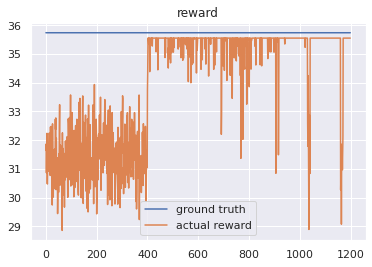

In [21]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

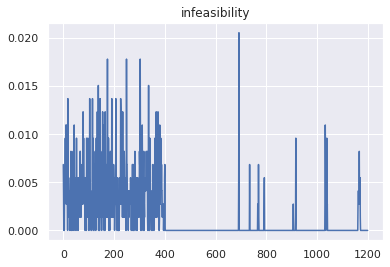

In [22]:
plt.plot(model.feasi)
plt.title('infeasibility')